In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 9, Finished, Available, Finished)

In [5]:
jan = pd.read_parquet("Users/akumar63/2021 data/fhvhv_tripdata_2021-01.parquet")
print(jan.head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 10, Finished, Available, Finished)

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B02682               B02682   
1            HV0003               B02682               B02682   
2            HV0003               B02764               B02764   
3            HV0003               B02764               B02764   
4            HV0003               B02764               B02764   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-01-01 00:28:09 2021-01-01 00:31:42 2021-01-01 00:33:44   
1 2021-01-01 00:45:56 2021-01-01 00:55:19 2021-01-01 00:55:19   
2 2021-01-01 00:21:15 2021-01-01 00:22:41 2021-01-01 00:23:56   
3 2021-01-01 00:39:12 2021-01-01 00:42:37 2021-01-01 00:42:51   
4 2021-01-01 00:46:11 2021-01-01 00:47:17 2021-01-01 00:48:14   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-01-01 00:49:07           230           166        5.26  ...       1.98   
1 2021-01-01 01:18:21           152           167       

In [6]:
jan.shape

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 11, Finished, Available, Finished)

(11908468, 24)

In [7]:
# Check for null values in the data
null_counts = jan.isnull().sum()
print("Null values in each column:")
print(null_counts)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 12, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num              0
dispatching_base_num           0
originating_base_num     3206079
request_datetime               4
on_scene_datetime        3200015
pickup_datetime                0
dropoff_datetime               0
PULocationID                   0
DOLocationID                   0
trip_miles                     0
trip_time                      0
base_passenger_fare            0
tolls                          0
bcf                            0
sales_tax                      0
congestion_surcharge           0
airport_fee             11902548
tips                           0
driver_pay                     0
shared_request_flag            0
shared_match_flag              0
access_a_ride_flag             0
wav_request_flag               0
wav_match_flag                 0
dtype: int64


In [8]:
unique_license_nums = jan['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 13, Finished, Available, Finished)

Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005' 'HV0004']


In [9]:
hv0004_count = jan[jan['hvfhs_license_num'] == 'HV0004'].shape[0]
print("Number of entries with 'HV0004' in 'hvfhs_license_num':", hv0004_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 14, Finished, Available, Finished)

Number of entries with 'HV0004' in 'hvfhs_license_num': 110015


In [10]:
hv0003_count = jan[jan['hvfhs_license_num'] == 'HV0003'].shape[0]
print("Number of entries with 'HV0003' in 'hvfhs_license_num':", hv0003_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 15, Finished, Available, Finished)

Number of entries with 'HV0003' in 'hvfhs_license_num': 8704128


In [11]:
hv0005_count = jan[jan['hvfhs_license_num'] == 'HV0005'].shape[0]
print("Number of entries with 'HV0005' in 'hvfhs_license_num':", hv0005_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 16, Finished, Available, Finished)

Number of entries with 'HV0005' in 'hvfhs_license_num': 3094325


In [12]:
jan_filtered = jan[~jan['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 17, Finished, Available, Finished)

In [13]:
jan_filtered = jan_filtered.drop(columns=['airport_fee'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 18, Finished, Available, Finished)

In [14]:
null_counts = jan_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 19, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num          0
dispatching_base_num       0
originating_base_num    6064
request_datetime           0
on_scene_datetime          0
pickup_datetime            0
dropoff_datetime           0
PULocationID               0
DOLocationID               0
trip_miles                 0
trip_time                  0
base_passenger_fare        0
tolls                      0
bcf                        0
sales_tax                  0
congestion_surcharge       0
tips                       0
driver_pay                 0
shared_request_flag        0
shared_match_flag          0
access_a_ride_flag         0
wav_request_flag           0
wav_match_flag             0
dtype: int64


In [15]:
jan_filtered.shape
jan_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 20, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704128 entries, 0 to 11908467
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  tips                  float64       
 17  driver_pay            float64       
 18  shared_request_flag   object        
 19 

In [16]:
jan_filtered = jan_filtered.drop(columns=['hvfhs_license_num'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 21, Finished, Available, Finished)

In [17]:
jan_filtered['date'] = jan_filtered['request_datetime'].dt.date
jan_filtered['date'].tail(15)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 22, Finished, Available, Finished)

11908449    2021-01-31
11908452    2021-01-31
11908453    2021-01-31
11908456    2021-01-31
11908457    2021-01-31
11908458    2021-01-31
11908459    2021-01-31
11908460    2021-01-31
11908461    2021-01-31
11908462    2021-01-31
11908463    2021-01-31
11908464    2021-01-31
11908465    2021-01-31
11908466    2021-01-31
11908467    2021-01-31
Name: date, dtype: object

In [18]:
import pandas as pd

# Step 1: Extract the date part from 'request_datetime' in mm-dd-yyyy format
jan_filtered['date'] = pd.to_datetime(jan_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Step 2: Remove the date part from the original datetime columns, leaving only the time
jan_filtered['request_datetime'] = pd.to_datetime(jan_filtered['request_datetime']).dt.time
jan_filtered['on_scene_datetime'] = pd.to_datetime(jan_filtered['on_scene_datetime']).dt.time
jan_filtered['pickup_datetime'] = pd.to_datetime(jan_filtered['pickup_datetime']).dt.time
jan_filtered['dropoff_datetime'] = pd.to_datetime(jan_filtered['dropoff_datetime']).dt.time

# Step 3: Extract month and day from the 'date' column
jan_filtered['month'] = pd.to_datetime(jan_filtered['date']).dt.month
jan_filtered['day'] = pd.to_datetime(jan_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(jan_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(jan_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 23, Finished, Available, Finished)

Current format of 'date' column:
0    01-01-2021
1    01-01-2021
2    01-01-2021
3    01-01-2021
4    01-01-2021
Name: date, dtype: object

Updated DataFrame:
         date  month  day request_datetime on_scene_datetime pickup_datetime  \
0  01-01-2021      1    1         00:28:09          00:31:42        00:33:44   
1  01-01-2021      1    1         00:45:56          00:55:19        00:55:19   
2  01-01-2021      1    1         00:21:15          00:22:41        00:23:56   
3  01-01-2021      1    1         00:39:12          00:42:37        00:42:51   
4  01-01-2021      1    1         00:46:11          00:47:17        00:48:14   

  dropoff_datetime  
0         00:49:07  
1         01:18:21  
2         00:38:05  
3         00:45:50  
4         01:08:42  


In [19]:

# Get unique values in the 'month' column and count them
unique_months = jan_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", jan_filtered['month'].unique())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 24, Finished, Available, Finished)


Number of unique months: 3
Unique month values: [ 1 12  2]


In [20]:
# Filter rows where the month is either 12 or 2
months_12_2 = jan_filtered[jan_filtered['month'].isin([12, 2])]

# Display the rows where the month is 12 or 2
print("Rows where the month is either December (12) or February (2):")
print(months_12_2)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 25, Finished, Available, Finished)

Rows where the month is either December (12) or February (2):
         dispatching_base_num originating_base_num request_datetime  \
89                     B02512               B02512         23:58:40   
211                    B02617               B02617         23:57:24   
321                    B02878               B02878         23:57:04   
514                    B02872               B02872         23:57:30   
576                    B02765               B02765         23:58:07   
...                       ...                  ...              ...   
30138                  B02512               B02512         23:57:54   
30259                  B02835               B02835         23:59:42   
30324                  B02764               B02764         23:59:07   
11898851               B02866               B02866         00:00:00   
11899965               B02869               B02869         00:00:00   

         on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
89      

In [21]:
# Drop multiple columns
jan_filtered = jan_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips','tolls'])



StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 26, Finished, Available, Finished)

In [22]:
jan_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 27, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704128 entries, 0 to 11908467
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             int64  
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
dtypes: float64(6), int64(5), object(7)
memory usage: 1.2+ GB


In [23]:
duplicate_count = jan_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
jan_filtered = jan_filtered.drop_duplicates()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 28, Finished, Available, Finished)

Number of duplicate rows: 54


In [24]:
jan_filtered['dispatching_base_num'].nunique()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 29, Finished, Available, Finished)

28

In [25]:
# Define the columns to check for duplicates
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = jan_filtered[jan_filtered.duplicated(subset=duplicate_columns, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 30, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 0
Duplicate rows based on specified columns:
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, bcf, sales_tax, congestion_surcharge, driver_pay, date, month, day]
Index: []


In [26]:
jan_filtered = jan_filtered.drop_duplicates(subset=duplicate_columns)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(jan_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 31, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(8704101, 18)


In [27]:
# Define the columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = jan_filtered[jan_filtered.duplicated(subset=duplicate_column, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 32, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 88
Duplicate rows based on specified columns:
        dispatching_base_num originating_base_num request_datetime  \
747476                B02884               B02884         00:28:19   
747477                B02884               B02884         00:44:54   
747478                B02879               B02879         00:28:19   
747479                B02879               B02879         00:44:54   
758781                B02884               B02884         01:48:57   
...                      ...                  ...              ...   
4340281               B02864               B02864         06:18:41   
5234120               B02869               B02869         13:12:45   
8849233               B02887               B02887         15:04:53   
8855423               B02875               B02875         15:03:56   
9924044               B02867               B02867         13:13:09   

        on_scene_datetime pickup_datetime dropoff_datetime  

In [28]:
jan_filtered = jan_filtered.drop_duplicates(subset=duplicate_column)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(jan_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 33, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(8704057, 18)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 34, Finished, Available, Finished)

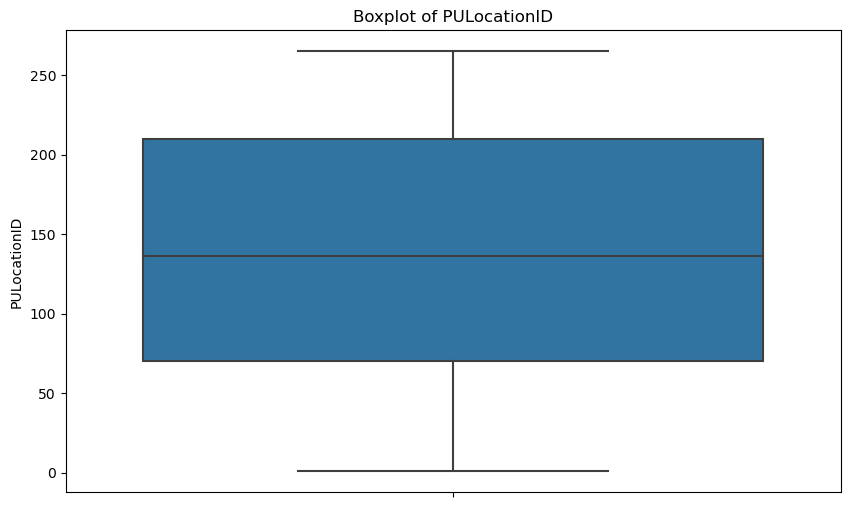

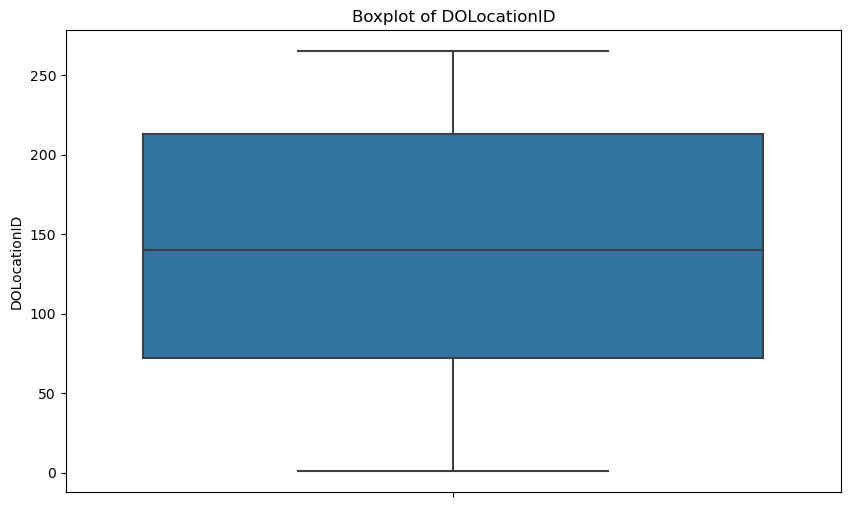

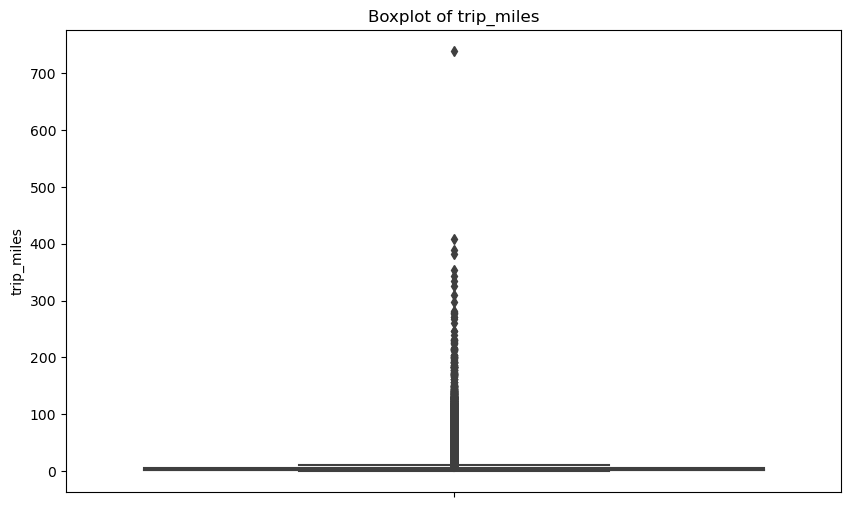

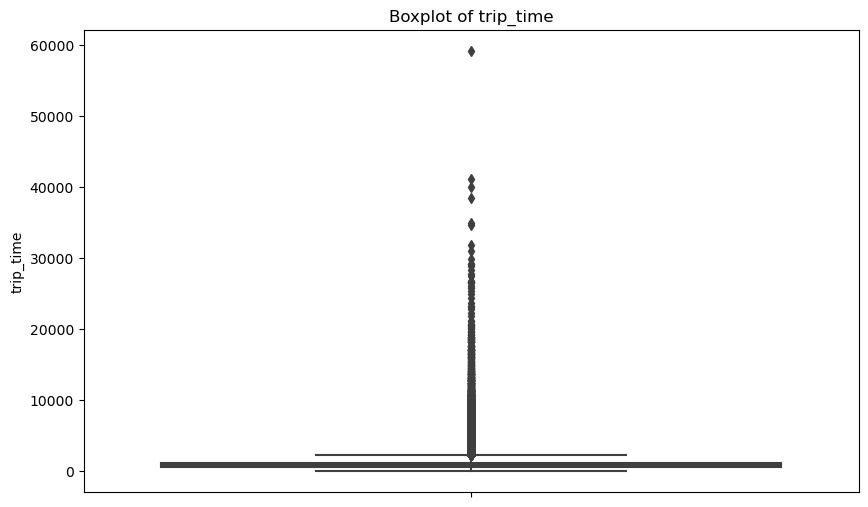

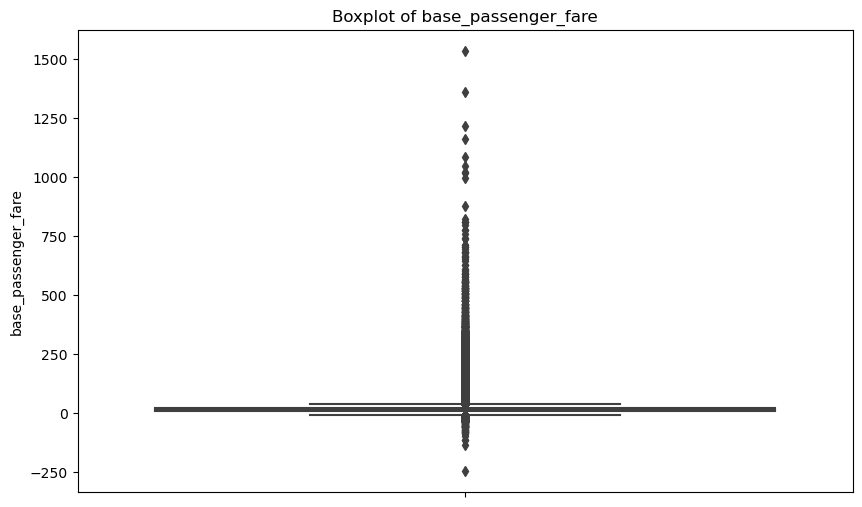

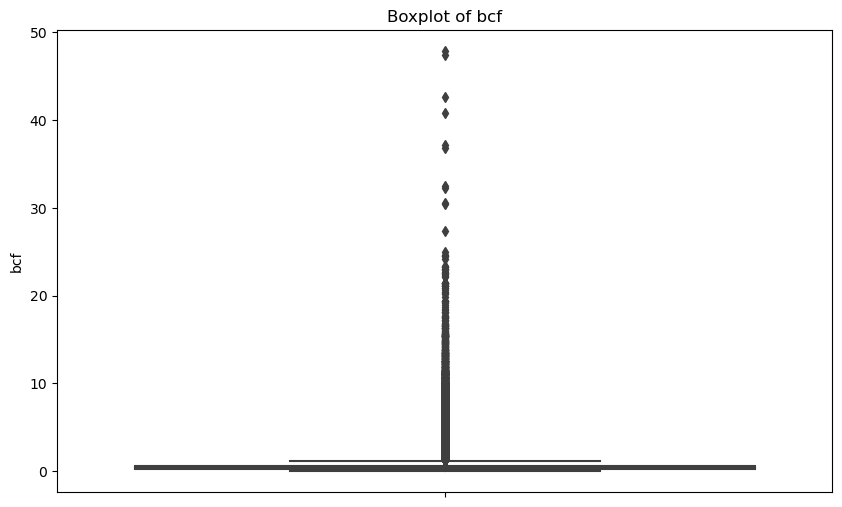

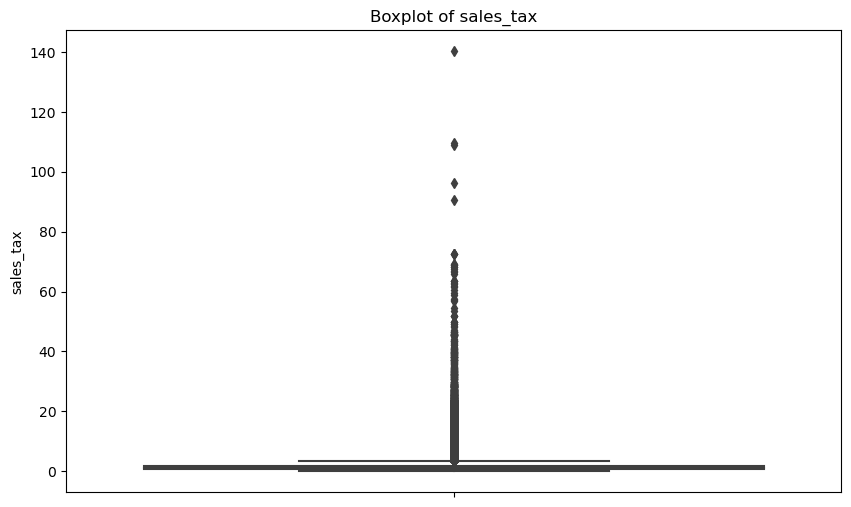

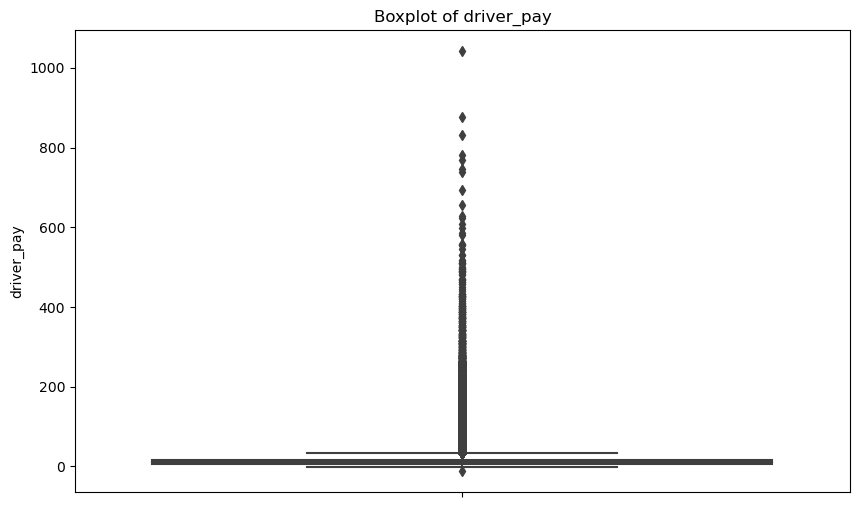

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in your dataset
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

# Plot each column in a separate figure for better visibility
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set a large size for each individual box plot
    sns.boxplot(y=jan_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()



StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 35, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


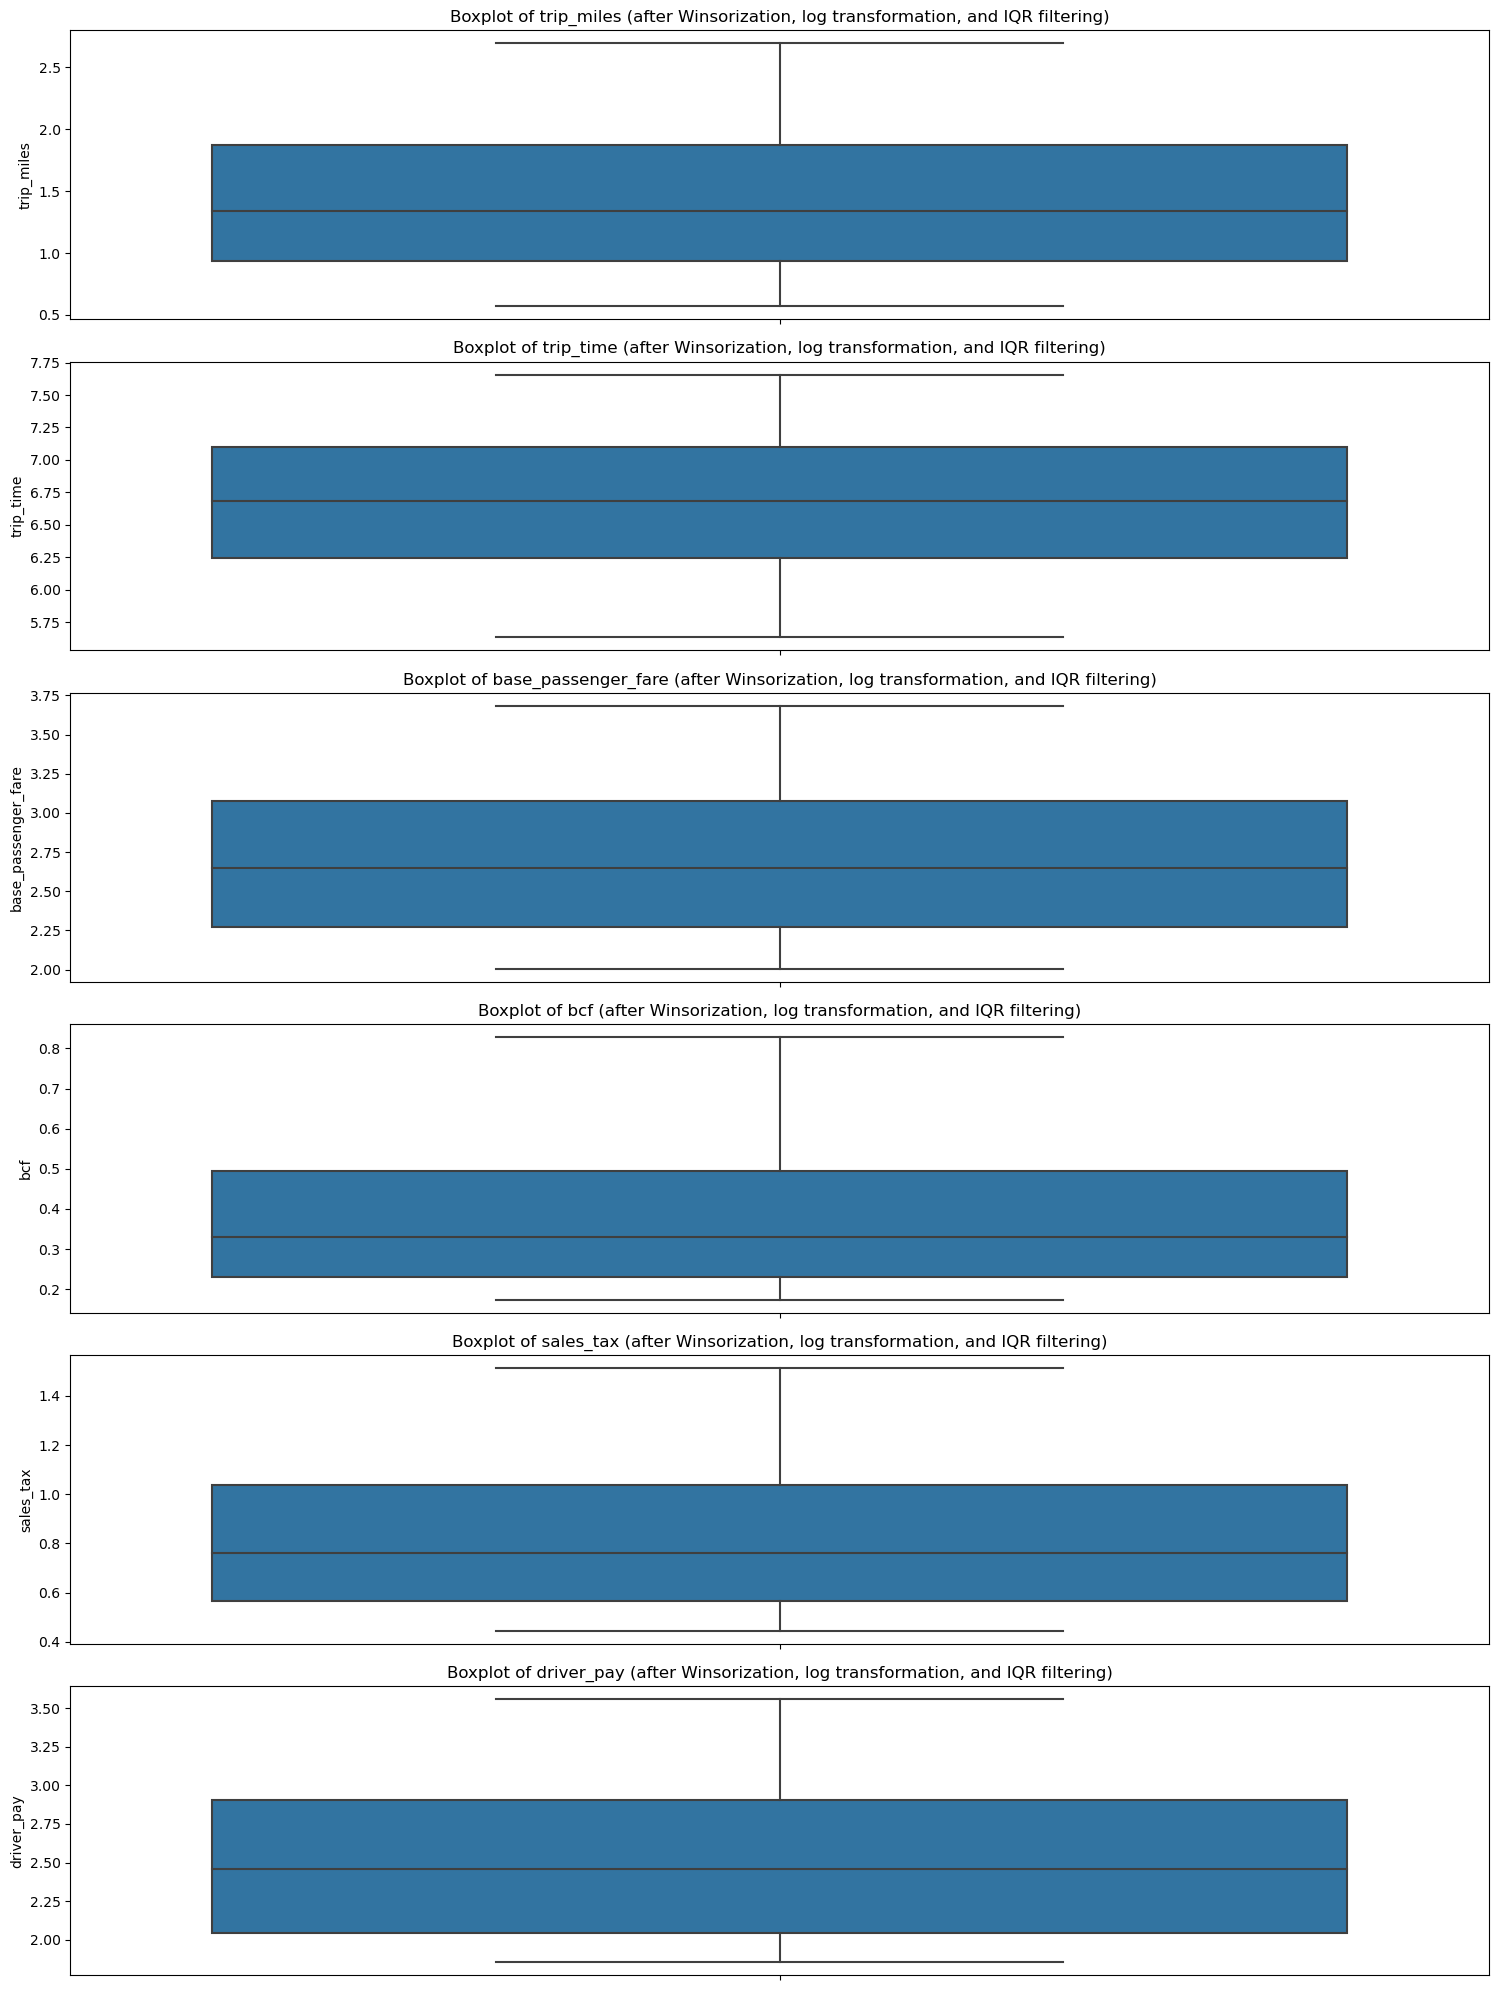

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to process
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']

# Step 1: Apply Winsorization to cap extreme values at 5th and 95th percentiles
# Using a transformed copy to avoid overwriting the original data
jan_new = jan_filtered.copy()
for column in columns_to_process:
    jan_new[column] = winsorize(jan_new[column], limits=[0.05, 0.05])  # Cap at 5th and 95th percentiles

# Step 2: Apply log transformation to compress the range and reduce skewness
for column in columns_to_process:
    jan_new[column] = np.log1p(jan_new[column])  # log1p(x) handles zero values

# Step 3: Remove outliers using the IQR method after log transformation
for column in columns_to_process:
    Q1 = jan_new[column].quantile(0.25)
    Q3 = jan_new[column].quantile(0.75)
    IQR = Q3 - Q1
    jan_new = jan_new[(jan_new[column] >= (Q1 - 1.5 * IQR)) & (jan_new[column] <= (Q3 + 1.5 * IQR))]

# Step 4: Plot boxplots for each column after Winsorization, log transformation, and IQR filtering
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=jan_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()


In [31]:
# Define the emission factor (e.g., 404 grams of CO₂ per mile for a typical gasoline vehicle)
emission_factor = 404  # grams of CO₂ per mile

# Create 'estimated_emissions' column
jan_new['estimated_emissions'] = jan_new['trip_miles'] * emission_factor

# Define a threshold for categorizing emissions as "High" or "Low"
emission_threshold = 3000  # grams of CO₂

# Create 'emission_levels' column based on the threshold
jan_new['emission_levels'] = jan_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(jan_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 36, Finished, Available, Finished)

   trip_miles  estimated_emissions  emission_levels
0    1.834180           741.008795                0
1    1.536867           620.894357                0
2    1.506297           608.544050                0
3    0.570980           230.675737                0
4    2.322388           938.244639                0


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 37, Finished, Available, Finished)

/tmp/ipykernel_1039/1923180202.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = jan_new.corr()


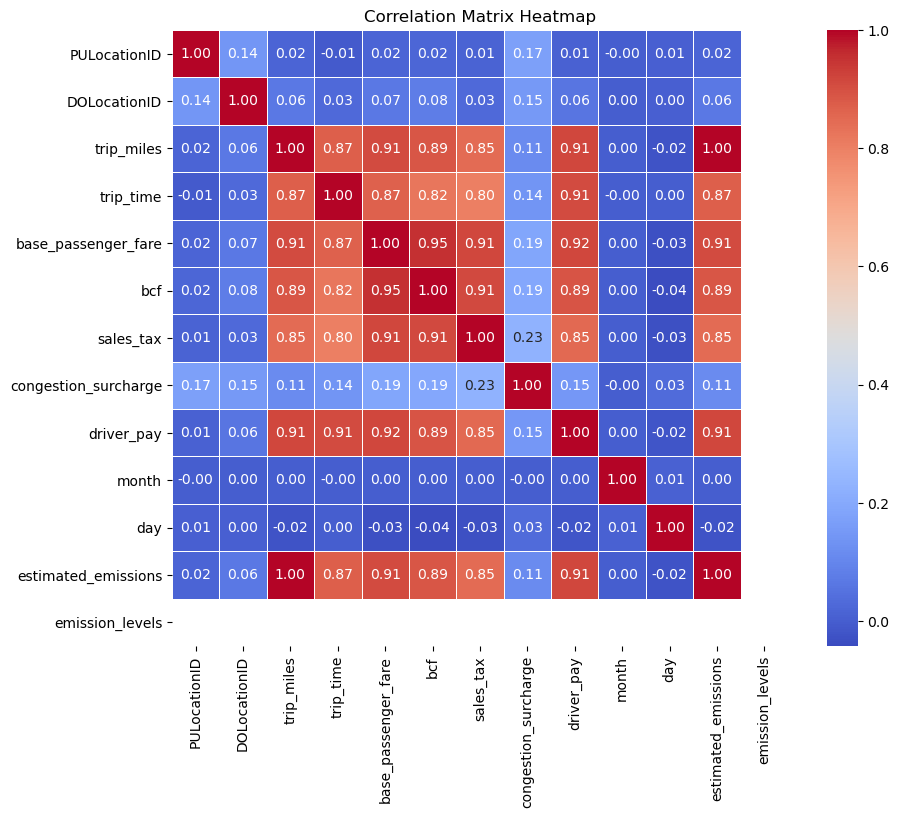

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = jan_new.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [33]:
jan_new.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 38, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8704057 entries, 0 to 11908467
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             float64
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
 18  estimated_emissions   float64
 19  emission_levels       int64  
dtypes: float64(8), int64(5), object(7)
memory usage: 1.4+ GB


In [34]:
jan_new['dispatching_base_num'].head()
base_counts = jan_new['dispatching_base_num'].value_counts()
print(base_counts)
top_10_bases = jan_new['dispatching_base_num'].value_counts().head(10).index
jan_new = jan_new[jan_new['dispatching_base_num'].isin(top_10_bases)]
jan_new.shape
jan_new.head()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 39, Finished, Available, Finished)

B02764    1009388
B02872     924960
B02875     735434
B02765     591242
B02869     452098
B02887     333756
B02871     330085
B02682     321599
B02864     316394
B02878     312013
B02866     309274
B02617     281432
B02883     268391
B02884     257674
B02882     241988
B02876     230732
B02867     217448
B02879     216955
B02877     208986
B02835     200129
B02888     177542
B02889     149398
B02836     140365
B02395     124107
B02880     119173
B02870     106972
B02865      82291
B02512      44231
Name: dispatching_base_num, dtype: int64


dispatching_base_num originating_base_num request_datetime  \
0               B02682               B02682         00:28:09   
1               B02682               B02682         00:45:56   
2               B02764               B02764         00:21:15   
3               B02764               B02764         00:39:12   
4               B02764               B02764         00:46:11   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:31:42        00:33:44         00:49:07           230   
1          00:55:19        00:55:19         01:18:21           152   
2          00:22:41        00:23:56         00:38:05           233   
3          00:42:37        00:42:51         00:45:50           142   
4          00:47:17        00:48:14         01:08:42           143   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           166    1.834180   6.828712             3.147595  0.512824   
1           167    1.536867   7.232010             2.963209  0.438255   
2           142    1.506297   6.745236             2.711378  0.392042   
3           143    0.570980   5.634790             2.187174  0.215111   
4            78    2.322388   7.113956             3.336125  0.593327   

   sales_tax  congestion_surcharge  driver_pay        date  month  day  \
0   1.091923                  2.75    2.771964  01-01-2021      1    1   
1   0.966984                  0.00    2.893700  01-01-2021      1    1   
2   0.810930                  2.75    2.637628  01-01-2021      1    1   
3   0.530628                  2.75    2.129421  01-01-2021      1    1   
4   1.226712                  2.75    3.154444  01-01-2021      1    1   

   estimated_emissions  emission_levels  
0           741.008795                0  
1           620.894357                0  
2           608.544050                0  
3           230.675737                0  
4           938.244639                0

In [35]:
# Save jan_new to a new DataFrame called jan_df
jan_df = jan_new.copy()

# Display the shape and first few rows of jan_df to verify
print("Shape of jan_df:", jan_df.shape)
print(jan_df.head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 138, 40, Finished, Available, Finished)

Shape of jan_df: (5326969, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B02682               B02682         00:28:09   
1               B02682               B02682         00:45:56   
2               B02764               B02764         00:21:15   
3               B02764               B02764         00:39:12   
4               B02764               B02764         00:46:11   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:31:42        00:33:44         00:49:07           230   
1          00:55:19        00:55:19         01:18:21           152   
2          00:22:41        00:23:56         00:38:05           233   
3          00:42:37        00:42:51         00:45:50           142   
4          00:47:17        00:48:14         01:08:42           143   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           166    1.834180   6.828712             3.147595  0.512824   
1           167  

In [1]:
jan_df.to_parquet("df1.parquet")

StatementMeta(, , -1, Waiting, , Waiting)

--- End of 2021-01-hvFHV.ipynb ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 6, Finished, Available, Finished)

In [2]:

feb = pd.read_parquet("Users/akumar63/2021 data/fhvhv_tripdata_2021-02.parquet")
print(feb.head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 7, Finished, Available, Finished)

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B02764               B02764   
1            HV0003               B02764               B02764   
2            HV0005               B02510                 None   
3            HV0005               B02510                 None   
4            HV0003               B02872               B02872   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-01-31 23:59:00 2021-02-01 00:10:19 2021-02-01 00:10:40   
1 2021-02-01 00:13:35 2021-02-01 00:25:23 2021-02-01 00:27:23   
2 2021-02-01 00:12:55                 NaT 2021-02-01 00:28:38   
3 2021-02-01 00:36:01                 NaT 2021-02-01 00:43:37   
4 2021-01-31 23:57:50 2021-02-01 00:08:25 2021-02-01 00:08:42   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-02-01 00:21:09            35            39       2.060  ...       1.52   
1 2021-02-01 00:44:01            39            35       

In [3]:
feb.shape


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 8, Finished, Available, Finished)

(11613942, 24)

In [4]:
# Check for null values in the data
null_counts = feb.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 9, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num              0
dispatching_base_num           0
originating_base_num     3319132
request_datetime               1
on_scene_datetime        3318817
pickup_datetime                0
dropoff_datetime               0
PULocationID                   0
DOLocationID                   0
trip_miles                     0
trip_time                      0
base_passenger_fare            0
tolls                          0
bcf                            0
sales_tax                      0
congestion_surcharge           0
airport_fee             11613181
tips                           0
driver_pay                     0
shared_request_flag            0
shared_match_flag              0
access_a_ride_flag             0
wav_request_flag               0
wav_match_flag                 0
dtype: int64


In [5]:
unique_license_nums = feb['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 10, Finished, Available, Finished)

Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005' 'HV0004']


In [6]:
hv0004_count = feb[feb['hvfhs_license_num'] == 'HV0004'].shape[0]
print("Number of entries with 'HV0004' in 'hvfhs_license_num':", hv0004_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 11, Finished, Available, Finished)

Number of entries with 'HV0004' in 'hvfhs_license_num': 86018


In [7]:
hv0003_count = feb[feb['hvfhs_license_num'] == 'HV0003'].shape[0]
print("Number of entries with 'HV0003' in 'hvfhs_license_num':", hv0003_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 12, Finished, Available, Finished)

Number of entries with 'HV0003' in 'hvfhs_license_num': 8290758


In [8]:
hv0005_count = feb[feb['hvfhs_license_num'] == 'HV0005'].shape[0]
print("Number of entries with 'HV0005' in 'hvfhs_license_num':", hv0005_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 13, Finished, Available, Finished)

Number of entries with 'HV0005' in 'hvfhs_license_num': 3237166


In [9]:
feb_filtered = feb[~feb['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 14, Finished, Available, Finished)

In [10]:
feb_filtered = feb_filtered.drop(columns=['airport_fee'])


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 15, Finished, Available, Finished)

In [11]:
null_counts = feb_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 16, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num         0
dispatching_base_num      0
originating_base_num    315
request_datetime          0
on_scene_datetime         0
pickup_datetime           0
dropoff_datetime          0
PULocationID              0
DOLocationID              0
trip_miles                0
trip_time                 0
base_passenger_fare       0
tolls                     0
bcf                       0
sales_tax                 0
congestion_surcharge      0
tips                      0
driver_pay                0
shared_request_flag       0
shared_match_flag         0
access_a_ride_flag        0
wav_request_flag          0
wav_match_flag            0
dtype: int64


In [12]:
feb_filtered.shape
feb_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 17, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8290758 entries, 0 to 11613941
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  tips                  float64       
 17  driver_pay            float64       
 18  shared_request_flag   object        
 19 

In [13]:
feb_filtered = feb_filtered.drop(columns=['hvfhs_license_num'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 18, Finished, Available, Finished)

In [14]:
feb_filtered['date'] = feb_filtered['request_datetime'].dt.date
feb_filtered['date'].tail(15)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 19, Finished, Available, Finished)

11613927    2021-02-28
11613928    2021-02-28
11613929    2021-02-28
11613930    2021-02-28
11613931    2021-02-28
11613932    2021-02-28
11613933    2021-02-28
11613934    2021-02-28
11613935    2021-02-28
11613936    2021-02-28
11613937    2021-02-28
11613938    2021-02-28
11613939    2021-02-28
11613940    2021-02-28
11613941    2021-02-28
Name: date, dtype: object

In [15]:
import pandas as pd

# Step 1: Extract the date part from 'request_datetime' in mm-dd-yyyy format
feb_filtered['date'] = pd.to_datetime(feb_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Step 2: Remove the date part from the original datetime columns, leaving only the time
feb_filtered['request_datetime'] = pd.to_datetime(feb_filtered['request_datetime']).dt.time
feb_filtered['on_scene_datetime'] = pd.to_datetime(feb_filtered['on_scene_datetime']).dt.time
feb_filtered['pickup_datetime'] = pd.to_datetime(feb_filtered['pickup_datetime']).dt.time
feb_filtered['dropoff_datetime'] = pd.to_datetime(feb_filtered['dropoff_datetime']).dt.time

# Step 3: Extract month and day from the 'date' column
feb_filtered['month'] = pd.to_datetime(feb_filtered['date']).dt.month
feb_filtered['day'] = pd.to_datetime(feb_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(feb_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(feb_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 20, Finished, Available, Finished)

Current format of 'date' column:
0    01-31-2021
1    02-01-2021
4    01-31-2021
5    02-01-2021
6    02-01-2021
Name: date, dtype: object

Updated DataFrame:
         date  month  day request_datetime on_scene_datetime pickup_datetime  \
0  01-31-2021      1   31         23:59:00          00:10:19        00:10:40   
1  02-01-2021      2    1         00:13:35          00:25:23        00:27:23   
4  01-31-2021      1   31         23:57:50          00:08:25        00:08:42   
5  02-01-2021      2    1         00:11:48          00:24:25        00:26:02   
6  02-01-2021      2    1         00:39:45          00:44:57        00:45:50   

  dropoff_datetime  
0         00:21:09  
1         00:44:01  
4         00:17:57  
5         00:42:51  
6         01:02:50  


In [16]:
# Get unique values in the 'month' column and count them
unique_months = feb_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", feb_filtered['month'].unique())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 21, Finished, Available, Finished)


Number of unique months: 3
Unique month values: [1 2 3]


In [17]:
# Filter rows where the month is either 12 or 2
months_12_2 = feb_filtered[feb_filtered['month'].isin([12, 2])]

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 22, Finished, Available, Finished)

In [18]:
# Display the rows where the month is 12 or 2
print("Rows where the month is either December (12) or February (2):")
print(months_12_2)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 23, Finished, Available, Finished)

Rows where the month is either December (12) or February (2):
         dispatching_base_num originating_base_num request_datetime  \
1                      B02764               B02764         00:13:35   
5                      B02872               B02872         00:11:48   
6                      B02872               B02872         00:39:45   
8                      B02764               B02764         00:27:54   
14                     B02764               B02764         00:19:07   
...                       ...                  ...              ...   
11613937               B02682               B02682         23:49:17   
11613938               B02764               B02764         22:54:16   
11613939               B02764               B02764         23:33:40   
11613940               B02764               B02764         23:05:01   
11613941               B02764               B02764         23:09:34   

         on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
1       

In [19]:
# Drop multiple columns
feb_filtered = feb_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips','tolls'])


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 24, Finished, Available, Finished)

In [20]:
feb_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 25, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8290758 entries, 0 to 11613941
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             int64  
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
dtypes: float64(6), int64(5), object(7)
memory usage: 1.2+ GB


In [21]:
duplicate_count = feb_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
feb_filtered = feb_filtered.drop_duplicates()


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 26, Finished, Available, Finished)

Number of duplicate rows: 0


In [22]:
feb_filtered['dispatching_base_num'].nunique()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 27, Finished, Available, Finished)

28

In [23]:
# Define the columns to check for duplicates
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = feb_filtered[feb_filtered.duplicated(subset=duplicate_columns, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 28, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 0
Duplicate rows based on specified columns:
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, bcf, sales_tax, congestion_surcharge, driver_pay, date, month, day]
Index: []


In [24]:
feb_filtered = feb_filtered.drop_duplicates(subset=duplicate_columns)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(feb_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 29, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(8290758, 18)


In [25]:
# Define the columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = feb_filtered[feb_filtered.duplicated(subset=duplicate_column, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 30, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 6
Duplicate rows based on specified columns:
        dispatching_base_num originating_base_num request_datetime  \
3607090               B02872               B02872         14:37:40   
7029409               B02765               B02765         14:37:10   
7572776               B02882               B02882         20:37:30   
7582773               B02875               B02875         20:41:52   
7904794               B02888               B02888         15:17:20   
8789581               B02764               B02764         15:17:56   

        on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
3607090          14:39:36        14:41:37         14:48:51           129   
7029409          14:40:42        14:41:37         14:48:51           129   
7572776          20:44:03        20:45:39         20:52:02           247   
7582773          20:45:08        20:45:39         20:52:02           247   
7904794          15:20:51      

In [26]:
feb_filtered = feb_filtered.drop_duplicates(subset=duplicate_column)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(feb_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 31, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(8290755, 18)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 32, Finished, Available, Finished)

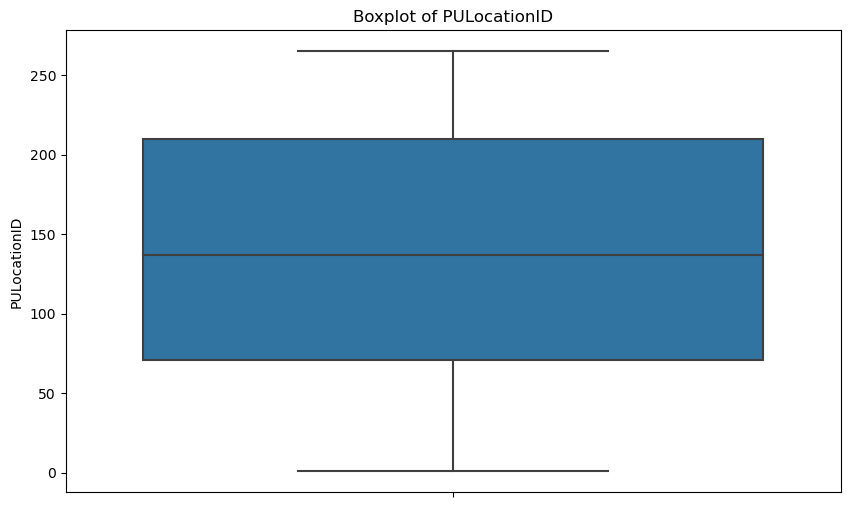

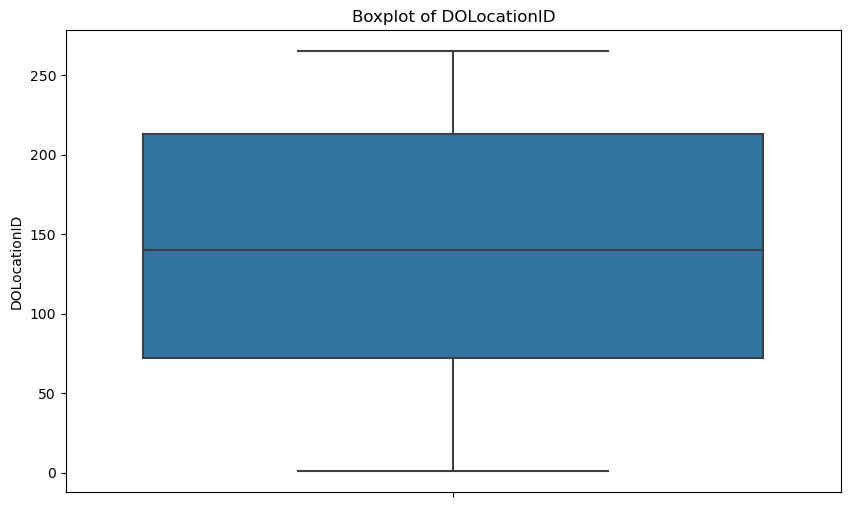

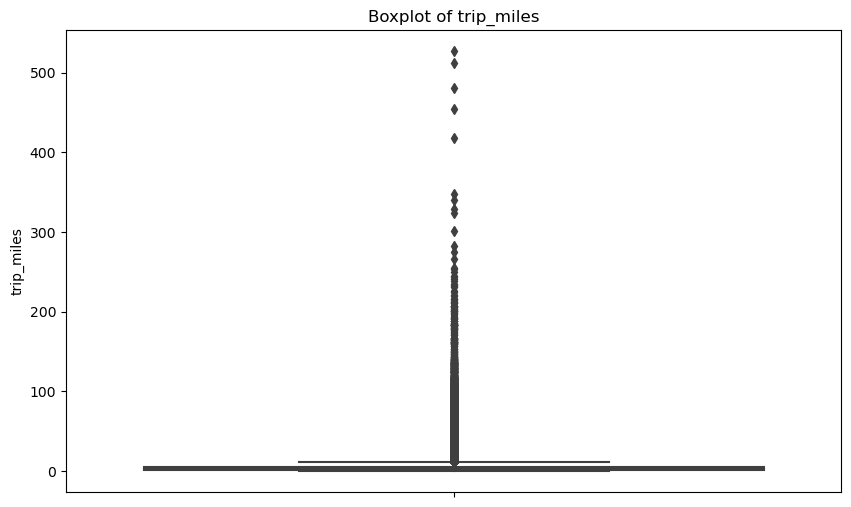

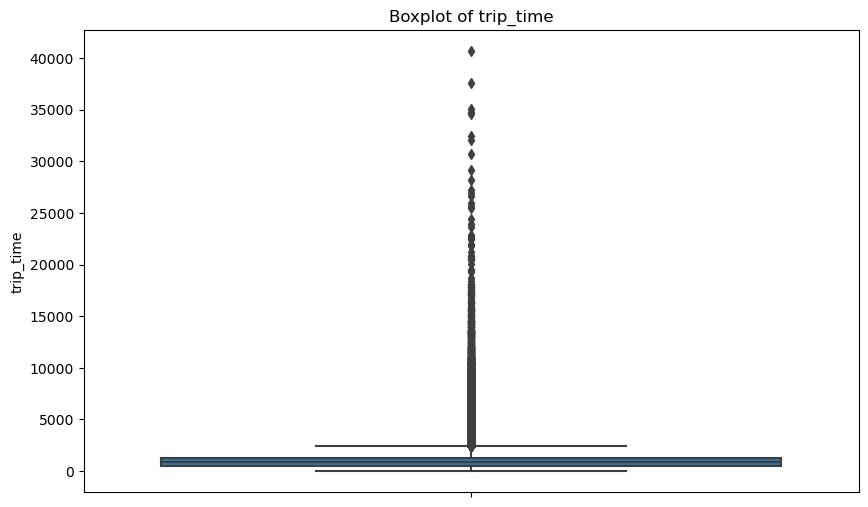

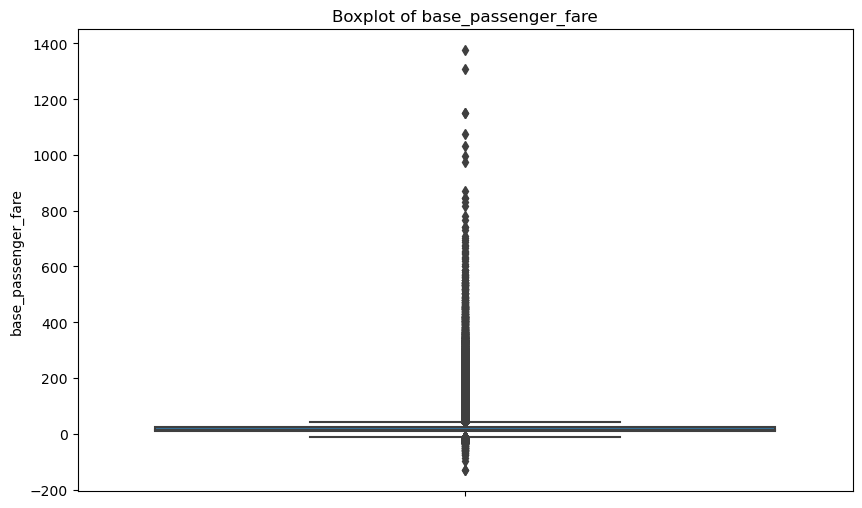

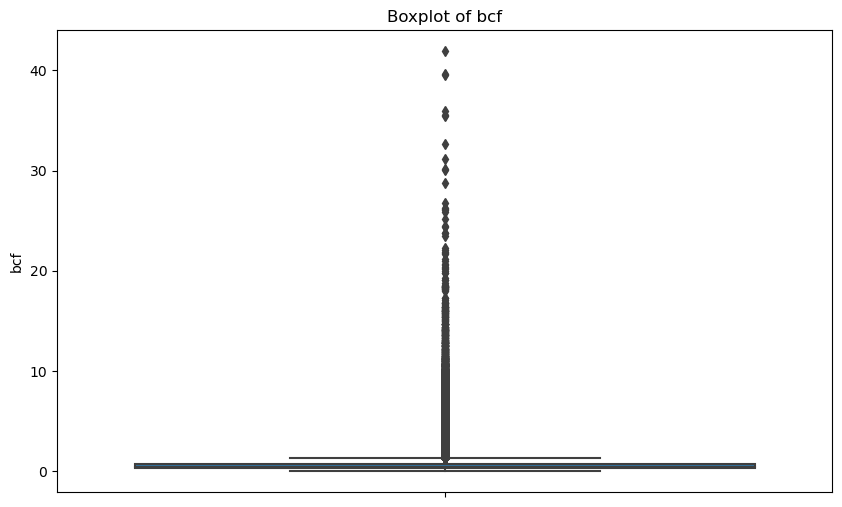

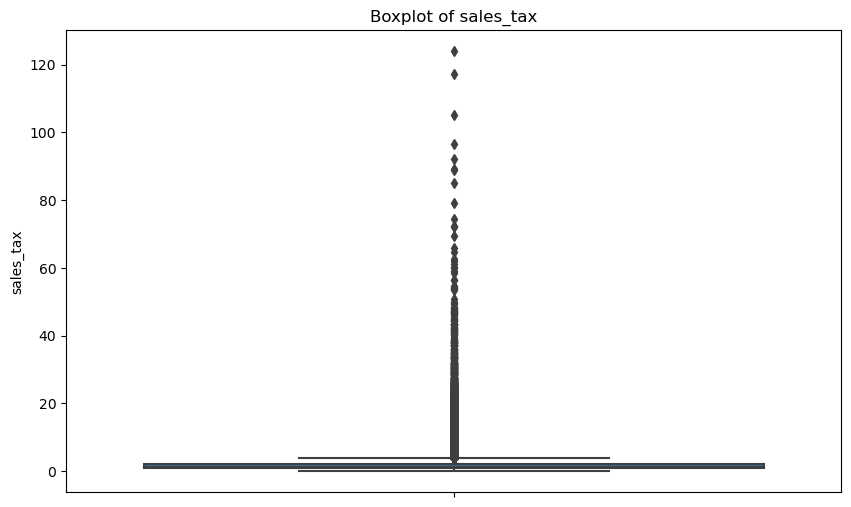

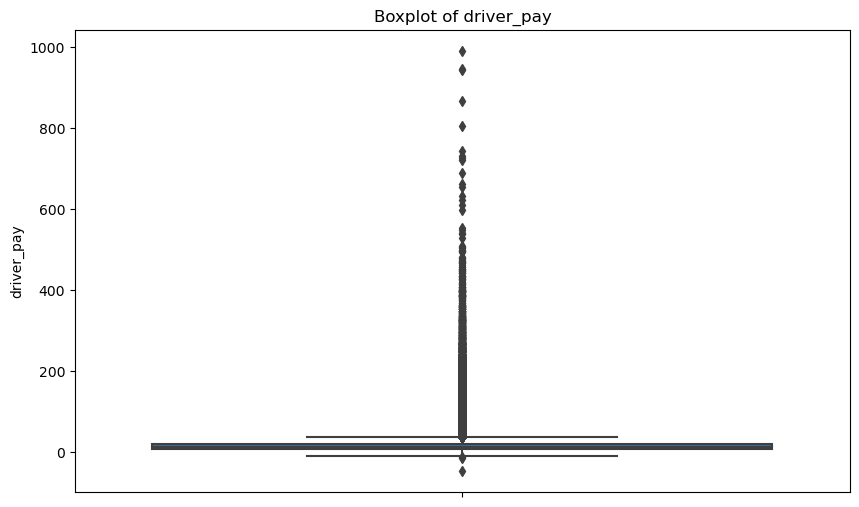

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in your dataset
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

# Plot each column in a separate figure for better visibility
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set a large size for each individual box plot
    sns.boxplot(y=feb_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 33, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


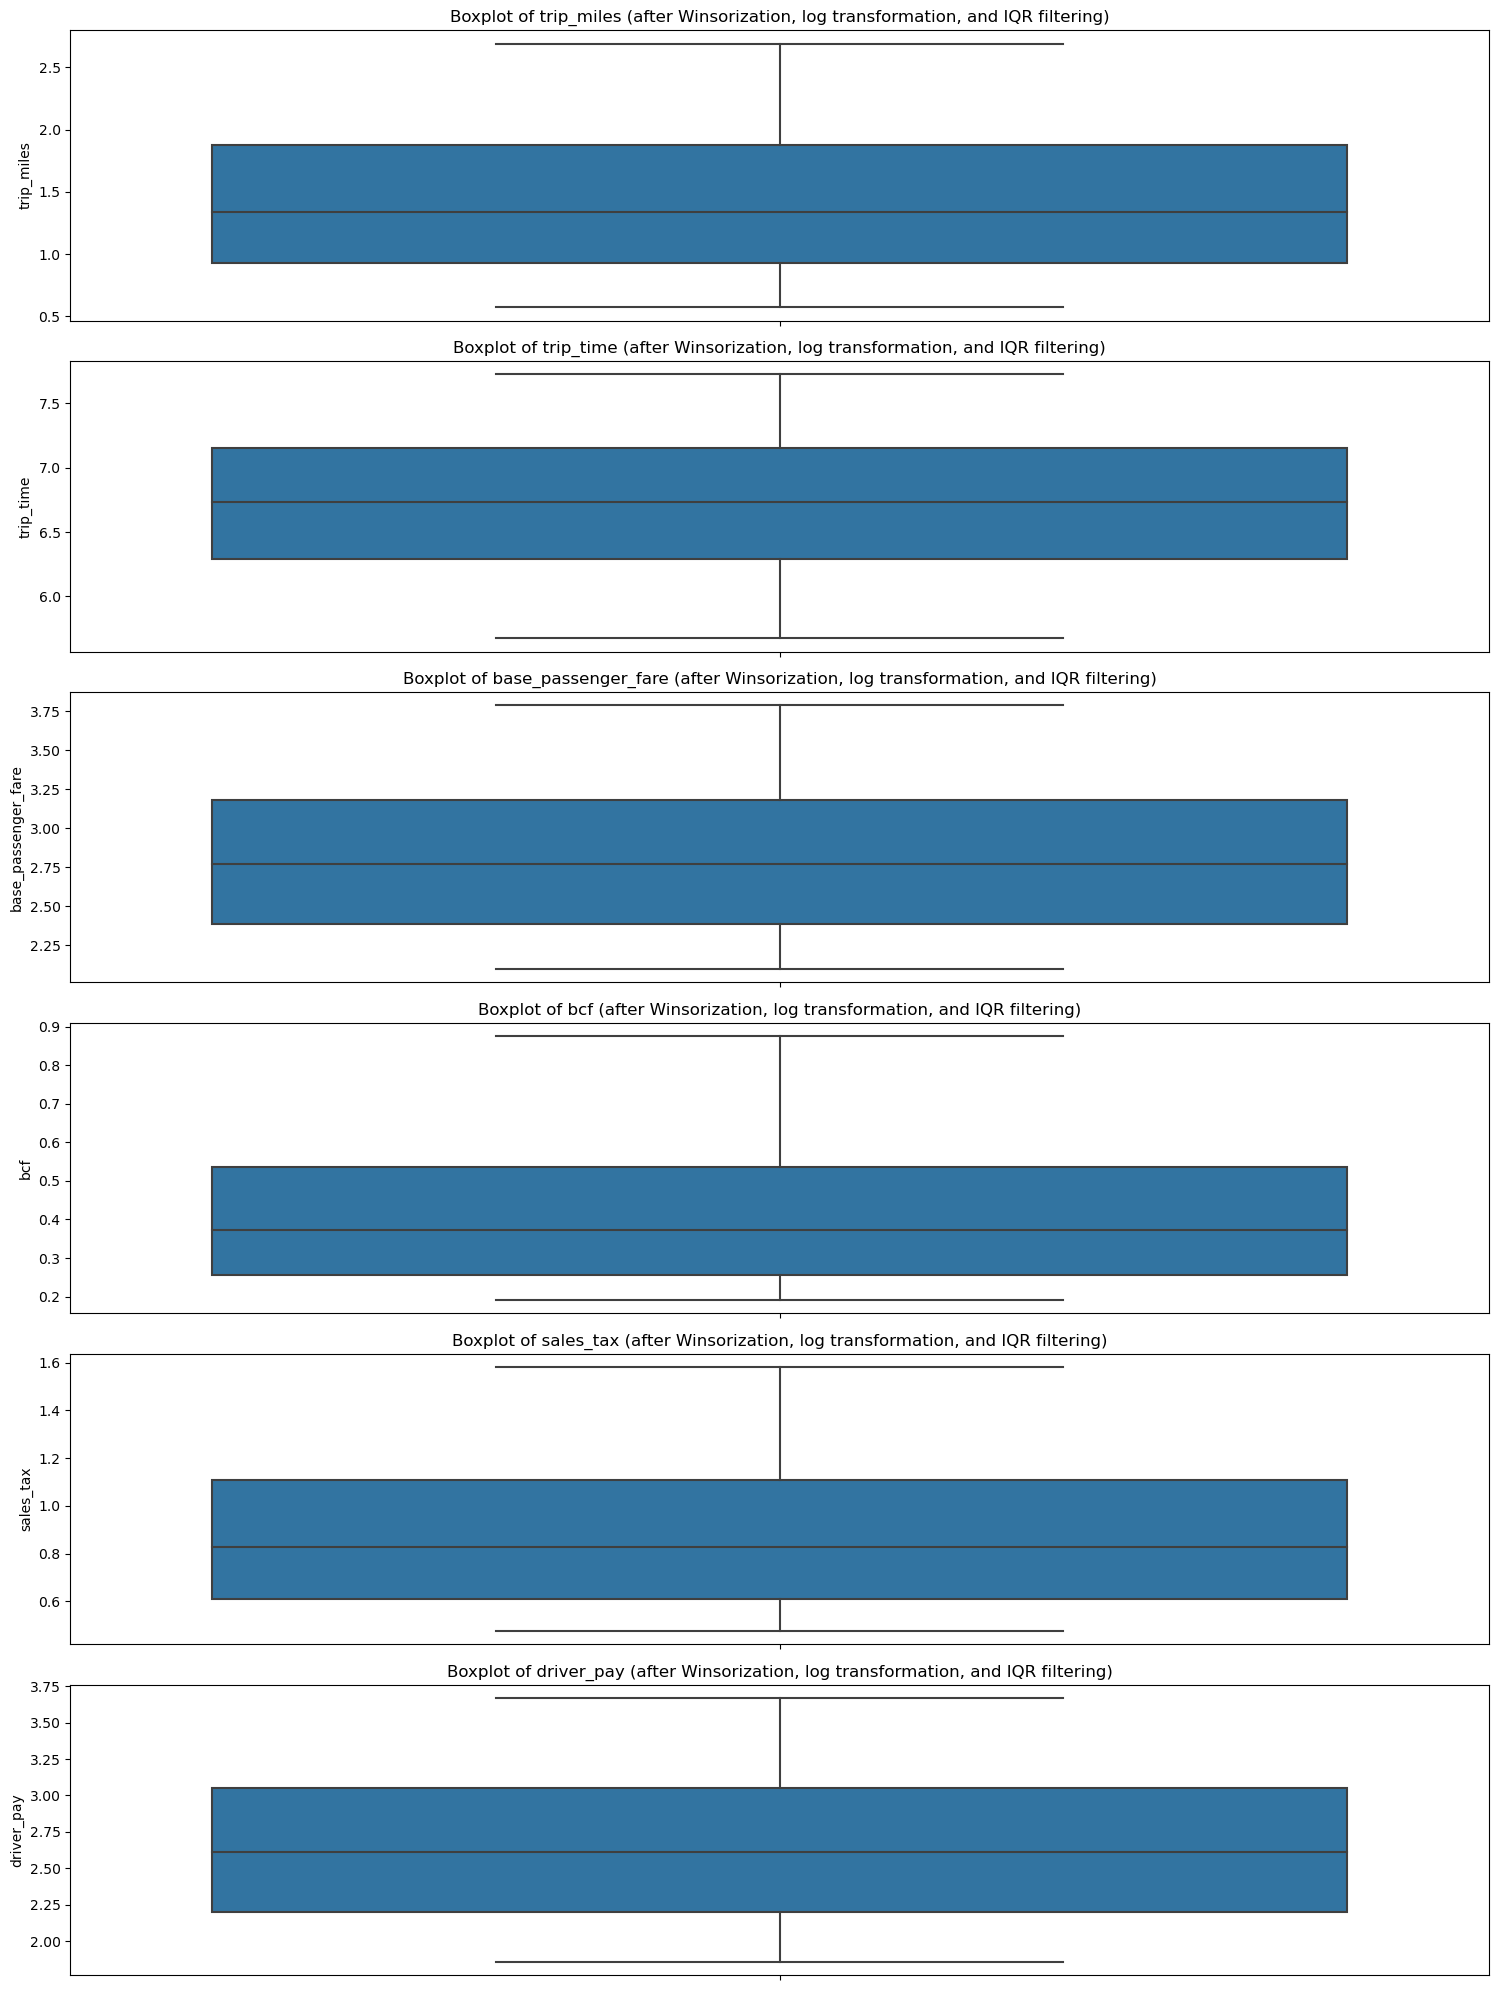

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to process
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']

# Step 1: Apply Winsorization to cap extreme values at 5th and 95th percentiles
# Using a transformed copy to avoid overwriting the original data
feb_new = feb_filtered.copy()
for column in columns_to_process:
    feb_new[column] = winsorize(feb_new[column], limits=[0.05, 0.05])  # Cap at 5th and 95th percentiles

# Step 2: Apply log transformation to compress the range and reduce skewness
for column in columns_to_process:
    feb_new[column] = np.log1p(feb_new[column])  # log1p(x) handles zero values

# Step 3: Remove outliers using the IQR method after log transformation
for column in columns_to_process:
    Q1 = feb_new[column].quantile(0.25)
    Q3 = feb_new[column].quantile(0.75)
    IQR = Q3 - Q1
    feb_new = feb_new[(feb_new[column] >= (Q1 - 1.5 * IQR)) & (feb_new[column] <= (Q3 + 1.5 * IQR))]

# Step 4: Plot boxplots for each column after Winsorization, log transformation, and IQR filtering
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=feb_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

In [29]:
# Define the emission factor (e.g., 404 grams of CO₂ per mile for a typical gasoline vehicle)
emission_factor = 404  # grams of CO₂ per mile

# Create 'estimated_emissions' column
feb_new['estimated_emissions'] = feb_new['trip_miles'] * emission_factor

# Define a threshold for categorizing emissions as "High" or "Low"
emission_threshold = 3000  # grams of CO₂

# Create 'emission_levels' column based on the threshold
feb_new['emission_levels'] = feb_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(feb_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 34, Finished, Available, Finished)

   trip_miles  estimated_emissions  emission_levels
0    1.118415           451.839626                0
1    1.423108           574.935767                0
4    1.286474           519.735506                0
5    2.065596           834.500838                0
6    1.660131           670.692935                0


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 35, Finished, Available, Finished)

/tmp/ipykernel_7576/4125054768.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = feb_new.corr()


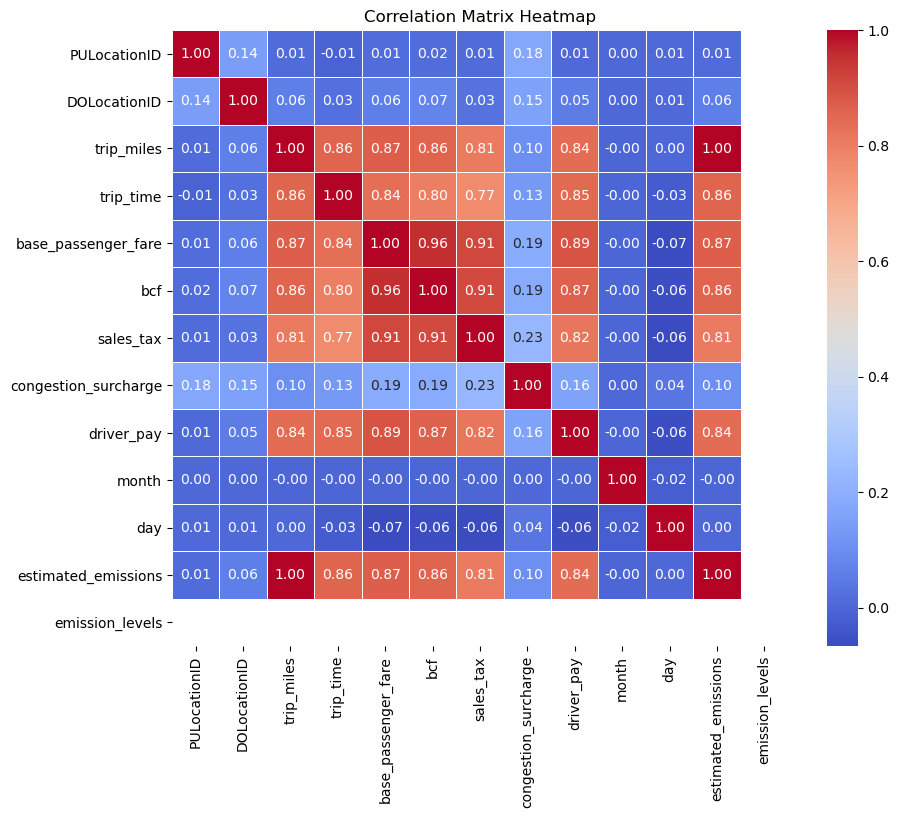

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = feb_new.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [31]:
feb_new.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 36, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8290755 entries, 0 to 11613941
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             float64
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
 18  estimated_emissions   float64
 19  emission_levels       int64  
dtypes: float64(8), int64(5), object(7)
memory usage: 1.3+ GB


In [32]:
feb_new['dispatching_base_num'].head()
base_counts = feb_new['dispatching_base_num'].value_counts()
print(base_counts)
top_10_bases = feb_new['dispatching_base_num'].value_counts().head(10).index
feb_new = feb_new[feb_new['dispatching_base_num'].isin(top_10_bases)]
feb_new.shape
feb_new.head()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 37, Finished, Available, Finished)

B02764    965567
B02872    882689
B02875    685389
B02765    559767
B02869    429720
B02887    322331
B02871    312364
B02864    311603
B02866    311089
B02878    305185
B02682    303255
B02617    274510
B02883    251617
B02884    244963
B02882    232173
B02876    215693
B02879    210137
B02867    200530
B02877    198938
B02835    189031
B02888    169167
B02889    138762
B02836    128978
B02880    115716
B02395    112433
B02870    101945
B02865     76160
B02512     41043
Name: dispatching_base_num, dtype: int64


dispatching_base_num originating_base_num request_datetime  \
0               B02764               B02764         23:59:00   
1               B02764               B02764         00:13:35   
4               B02872               B02872         23:57:50   
5               B02872               B02872         00:11:48   
6               B02872               B02872         00:39:45   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:10:19        00:10:40         00:21:09            35   
1          00:25:23        00:27:23         00:44:01            39   
4          00:08:25        00:08:42         00:17:57           126   
5          00:24:25        00:26:02         00:42:51           208   
6          00:44:57        00:45:50         01:02:50           243   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0            39    1.118415   6.445720             2.898119  0.412110   
1            35    1.423108   6.906755             3.499835  0.672944   
4           250    1.286474   6.320768             2.806990  0.385262   
5           243    2.065596   6.917706             3.043570  0.470004   
6           220    1.660131   6.928538             3.769537  0.819780   

   sales_tax  congestion_surcharge  driver_pay        date  month  day  \
0   0.924259                   0.0    2.378620  01-31-2021      1   31   
1   1.348073                   0.0    3.219276  02-01-2021      2    1   
4   0.867100                   0.0    2.254445  01-31-2021      1   31   
5   1.018847                   0.0    2.836150  02-01-2021      2    1   
6   1.560248                   0.0    3.274121  02-01-2021      2    1   

   estimated_emissions  emission_levels  
0           451.839626                0  
1           574.935767                0  
4           519.735506                0  
5           834.500838                0  
6           670.692935                0

In [33]:

# Save feb_new to a new DataFrame called feb_df
feb_df = feb_new.copy()

# Display the shape and first few rows of feb_df to verify
print("Shape of feb_df:", feb_df.shape)
print(feb_df.head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 38, Finished, Available, Finished)

Shape of feb_df: (5085704, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B02764               B02764         23:59:00   
1               B02764               B02764         00:13:35   
4               B02872               B02872         23:57:50   
5               B02872               B02872         00:11:48   
6               B02872               B02872         00:39:45   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:10:19        00:10:40         00:21:09            35   
1          00:25:23        00:27:23         00:44:01            39   
4          00:08:25        00:08:42         00:17:57           126   
5          00:24:25        00:26:02         00:42:51           208   
6          00:44:57        00:45:50         01:02:50           243   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0            39    1.118415   6.445720             2.898119  0.412110   
1            35  

In [35]:
feb_df.to_parquet("feb2021_df.parquet", engine='pyarrow')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 152, 40, Finished, Available, Finished)

--- End of 2021-02-hvFHV.ipynb ---

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 40, Finished, Available, Finished)

In [36]:
mar = pd.read_parquet("Users/akumar63/2021 data/fhvhv_tripdata_2021-03.parquet")
print(mar.head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 41, Finished, Available, Finished)

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B02764               B02764   
1            HV0003               B02764               B02764   
2            HV0003               B02764               B02764   
3            HV0003               B02835               B02835   
4            HV0003               B02835               B02835   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-02-28 23:58:06 2021-03-01 00:06:44 2021-03-01 00:07:07   
1 2021-03-01 00:12:58 2021-03-01 00:15:00 2021-03-01 00:17:00   
2 2021-03-01 00:42:49 2021-03-01 00:46:48 2021-03-01 00:51:29   
3 2021-03-01 00:02:53 2021-03-01 00:06:52 2021-03-01 00:07:16   
4 2021-03-01 00:11:02 2021-03-01 00:17:20 2021-03-01 00:19:09   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-03-01 00:13:56            56            82        1.35  ...       0.70   
1 2021-03-01 00:38:08            82           100       

In [37]:
mar.shape


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 42, Finished, Available, Finished)

(14227393, 24)

In [38]:
# Check for null values in the data
null_counts = mar.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 43, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num              0
dispatching_base_num           0
originating_base_num     4053105
request_datetime               0
on_scene_datetime        4048186
pickup_datetime                0
dropoff_datetime               0
PULocationID                   0
DOLocationID                   0
trip_miles                     0
trip_time                      0
base_passenger_fare            0
tolls                          0
bcf                            0
sales_tax                      0
congestion_surcharge           0
airport_fee             12980608
tips                           0
driver_pay                     0
shared_request_flag            0
shared_match_flag              0
access_a_ride_flag             0
wav_request_flag               0
wav_match_flag                 0
dtype: int64


In [39]:
unique_license_nums = mar['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 44, Finished, Available, Finished)

Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005' 'HV0004']


In [40]:

hv0004_count = mar[mar['hvfhs_license_num'] == 'HV0004'].shape[0]
print("Number of entries with 'HV0004' in 'hvfhs_license_num':", hv0004_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 45, Finished, Available, Finished)

Number of entries with 'HV0004' in 'hvfhs_license_num': 107314


In [41]:
hv0003_count = mar[mar['hvfhs_license_num'] == 'HV0003'].shape[0]
print("Number of entries with 'HV0003' in 'hvfhs_license_num':", hv0003_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 46, Finished, Available, Finished)

Number of entries with 'HV0003' in 'hvfhs_license_num': 10173376


In [42]:

hv0005_count = mar[mar['hvfhs_license_num'] == 'HV0005'].shape[0]
print("Number of entries with 'HV0005' in 'hvfhs_license_num':", hv0005_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 47, Finished, Available, Finished)

Number of entries with 'HV0005' in 'hvfhs_license_num': 3946703


In [43]:
mar_filtered = mar[~mar['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 48, Finished, Available, Finished)

In [44]:
mar_filtered = mar_filtered.drop(columns=['airport_fee'])


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 49, Finished, Available, Finished)

In [45]:
null_counts = mar_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 50, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num          0
dispatching_base_num       0
originating_base_num    4921
request_datetime           0
on_scene_datetime          0
pickup_datetime            0
dropoff_datetime           0
PULocationID               0
DOLocationID               0
trip_miles                 0
trip_time                  0
base_passenger_fare        0
tolls                      0
bcf                        0
sales_tax                  0
congestion_surcharge       0
tips                       0
driver_pay                 0
shared_request_flag        0
shared_match_flag          0
access_a_ride_flag         0
wav_request_flag           0
wav_match_flag             0
dtype: int64


In [46]:
mar_filtered.shape
mar_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 51, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10173376 entries, 0 to 14227392
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  tips                  float64       
 17  driver_pay            float64       
 18  shared_request_flag   object        
 19

In [47]:
mar_filtered = mar_filtered.drop(columns=['hvfhs_license_num'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 52, Finished, Available, Finished)

In [48]:
mar_filtered['date'] = mar_filtered['request_datetime'].dt.date
mar_filtered['date'].tail(15)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 53, Finished, Available, Finished)

14227377    2021-03-31
14227378    2021-03-31
14227379    2021-03-31
14227380    2021-03-31
14227382    2021-03-31
14227383    2021-03-31
14227384    2021-03-31
14227385    2021-03-31
14227386    2021-03-31
14227387    2021-03-31
14227388    2021-03-31
14227389    2021-03-31
14227390    2021-03-31
14227391    2021-03-31
14227392    2021-03-31
Name: date, dtype: object

In [49]:
import pandas as pd

# Step 1: Extract the date part from 'request_datetime' in mm-dd-yyyy format
mar_filtered['date'] = pd.to_datetime(mar_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Step 2: Remove the date part from the original datetime columns, leaving only the time
mar_filtered['request_datetime'] = pd.to_datetime(mar_filtered['request_datetime']).dt.time
mar_filtered['on_scene_datetime'] = pd.to_datetime(mar_filtered['on_scene_datetime']).dt.time
mar_filtered['pickup_datetime'] = pd.to_datetime(mar_filtered['pickup_datetime']).dt.time
mar_filtered['dropoff_datetime'] = pd.to_datetime(mar_filtered['dropoff_datetime']).dt.time

# Step 3: Extract month and day from the 'date' column
mar_filtered['month'] = pd.to_datetime(mar_filtered['date']).dt.month
mar_filtered['day'] = pd.to_datetime(mar_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(mar_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(mar_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 54, Finished, Available, Finished)

Current format of 'date' column:
0    02-28-2021
1    03-01-2021
2    03-01-2021
3    03-01-2021
4    03-01-2021
Name: date, dtype: object

Updated DataFrame:
         date  month  day request_datetime on_scene_datetime pickup_datetime  \
0  02-28-2021      2   28         23:58:06          00:06:44        00:07:07   
1  03-01-2021      3    1         00:12:58          00:15:00        00:17:00   
2  03-01-2021      3    1         00:42:49          00:46:48        00:51:29   
3  03-01-2021      3    1         00:02:53          00:06:52        00:07:16   
4  03-01-2021      3    1         00:11:02          00:17:20        00:19:09   

  dropoff_datetime  
0         00:13:56  
1         00:38:08  
2         01:06:02  
3         00:12:35  
4         00:27:52  


In [50]:
# Get unique values in the 'month' column and count them
unique_months = mar_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", mar_filtered['month'].unique())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 55, Finished, Available, Finished)


Number of unique months: 3
Unique month values: [2 3 4]


In [51]:

# Filter rows where the month is either 12 or 2
months_12_2 = mar_filtered[mar_filtered['month'].isin([12, 2])]

# Display the rows where the month is 12 or 2
print("Rows where the month is either December (12) or February (2):")
print(months_12_2)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 56, Finished, Available, Finished)

Rows where the month is either December (12) or February (2):
     dispatching_base_num originating_base_num request_datetime  \
0                  B02764               B02764         23:58:06   
7                  B02872               B02872         23:57:32   
14                 B02617               B02617         23:54:59   
28                 B02867               B02867         23:57:38   
49                 B02617               B02617         23:58:58   
...                   ...                  ...              ...   
9347               B02395               B02395         23:53:37   
9364               B02395               B02395         23:53:54   
9372               B02395               B02395         23:57:20   
9418               B02617               B02617         23:53:57   
9432               B02872               B02872         23:51:26   

     on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0             00:06:44        00:07:07         00:13:56     

In [52]:
# Drop multiple columns
mar_filtered = mar_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips','tolls'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 57, Finished, Available, Finished)

In [53]:
mar_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 58, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10173376 entries, 0 to 14227392
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             int64  
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
dtypes: float64(6), int64(5), object(7)
memory usage: 1.4+ GB


In [54]:
duplicate_count = mar_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
mar_filtered = mar_filtered.drop_duplicates()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 59, Finished, Available, Finished)

Number of duplicate rows: 0


In [55]:
mar_filtered['dispatching_base_num'].nunique()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 60, Finished, Available, Finished)

28

In [56]:
# Define the columns to check for duplicates
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = mar_filtered[mar_filtered.duplicated(subset=duplicate_columns, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 61, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 0
Duplicate rows based on specified columns:
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, bcf, sales_tax, congestion_surcharge, driver_pay, date, month, day]
Index: []


In [57]:
mar_filtered = mar_filtered.drop_duplicates(subset=duplicate_columns)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(mar_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 62, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10173376, 18)


In [58]:

# Define the columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = mar_filtered[mar_filtered.duplicated(subset=duplicate_column, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 63, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 8
Duplicate rows based on specified columns:
         dispatching_base_num originating_base_num request_datetime  \
835098                 B02872               B02872         06:41:23   
1238478                B02882               B02882         04:38:08   
1260599                B02764               B02764         06:41:42   
1743874                B02870               B02870         08:39:18   
3476640                B02872               B02872         20:51:50   
7687213                B02872               B02872         08:36:42   
9315012                B02875               B02875         04:42:20   
10459395               B02888               B02888         20:55:45   

         on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
835098            06:44:07        06:44:43         06:50:36           140   
1238478           04:43:41        04:44:32         04:48:22           263   
1260599           06:44:12     

In [59]:
mar_filtered = mar_filtered.drop_duplicates(subset=duplicate_column)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(mar_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 64, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10173372, 18)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 65, Finished, Available, Finished)

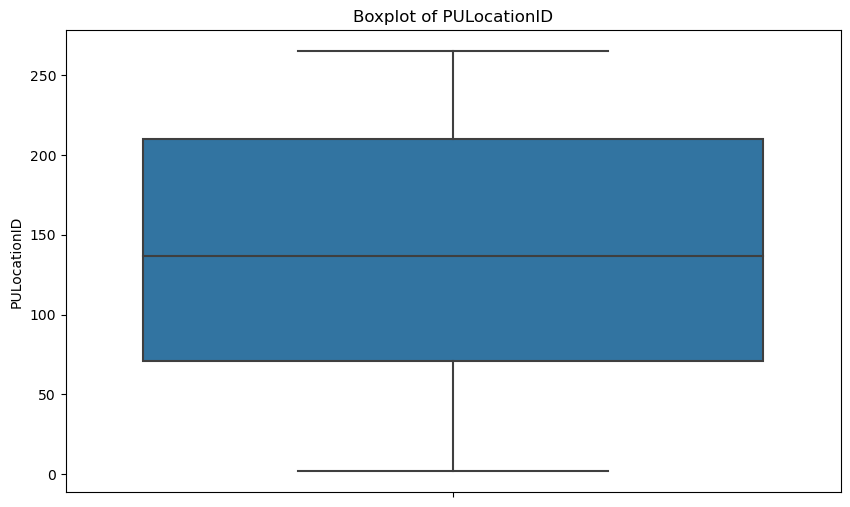

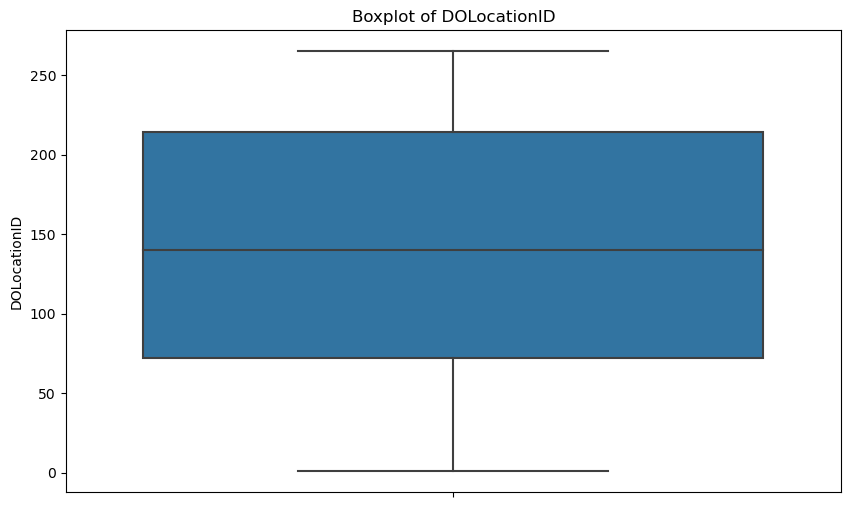

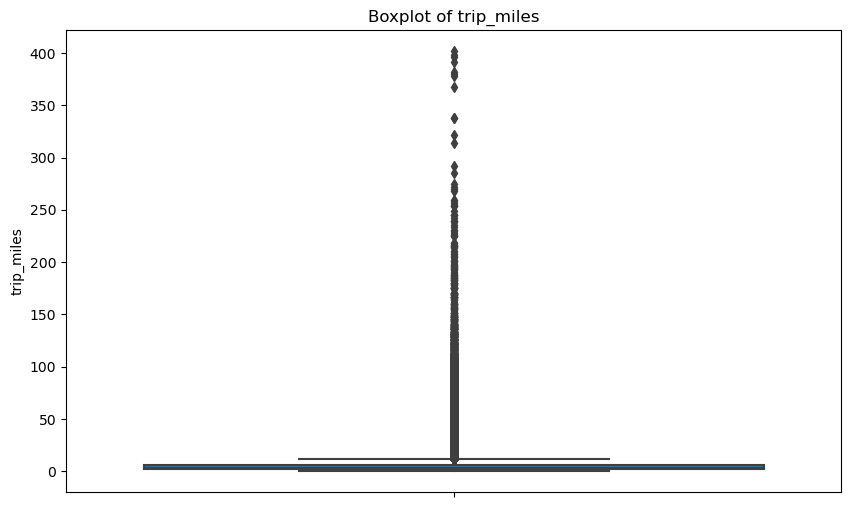

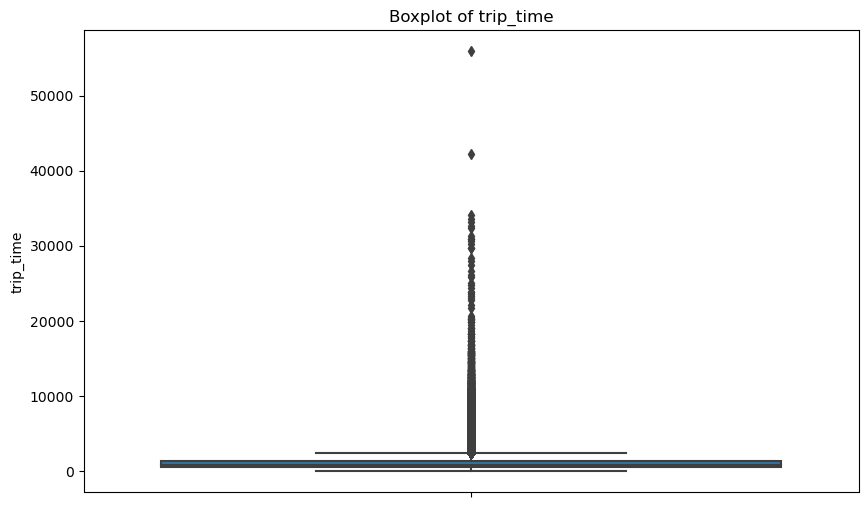

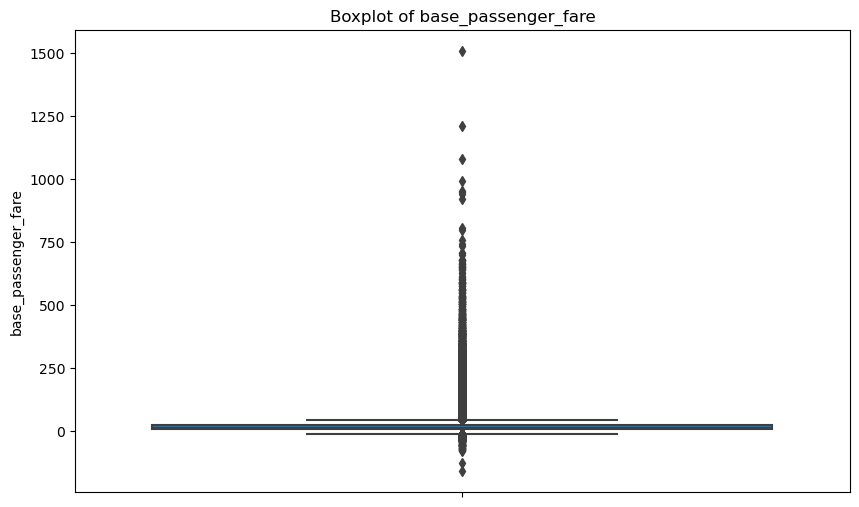

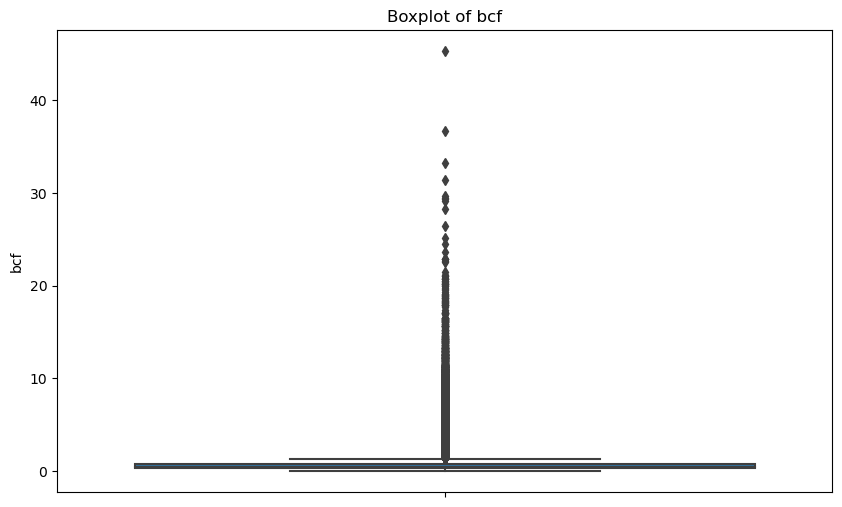

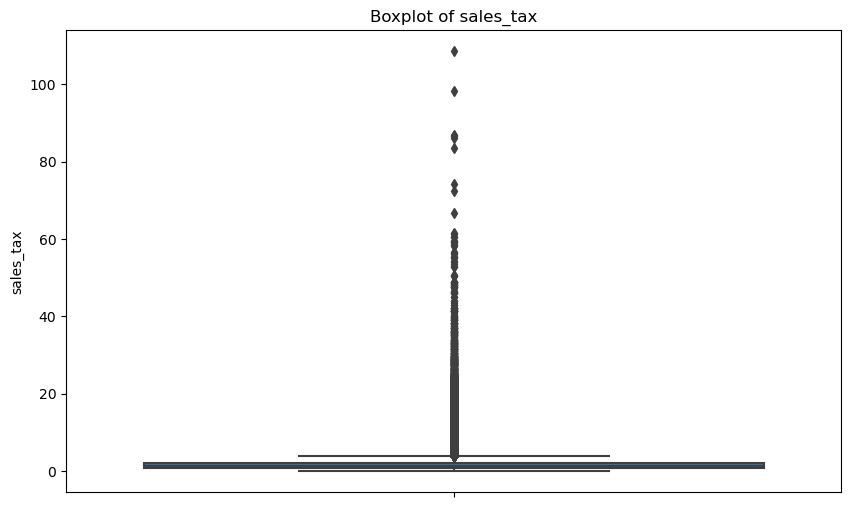

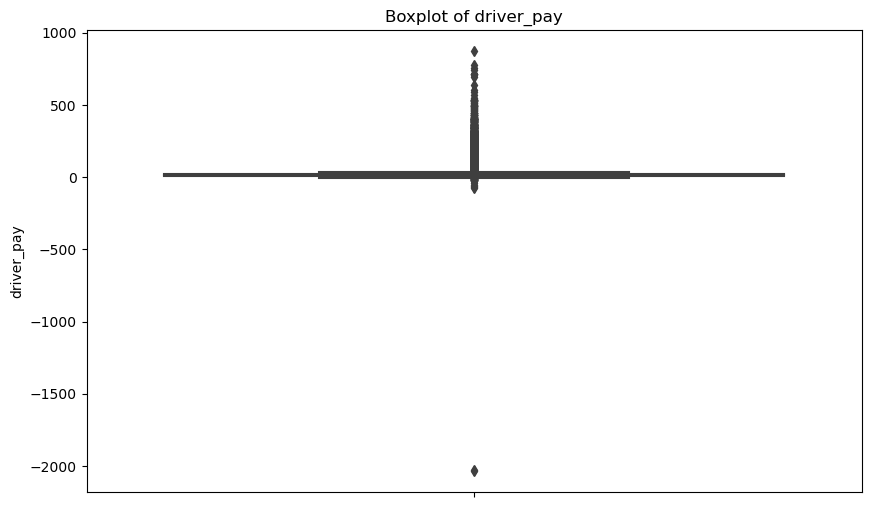

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in your dataset
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

# Plot each column in a separate figure for better visibility
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set a large size for each individual box plot
    sns.boxplot(y=mar_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to process
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']

# Step 1: Apply Winsorization to cap extreme values at 5th and 95th percentiles
# Using a transformed copy to avoid overwriting the original data
mar_new = mar_filtered.copy()
for column in columns_to_process:
    mar_new[column] = winsorize(mar_new[column], limits=[0.05, 0.05])  # Cap at 5th and 95th percentiles

# Step 2: Apply log transformation to compress the range and reduce skewness
for column in columns_to_process:
    mar_new[column] = np.log1p(mar_new[column])  # log1p(x) handles zero values

# Step 3: Remove outliers using the IQR method after log transformation
for column in columns_to_process:
    Q1 = mar_new[column].quantile(0.25)
    Q3 = mar_new[column].quantile(0.75)
    IQR = Q3 - Q1
    mar_new = mar_new[(mar_new[column] >= (Q1 - 1.5 * IQR)) & (mar_new[column] <= (Q3 + 1.5 * IQR))]

# Step 4: Plot boxplots for each column after Winsorization, log transformation, and IQR filtering
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=mar_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 154, 66, Submitted, Running, Running)

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [ ]:

# Define the emission factor (e.g., 404 grams of CO₂ per mile for a typical gasoline vehicle)
emission_factor = 404  # grams of CO₂ per mile

# Create 'estimated_emissions' column
mar_new['estimated_emissions'] = mar_new['trip_miles'] * emission_factor

# Define a threshold for categorizing emissions as "High" or "Low"
emission_threshold = 3000  # grams of CO₂

# Create 'emission_levels' column based on the threshold
mar_new['emission_levels'] = mar_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(mar_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = mar_new.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
mar_new.info()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
mar_new['dispatching_base_num'].head()
base_counts = mar_new['dispatching_base_num'].value_counts()
print(base_counts)
top_10_bases = mar_new['dispatching_base_num'].value_counts().head(10).index
mar_new = mar_new[mar_new['dispatching_base_num'].isin(top_10_bases)]
mar_new.shape
mar_new.head()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:

# Save mar_new to a new DataFrame called mar_df
mar_df = mar_new.copy()

# Display the shape and first few rows of mar_df to verify
print("Shape of mar_df:", mar_df.shape)
print(mar_df.head())

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
mar_df.to_parquet("mar2021_df.parquet", engine='pyarrow')

StatementMeta(, , , Waiting, , Waiting)

--- End of 2021-03-hvFHV.ipynb ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 6, Finished, Available, Finished)

In [2]:
apr = pd.read_parquet("Users/akumar63/2021 data/fhvhv_tripdata_2021-04.parquet")
print(apr.head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 7, Finished, Available, Finished)

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B02764               B02764   
1            HV0003               B02764               B02764   
2            HV0003               B02764               B02764   
3            HV0003               B02878               B02878   
4            HV0003               B02878               B02878   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-04-01 00:07:15 2021-04-01 00:08:56 2021-04-01 00:10:56   
1 2021-04-01 00:29:34 2021-04-01 00:31:43 2021-04-01 00:32:36   
2 2021-04-01 00:43:02 2021-04-01 00:47:31 2021-04-01 00:47:49   
3 2021-04-01 00:06:12 2021-04-01 00:11:16 2021-04-01 00:12:39   
4 2021-04-01 00:23:51 2021-04-01 00:26:24 2021-04-01 00:26:47   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-04-01 00:26:15            51           254        3.22  ...       1.36   
1 2021-04-01 00:42:04           240           248       

In [3]:
apr.shape

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 8, Finished, Available, Finished)

(14111371, 24)

In [4]:
# Check for null values in the data
null_counts = apr.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 9, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    3869088
request_datetime              0
on_scene_datetime       3867420
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64


In [5]:

unique_license_nums = apr['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 10, Finished, Available, Finished)

Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005' 'HV0004']


In [6]:

hv0004_count = apr[apr['hvfhs_license_num'] == 'HV0004'].shape[0]
print("Number of entries with 'HV0004' in 'hvfhs_license_num':", hv0004_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 11, Finished, Available, Finished)

Number of entries with 'HV0004' in 'hvfhs_license_num': 104110


In [7]:
hv0003_count = apr[apr['hvfhs_license_num'] == 'HV0003'].shape[0]
print("Number of entries with 'HV0003' in 'hvfhs_license_num':", hv0003_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 12, Finished, Available, Finished)

Number of entries with 'HV0003' in 'hvfhs_license_num': 10238382


In [8]:
hv0005_count = apr[apr['hvfhs_license_num'] == 'HV0005'].shape[0]
print("Number of entries with 'HV0005' in 'hvfhs_license_num':", hv0005_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 13, Finished, Available, Finished)

Number of entries with 'HV0005' in 'hvfhs_license_num': 3768879


In [9]:
apr_filtered = apr[~apr['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 14, Finished, Available, Finished)

In [10]:
apr_filtered = apr_filtered.drop(columns=['airport_fee'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 15, Finished, Available, Finished)

In [11]:
null_counts = apr_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 16, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num          0
dispatching_base_num       0
originating_base_num    1668
request_datetime           0
on_scene_datetime          0
pickup_datetime            0
dropoff_datetime           0
PULocationID               0
DOLocationID               0
trip_miles                 0
trip_time                  0
base_passenger_fare        0
tolls                      0
bcf                        0
sales_tax                  0
congestion_surcharge       0
tips                       0
driver_pay                 0
shared_request_flag        0
shared_match_flag          0
access_a_ride_flag         0
wav_request_flag           0
wav_match_flag             0
dtype: int64


In [12]:
apr_filtered.shape
apr_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 17, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10238382 entries, 0 to 14111370
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  tips                  float64       
 17  driver_pay            float64       
 18  shared_request_flag   object        
 19

In [13]:
apr_filtered = apr_filtered.drop(columns=['hvfhs_license_num'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 18, Finished, Available, Finished)

In [14]:
apr_filtered['date'] = apr_filtered['request_datetime'].dt.date
apr_filtered['date'].tail(15)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 19, Finished, Available, Finished)

14111353    2021-04-30
14111354    2021-04-30
14111355    2021-04-30
14111356    2021-04-30
14111357    2021-04-30
14111358    2021-04-30
14111359    2021-04-30
14111360    2021-04-30
14111361    2021-04-30
14111362    2021-04-30
14111363    2021-04-30
14111364    2021-04-30
14111365    2021-04-30
14111369    2021-04-30
14111370    2021-04-30
Name: date, dtype: object

In [15]:
import pandas as pd

# Step 1: Extract the date part from 'request_datetime' in mm-dd-yyyy format
apr_filtered['date'] = pd.to_datetime(apr_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Step 2: Remove the date part from the original datetime columns, leaving only the time
apr_filtered['request_datetime'] = pd.to_datetime(apr_filtered['request_datetime']).dt.time
apr_filtered['on_scene_datetime'] = pd.to_datetime(apr_filtered['on_scene_datetime']).dt.time
apr_filtered['pickup_datetime'] = pd.to_datetime(apr_filtered['pickup_datetime']).dt.time
apr_filtered['dropoff_datetime'] = pd.to_datetime(apr_filtered['dropoff_datetime']).dt.time

# Step 3: Extract month and day from the 'date' column
apr_filtered['month'] = pd.to_datetime(apr_filtered['date']).dt.month
apr_filtered['day'] = pd.to_datetime(apr_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(apr_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(apr_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 20, Finished, Available, Finished)

Current format of 'date' column:
0    04-01-2021
1    04-01-2021
2    04-01-2021
3    04-01-2021
4    04-01-2021
Name: date, dtype: object

Updated DataFrame:
         date  month  day request_datetime on_scene_datetime pickup_datetime  \
0  04-01-2021      4    1         00:07:15          00:08:56        00:10:56   
1  04-01-2021      4    1         00:29:34          00:31:43        00:32:36   
2  04-01-2021      4    1         00:43:02          00:47:31        00:47:49   
3  04-01-2021      4    1         00:06:12          00:11:16        00:12:39   
4  04-01-2021      4    1         00:23:51          00:26:24        00:26:47   

  dropoff_datetime  
0         00:26:15  
1         00:42:04  
2         00:56:14  
3         00:22:15  
4         00:51:53  


In [16]:
# Get unique values in the 'month' column and count them
unique_months = apr_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", apr_filtered['month'].unique())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 21, Finished, Available, Finished)


Number of unique months: 3
Unique month values: [4 3 5]


In [17]:
# Filter rows where the month is either 12 or 2
months_12_2 = apr_filtered[apr_filtered['month'].isin([12, 2])]

# Display the rows where the month is 12 or 2
print("Rows where the month is either December (12) or February (2):")
print(months_12_2)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 22, Finished, Available, Finished)

Rows where the month is either December (12) or February (2):
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, tolls, bcf, sales_tax, congestion_surcharge, tips, driver_pay, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag, date, month, day]
Index: []

[0 rows x 25 columns]


In [18]:
# Drop multiple columns
apr_filtered = apr_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips','tolls'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 23, Finished, Available, Finished)

In [19]:
apr_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 24, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10238382 entries, 0 to 14111370
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             int64  
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
dtypes: float64(6), int64(5), object(7)
memory usage: 1.4+ GB


In [20]:
duplicate_count = apr_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
apr_filtered = apr_filtered.drop_duplicates()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 25, Finished, Available, Finished)

Number of duplicate rows: 50


In [21]:
apr_filtered['dispatching_base_num'].nunique()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 26, Finished, Available, Finished)

28

In [22]:
# Define the columns to check for duplicates
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = apr_filtered[apr_filtered.duplicated(subset=duplicate_columns, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 27, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 0
Duplicate rows based on specified columns:
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, bcf, sales_tax, congestion_surcharge, driver_pay, date, month, day]
Index: []


In [23]:
apr_filtered = apr_filtered.drop_duplicates(subset=duplicate_columns)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(apr_filtered.shape)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 28, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10238357, 18)


In [24]:
# Define the columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = apr_filtered[apr_filtered.duplicated(subset=duplicate_column, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 29, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 122
Duplicate rows based on specified columns:
         dispatching_base_num originating_base_num request_datetime  \
750369                 B02765               B02765         15:27:19   
1583328                B02883               B02883         02:28:09   
2818312                B02836               B02836         05:30:28   
3718322                B02869               B02869         01:25:28   
3738050                B02869               B02869         05:31:53   
...                       ...                  ...              ...   
10890084               B02882               B02882         02:22:22   
10992361               B02875               B02875         10:28:48   
12760875               B02879               B02879         08:56:19   
13615928               B02889               B02889         02:28:48   
13709958               B02864               B02864         08:56:25   

         on_scene_datetime pickup_datetime drop

In [25]:

apr_filtered = apr_filtered.drop_duplicates(subset=duplicate_column)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(apr_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 30, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10238296, 18)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 31, Finished, Available, Finished)

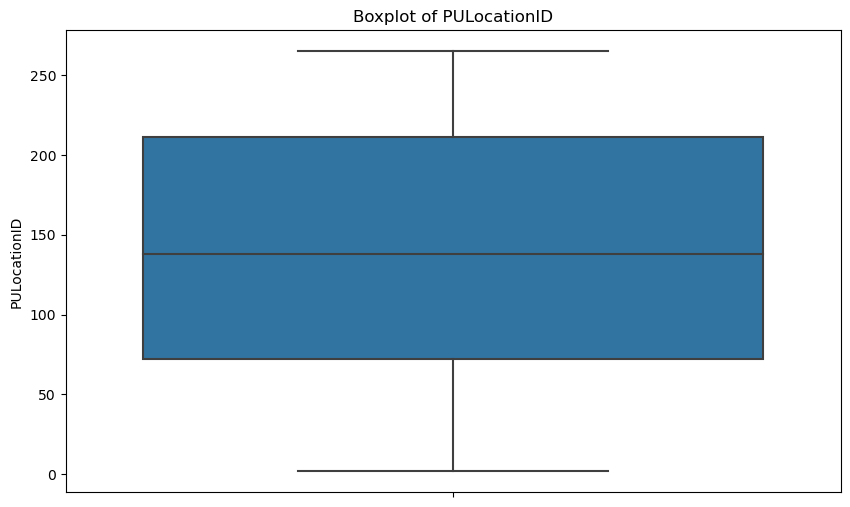

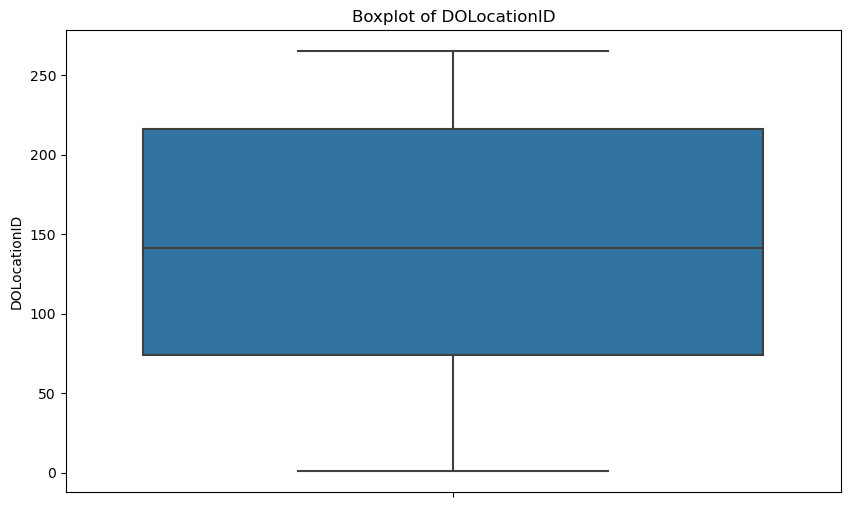

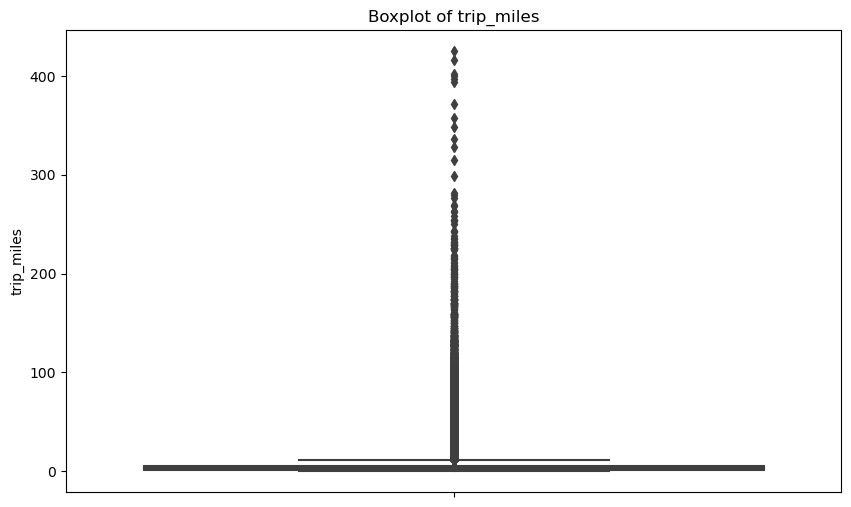

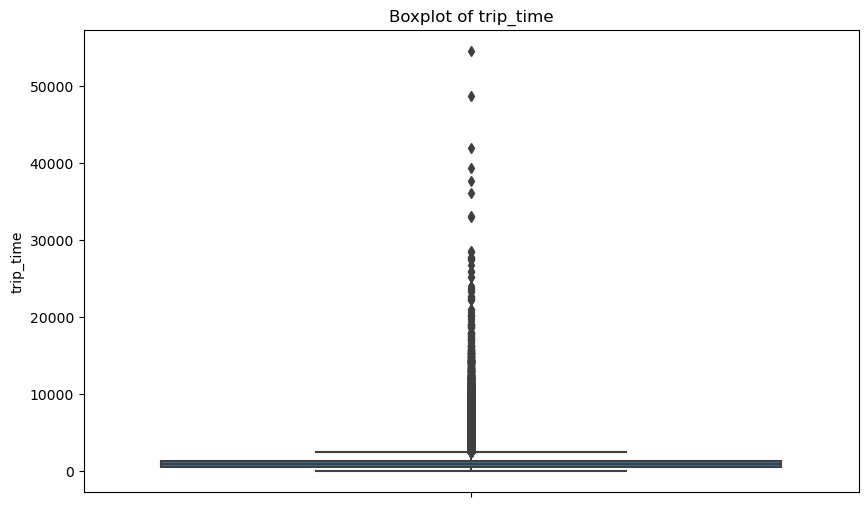

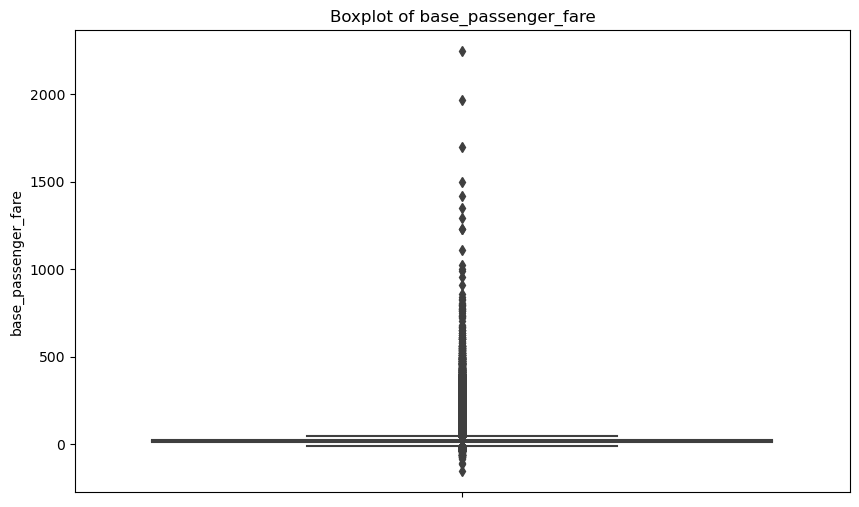

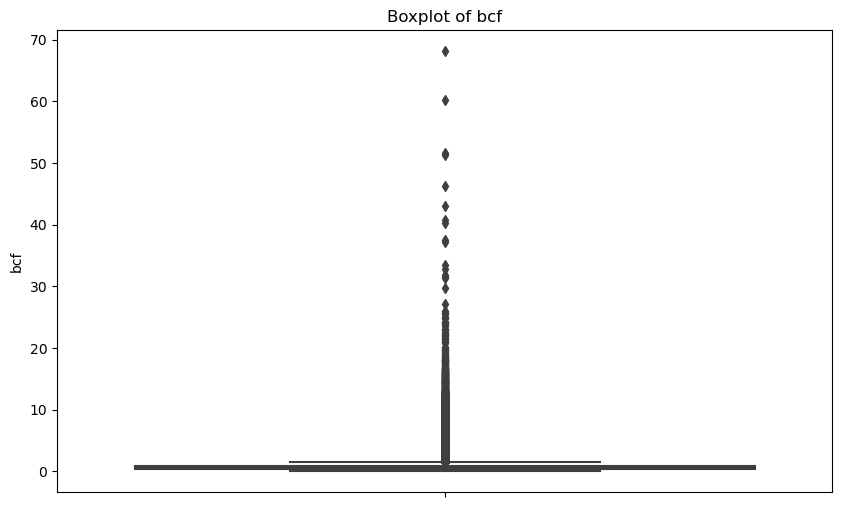

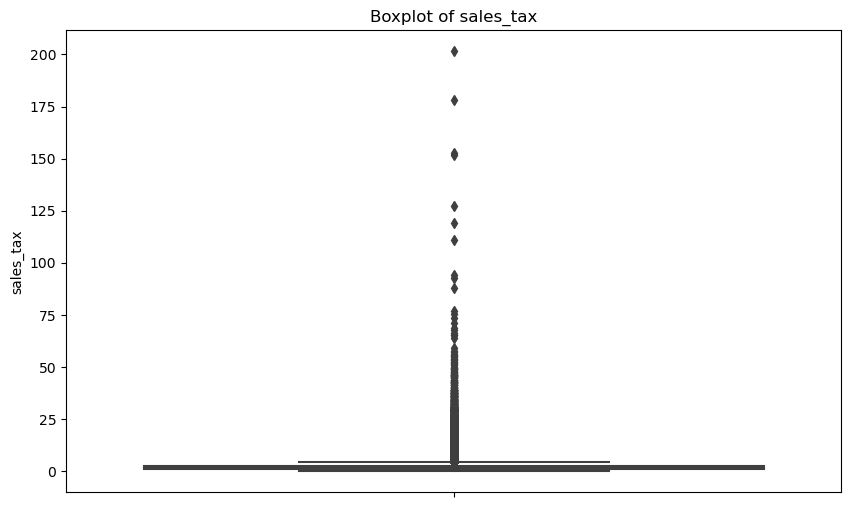

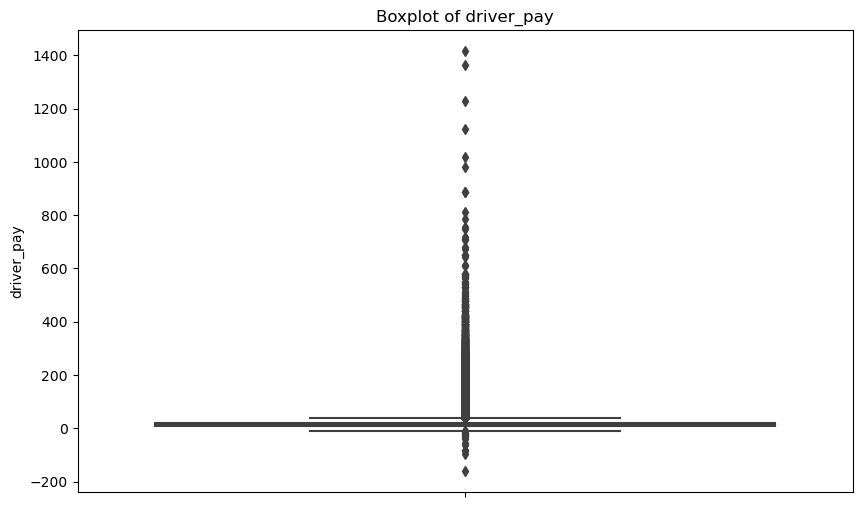

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in your dataset
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

# Plot each column in a separate figure for better visibility
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set a large size for each individual box plot
    sns.boxplot(y=apr_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to process
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']

# Step 1: Apply Winsorization to cap extreme values at 5th and 95th percentiles
# Using a transformed copy to avoid overwriting the original data
apr_new = apr_filtered.copy()
for column in columns_to_process:
    apr_new[column] = winsorize(apr_new[column], limits=[0.05, 0.05])  # Cap at 5th and 95th percentiles

# Step 2: Apply log transformation to compress the range and reduce skewness
for column in columns_to_process:
    apr_new[column] = np.log1p(apr_new[column])  # log1p(x) handles zero values

# Step 3: Remove outliers using the IQR method after log transformation
for column in columns_to_process:
    Q1 = apr_new[column].quantile(0.25)
    Q3 = apr_new[column].quantile(0.75)
    IQR = Q3 - Q1
    apr_new = apr_new[(apr_new[column] >= (Q1 - 1.5 * IQR)) & (apr_new[column] <= (Q3 + 1.5 * IQR))]

# Step 4: Plot boxplots for each column after Winsorization, log transformation, and IQR filtering
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=apr_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 156, 32, Submitted, Running, Running)

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [ ]:
# Define the emission factor (e.g., 404 grams of CO₂ per mile for a typical gasoline vehicle)
emission_factor = 404  # grams of CO₂ per mile

# Create 'estimated_emissions' column
apr_new['estimated_emissions'] = apr_new['trip_miles'] * emission_factor

# Define a threshold for categorizing emissions as "High" or "Low"
emission_threshold = 3000  # grams of CO₂

# Create 'emission_levels' column based on the threshold
apr_new['emission_levels'] = apr_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(apr_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = apr_new.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


StatementMeta(, , , Waiting, , Waiting)

In [ ]:
apr_new.info()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:

apr_new['dispatching_base_num'].head()
base_counts = apr_new['dispatching_base_num'].value_counts()
print(base_counts)
top_10_bases = apr_new['dispatching_base_num'].value_counts().head(10).index
apr_new = apr_new[apr_new['dispatching_base_num'].isin(top_10_bases)]
apr_new.shape
apr_new.head()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:

# Save apr_new to a new DataFrame called apr_df
apr_df = apr_new.copy()

# Display the shape and first few rows of apr_df to verify
print("Shape of apr_df:", apr_df.shape)
print(apr_df.head())

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
apr_df.to_parquet("Users/akumar63/apr2021_df.parquet", engine='pyarrow')

StatementMeta(, , , Waiting, , Waiting)

--- End of 2021-04-hvFHV.ipynb ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 6, Finished, Available, Finished)

In [2]:
may = pd.read_parquet("Users/akumar63/2021 data/fhvhv_tripdata_2021-05.parquet")
print(may.head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 7, Finished, Available, Finished)

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B02764               B02764   
1            HV0003               B02764               B02764   
2            HV0003               B02764               B02764   
3            HV0003               B02764               B02764   
4            HV0003               B02764               B02764   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-05-01 00:05:23 2021-05-01 00:06:08 2021-05-01 00:07:26   
1 2021-05-01 00:13:48 2021-05-01 00:17:28 2021-05-01 00:17:47   
2 2021-05-01 00:43:08 2021-05-01 00:47:11 2021-05-01 00:47:11   
3 2021-05-01 00:56:01 2021-05-01 00:58:04 2021-05-01 00:59:29   
4 2021-05-01 00:10:52 2021-05-01 00:15:57 2021-05-01 00:16:21   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-05-01 00:14:44           246           234        1.22  ...       1.81   
1 2021-05-01 00:31:24           113           238       

In [3]:
may.shape

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 8, Finished, Available, Finished)

(14719171, 24)

In [4]:
# Check for null values in the data
null_counts = may.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 9, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    3907028
request_datetime              0
on_scene_datetime       3905873
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64


In [5]:
unique_license_nums = may['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 10, Finished, Available, Finished)

Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005' 'HV0004']


In [6]:
hv0004_count = may[may['hvfhs_license_num'] == 'HV0004'].shape[0]
print("Number of entries with 'HV0004' in 'hvfhs_license_num':", hv0004_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 11, Finished, Available, Finished)

Number of entries with 'HV0004' in 'hvfhs_license_num': 96322


In [7]:
hv0003_count = may[may['hvfhs_license_num'] == 'HV0003'].shape[0]
print("Number of entries with 'HV0003' in 'hvfhs_license_num':", hv0003_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 12, Finished, Available, Finished)

Number of entries with 'HV0003' in 'hvfhs_license_num': 10808415


In [8]:

hv0005_count = may[may['hvfhs_license_num'] == 'HV0005'].shape[0]
print("Number of entries with 'HV0005' in 'hvfhs_license_num':", hv0005_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 13, Finished, Available, Finished)

Number of entries with 'HV0005' in 'hvfhs_license_num': 3814434


In [9]:

may_filtered = may[~may['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 14, Finished, Available, Finished)

In [10]:
may_filtered = may_filtered.drop(columns=['airport_fee'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 15, Finished, Available, Finished)

In [11]:
null_counts = may_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 16, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num          0
dispatching_base_num       0
originating_base_num    1155
request_datetime           0
on_scene_datetime          0
pickup_datetime            0
dropoff_datetime           0
PULocationID               0
DOLocationID               0
trip_miles                 0
trip_time                  0
base_passenger_fare        0
tolls                      0
bcf                        0
sales_tax                  0
congestion_surcharge       0
tips                       0
driver_pay                 0
shared_request_flag        0
shared_match_flag          0
access_a_ride_flag         0
wav_request_flag           0
wav_match_flag             0
dtype: int64


In [12]:
may_filtered.shape
may_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 17, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10808415 entries, 0 to 14719170
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  tips                  float64       
 17  driver_pay            float64       
 18  shared_request_flag   object        
 19

In [13]:

may_filtered = may_filtered.drop(columns=['hvfhs_license_num'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 18, Finished, Available, Finished)

In [14]:


may_filtered['date'] = may_filtered['request_datetime'].dt.date
may_filtered['date'].tail(15)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 19, Finished, Available, Finished)

14719156    2021-05-31
14719157    2021-05-31
14719158    2021-05-31
14719159    2021-05-31
14719160    2021-05-31
14719161    2021-05-31
14719162    2021-05-31
14719163    2021-05-31
14719164    2021-05-31
14719165    2021-05-31
14719166    2021-05-31
14719167    2021-05-31
14719168    2021-05-31
14719169    2021-05-31
14719170    2021-05-31
Name: date, dtype: object

In [15]:


import pandas as pd

# Step 1: Extract the date part from 'request_datetime' in mm-dd-yyyy format
may_filtered['date'] = pd.to_datetime(may_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Step 2: Remove the date part from the original datetime columns, leaving only the time
may_filtered['request_datetime'] = pd.to_datetime(may_filtered['request_datetime']).dt.time
may_filtered['on_scene_datetime'] = pd.to_datetime(may_filtered['on_scene_datetime']).dt.time
may_filtered['pickup_datetime'] = pd.to_datetime(may_filtered['pickup_datetime']).dt.time
may_filtered['dropoff_datetime'] = pd.to_datetime(may_filtered['dropoff_datetime']).dt.time

# Step 3: Extract month and day from the 'date' column
may_filtered['month'] = pd.to_datetime(may_filtered['date']).dt.month
may_filtered['day'] = pd.to_datetime(may_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(may_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(may_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 20, Finished, Available, Finished)

Current format of 'date' column:
0    05-01-2021
1    05-01-2021
2    05-01-2021
3    05-01-2021
4    05-01-2021
Name: date, dtype: object

Updated DataFrame:
         date  month  day request_datetime on_scene_datetime pickup_datetime  \
0  05-01-2021      5    1         00:05:23          00:06:08        00:07:26   
1  05-01-2021      5    1         00:13:48          00:17:28        00:17:47   
2  05-01-2021      5    1         00:43:08          00:47:11        00:47:11   
3  05-01-2021      5    1         00:56:01          00:58:04        00:59:29   
4  05-01-2021      5    1         00:10:52          00:15:57        00:16:21   

  dropoff_datetime  
0         00:14:44  
1         00:31:24  
2         00:55:24  
3         01:12:06  
4         00:59:12  


In [16]:
# Get unique values in the 'month' column and count them
unique_months = may_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", may_filtered['month'].unique())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 21, Finished, Available, Finished)


Number of unique months: 3
Unique month values: [5 4 6]


In [17]:
# Filter rows where the month is either 12 or 2
months_12_2 = may_filtered[may_filtered['month'].isin([12, 2])]

# Display the rows where the month is 12 or 2
print("Rows where the month is either December (12) or February (2):")
print(months_12_2)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 22, Finished, Available, Finished)

Rows where the month is either December (12) or February (2):
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, tolls, bcf, sales_tax, congestion_surcharge, tips, driver_pay, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag, date, month, day]
Index: []

[0 rows x 25 columns]


In [18]:
# Drop multiple columns
may_filtered = may_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips','tolls'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 23, Finished, Available, Finished)

In [19]:
may_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 24, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10808415 entries, 0 to 14719170
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             int64  
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
dtypes: float64(6), int64(5), object(7)
memory usage: 1.5+ GB


In [20]:
duplicate_count = may_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
may_filtered = may_filtered.drop_duplicates()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 25, Finished, Available, Finished)

Number of duplicate rows: 0


In [21]:
may_filtered['dispatching_base_num'].nunique()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 26, Finished, Available, Finished)

28

In [22]:
# Define the columns to check for duplicates
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = may_filtered[may_filtered.duplicated(subset=duplicate_columns, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 27, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 0
Duplicate rows based on specified columns:
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, bcf, sales_tax, congestion_surcharge, driver_pay, date, month, day]
Index: []


In [23]:
may_filtered = may_filtered.drop_duplicates(subset=duplicate_columns)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(may_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 28, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10808415, 18)


In [24]:
# Define the columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = may_filtered[may_filtered.duplicated(subset=duplicate_column, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 29, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 12
Duplicate rows based on specified columns:
        dispatching_base_num originating_base_num request_datetime  \
104886                B02877               B02877         08:19:22   
468645                B02866               B02866         21:15:34   
1256389               B02875               B02875         17:17:31   
1854290               B02872               B02872         05:47:02   
3921084               B02884               B02884         05:43:14   
4376877               B02866               B02866         08:31:15   
4757818               B02872               B02872         07:18:31   
6857363               B02836               B02836         17:12:02   
6995490               B02872               B02872         21:16:51   
7597170               B02682               B02682         08:32:29   
8403891               B02765               B02765         07:21:00   
9973343               B02764               B02764         08:

In [25]:
may_filtered = may_filtered.drop_duplicates(subset=duplicate_column)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(may_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 30, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10808409, 18)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 31, Finished, Available, Finished)

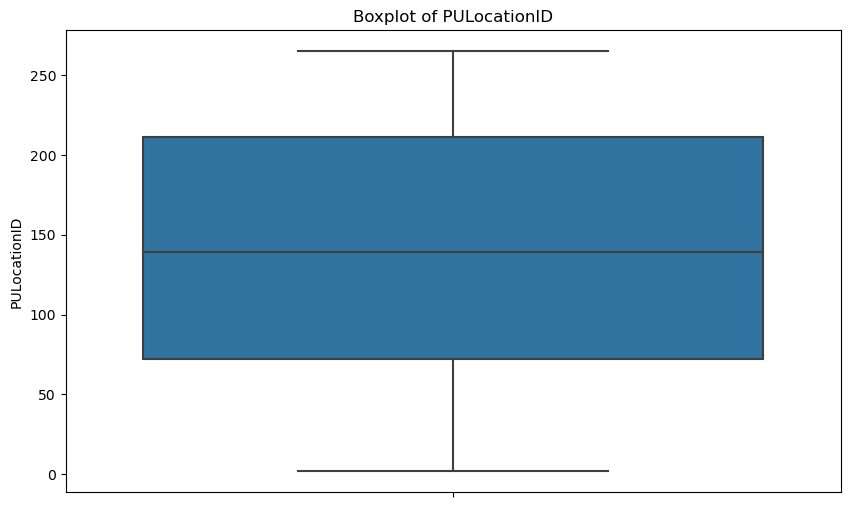

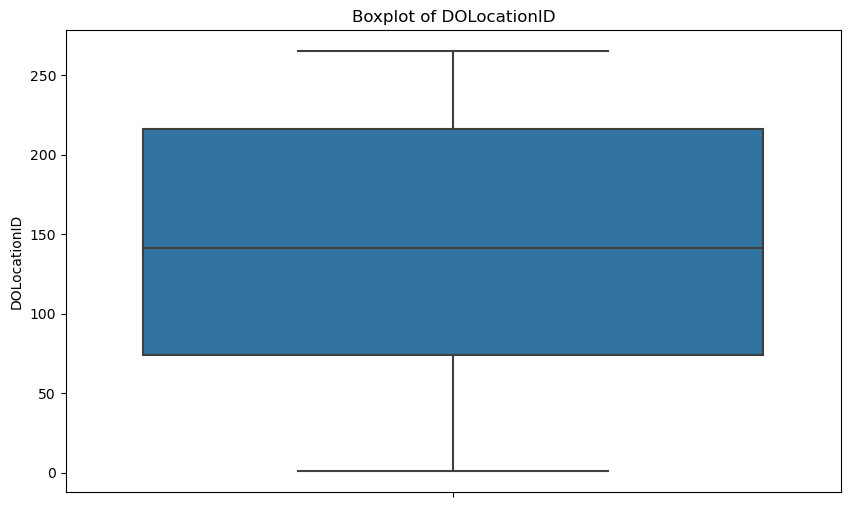

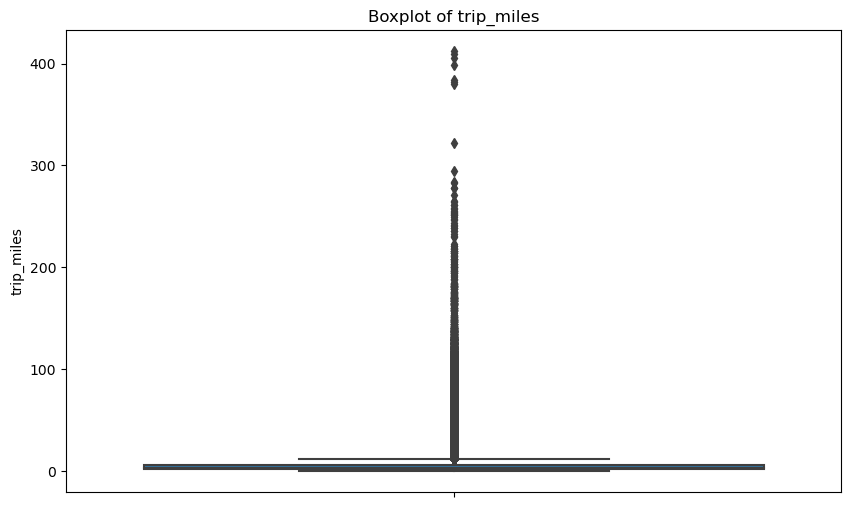

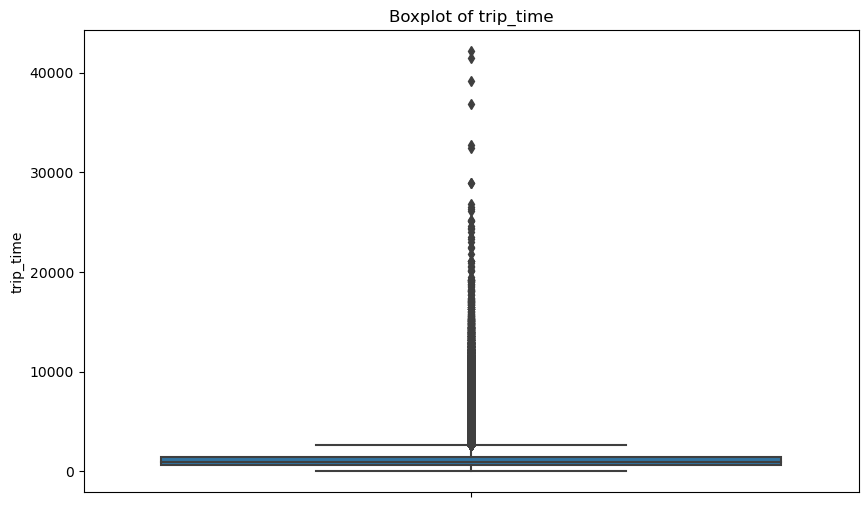

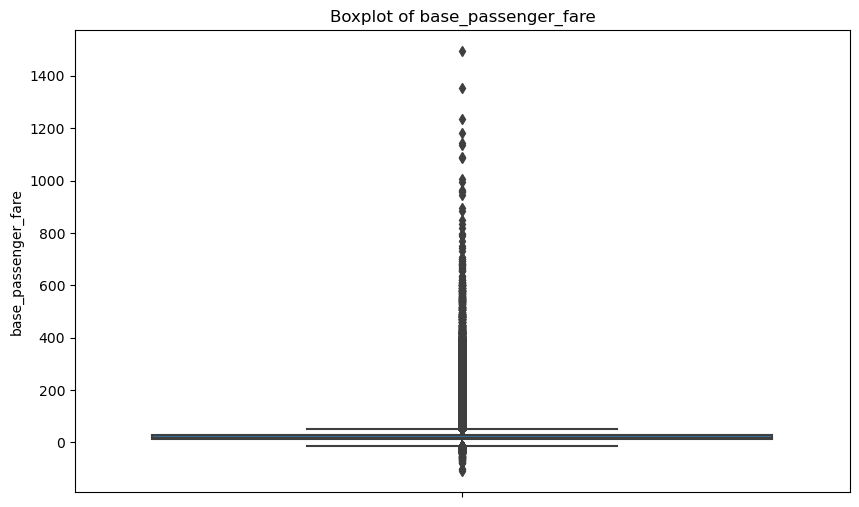

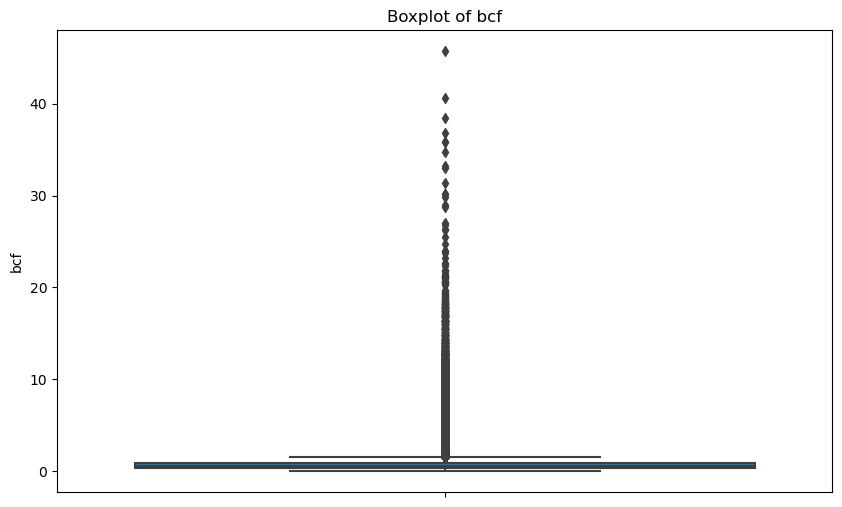

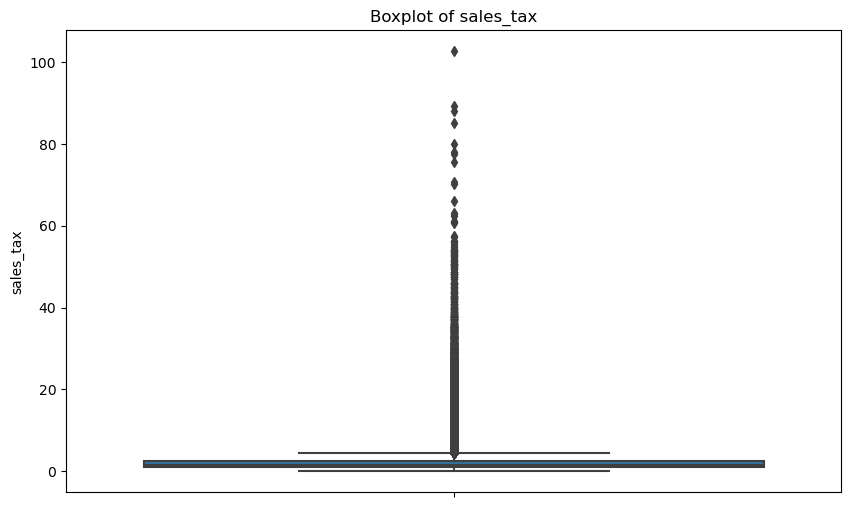

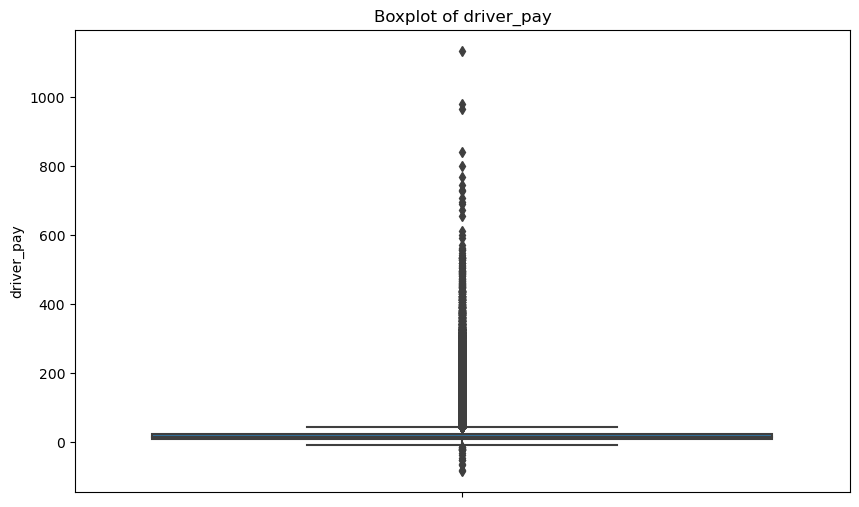

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in your dataset
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

# Plot each column in a separate figure for better visibility
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set a large size for each individual box plot
    sns.boxplot(y=may_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 32, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


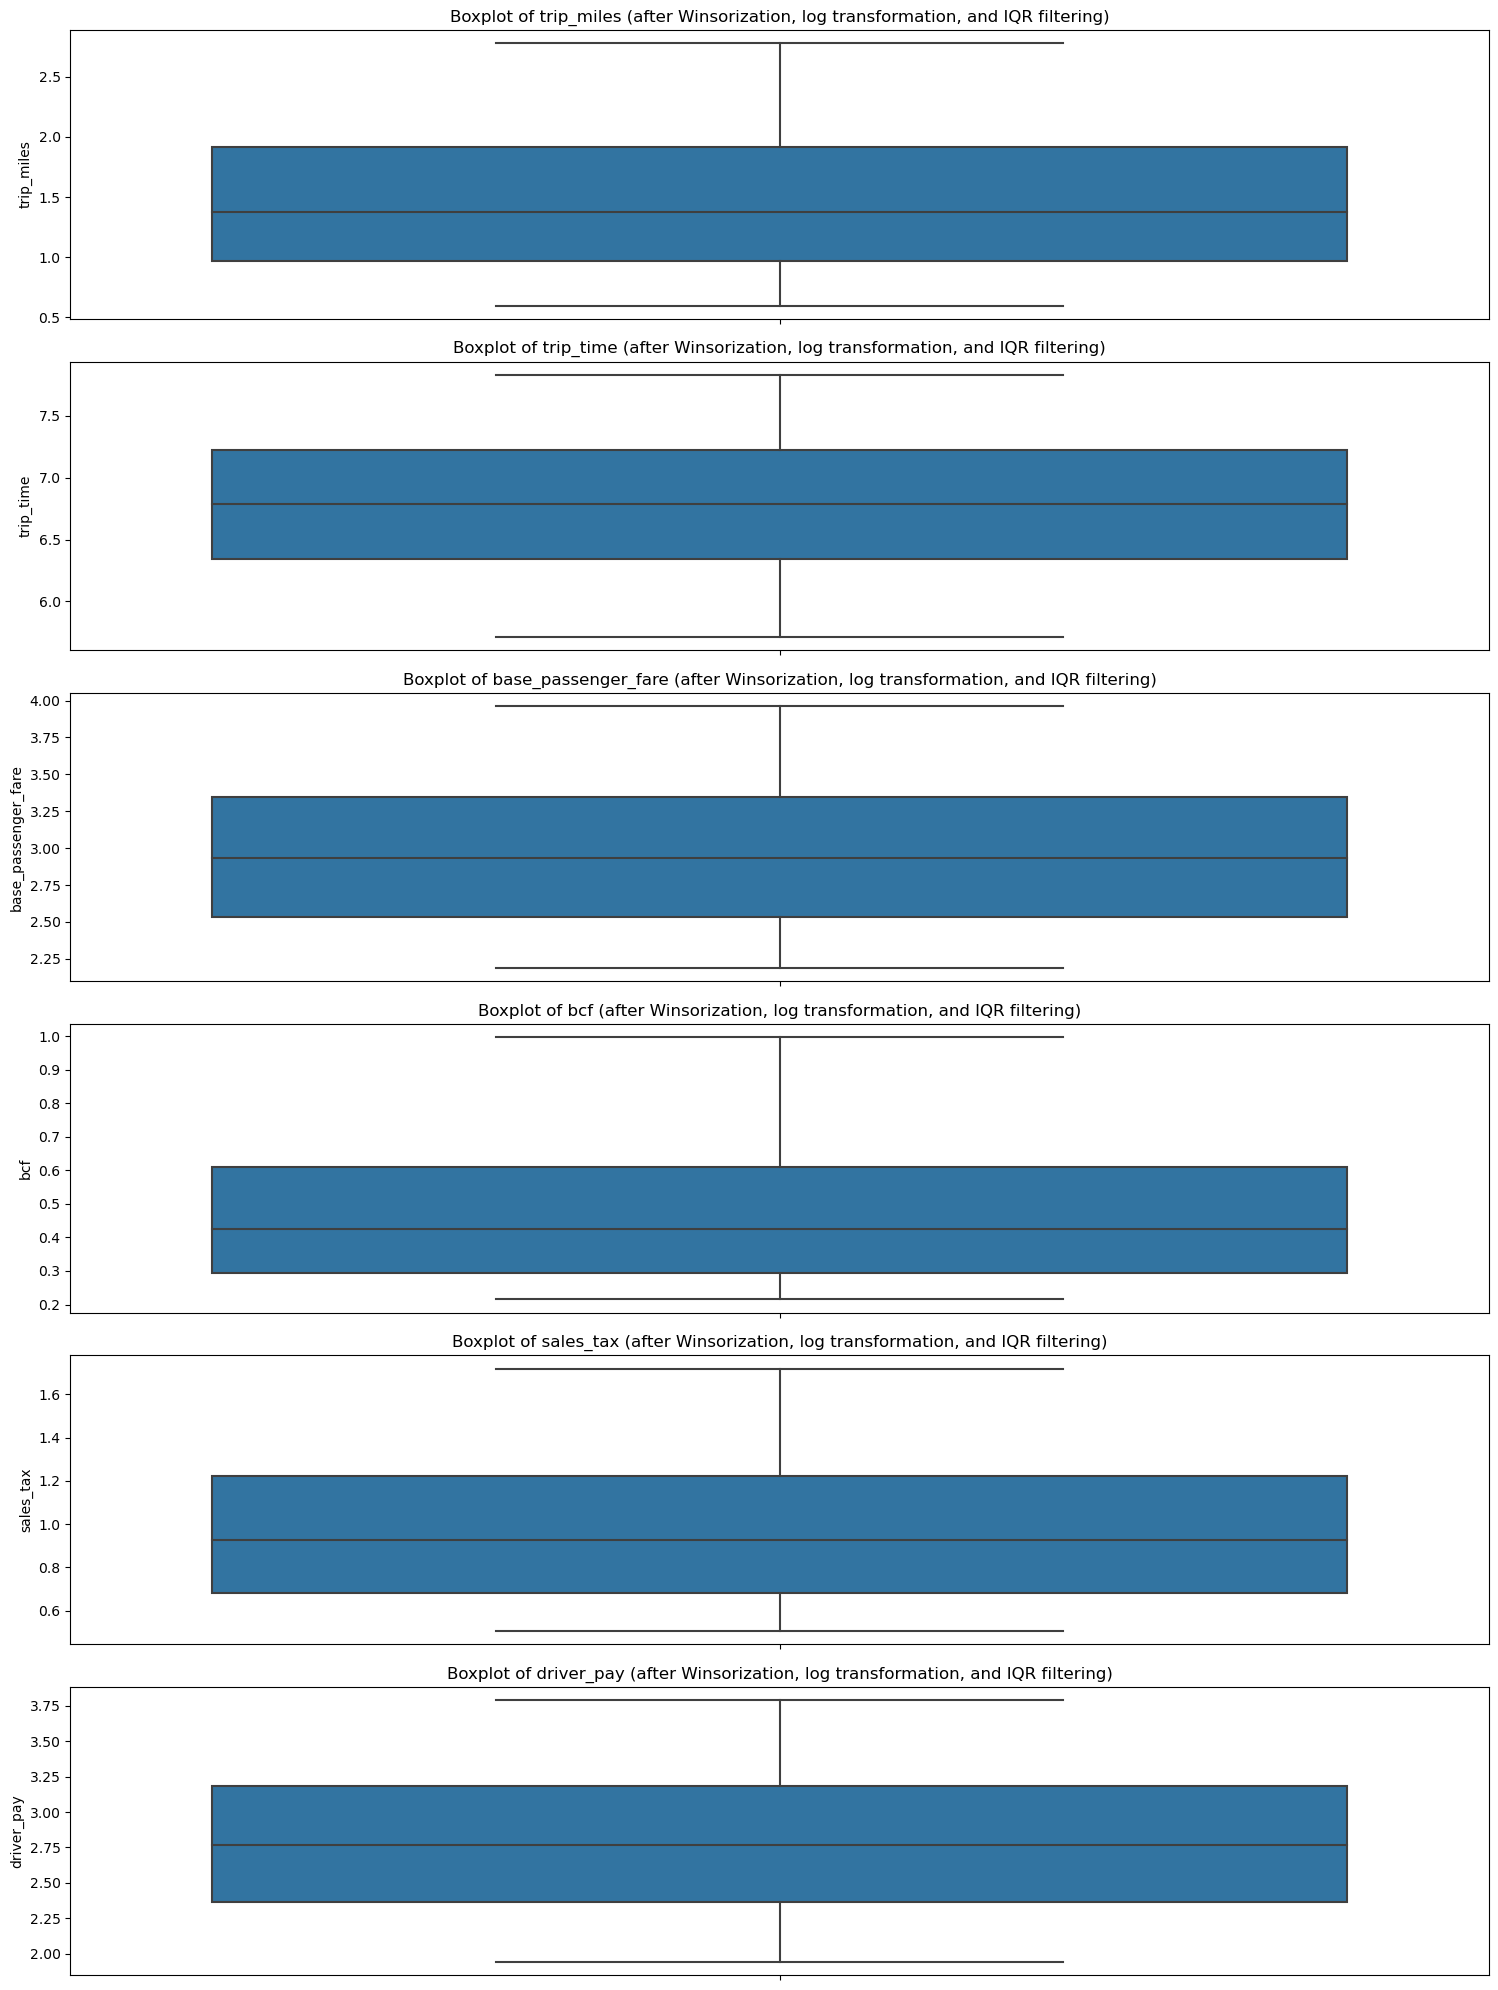

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to process
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']

# Step 1: Apply Winsorization to cap extreme values at 5th and 95th percentiles
# Using a transformed copy to avoid overwriting the original data
may_new = may_filtered.copy()
for column in columns_to_process:
    may_new[column] = winsorize(may_new[column], limits=[0.05, 0.05])  # Cap at 5th and 95th percentiles

# Step 2: Apply log transformation to compress the range and reduce skewness
for column in columns_to_process:
    may_new[column] = np.log1p(may_new[column])  # log1p(x) handles zero values

# Step 3: Remove outliers using the IQR method after log transformation
for column in columns_to_process:
    Q1 = may_new[column].quantile(0.25)
    Q3 = may_new[column].quantile(0.75)
    IQR = Q3 - Q1
    may_new = may_new[(may_new[column] >= (Q1 - 1.5 * IQR)) & (may_new[column] <= (Q3 + 1.5 * IQR))]

# Step 4: Plot boxplots for each column after Winsorization, log transformation, and IQR filtering
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=may_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()


In [28]:


# Define the emission factor (e.g., 404 grams of CO₂ per mile for a typical gasoline vehicle)
emission_factor = 404  # grams of CO₂ per mile

# Create 'estimated_emissions' column
may_new['estimated_emissions'] = may_new['trip_miles'] * emission_factor

# Define a threshold for categorizing emissions as "High" or "Low"
emission_threshold = 3000  # grams of CO₂

# Create 'emission_levels' column based on the threshold
may_new['emission_levels'] = may_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(may_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 33, Finished, Available, Finished)

   trip_miles  estimated_emissions  emission_levels
0    0.797507           322.192907                0
1    1.720979           695.275632                0
2    0.862890           348.607542                0
3    1.383791           559.051657                0
4    2.776332          1121.638010                0


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 34, Finished, Available, Finished)

/tmp/ipykernel_7943/3432471634.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = may_new.corr()


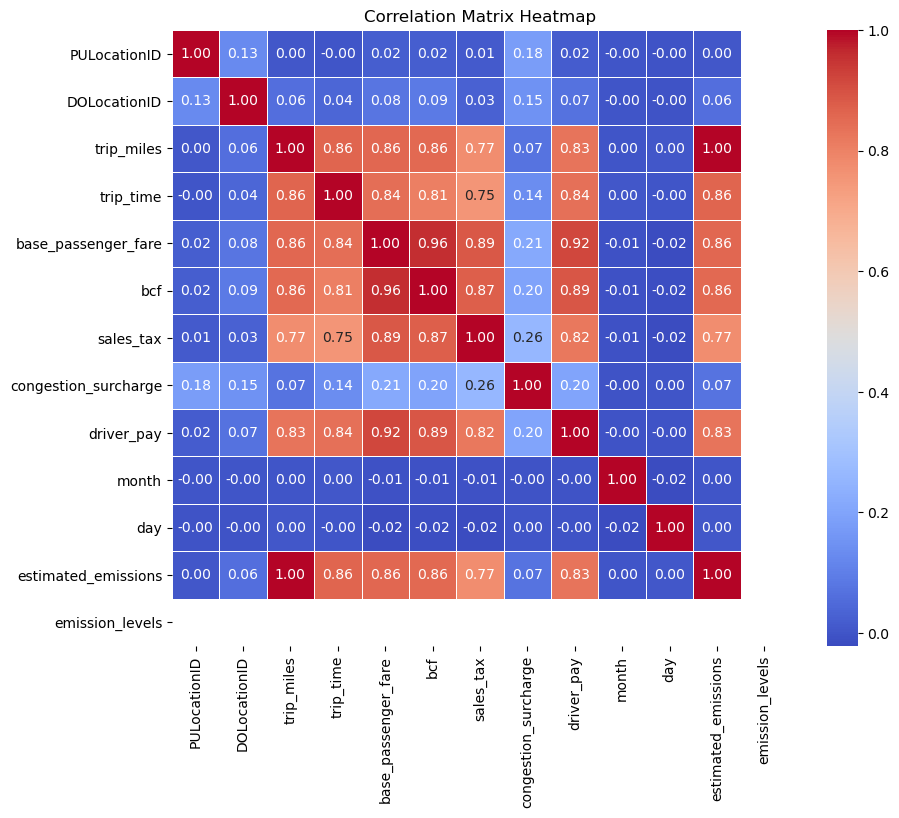

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = may_new.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [30]:

may_new.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 35, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10808409 entries, 0 to 14719170
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             float64
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
 18  estimated_emissions   float64
 19  emission_levels       int64  
dtypes: float64(8), int64(5), object(7)
memory usage: 1.7+ GB


In [31]:
may_new['dispatching_base_num'].head()
base_counts = may_new['dispatching_base_num'].value_counts()
print(base_counts)
top_10_bases = may_new['dispatching_base_num'].value_counts().head(10).index
may_new = may_new[may_new['dispatching_base_num'].isin(top_10_bases)]
may_new.shape
may_new.head()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 158, 36, Submitted, Running, Running)

B02764    1349145
B02872    1168066
B02875     921654
B02765     708847
B02869     567608
B02866     447847
B02887     426344
B02682     404125
B02864     369524
B02871     367062
B02878     355235
B02883     325962
B02617     324278
B02884     312133
B02882     302644
B02876     286778
B02835     265149
B02879     251699
B02867     250063
B02877     249551
B02888     230630
B02889     194605
B02836     170280
B02880     158319
B02395     132991
B02870     117736
B02865     107624
B02512      42510
Name: dispatching_base_num, dtype: int64


In [ ]:


# Save may_new to a new DataFrame called may_df
may_df = may_new.copy()

# Display the shape and first few rows of may_df to verify
print("Shape of may_df:", may_df.shape)
print(may_df.head())


StatementMeta(, , , Waiting, , Waiting)

In [ ]:
may_df.to_parquet("Users/akumar63/may2021_df.parquet", engine='pyarrow')

StatementMeta(, , , Waiting, , Waiting)

--- End of 2021-05-hvFHV.ipynb ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 6, Finished, Available, Finished)

In [2]:
jun = pd.read_parquet("Users/akumar63/2021 data/fhvhv_tripdata_2021-06.parquet")
print(jun.head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 7, Finished, Available, Finished)

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B02764               B02764   
1            HV0003               B02764               B02764   
2            HV0003               B02764               B02764   
3            HV0003               B02764               B02764   
4            HV0005               B02510                 None   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-05-31 23:53:49 2021-06-01 00:02:23 2021-06-01 00:02:41   
1 2021-06-01 00:08:40 2021-06-01 00:15:20 2021-06-01 00:16:16   
2 2021-06-01 00:15:26 2021-06-01 00:24:48 2021-06-01 00:27:01   
3 2021-06-01 00:22:29 2021-06-01 00:44:48 2021-06-01 00:46:08   
4 2021-06-01 00:42:14                 NaT 2021-06-01 00:45:42   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-06-01 00:07:46           174            18       1.000  ...       0.72   
1 2021-06-01 00:21:14            32           254       

In [3]:
jun.shape

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 8, Finished, Available, Finished)

(14961892, 24)

In [4]:
# Check for null values in the data
null_counts = jun.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 9, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4210453
request_datetime              0
on_scene_datetime       4209518
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64


In [5]:
unique_license_nums = jun['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 10, Finished, Available, Finished)

Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005' 'HV0004']


In [6]:

hv0004_count = jun[jun['hvfhs_license_num'] == 'HV0004'].shape[0]
print("Number of entries with 'HV0004' in 'hvfhs_license_num':", hv0004_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 11, Finished, Available, Finished)

Number of entries with 'HV0004' in 'hvfhs_license_num': 83842


In [7]:

hv0003_count = jun[jun['hvfhs_license_num'] == 'HV0003'].shape[0]
print("Number of entries with 'HV0003' in 'hvfhs_license_num':", hv0003_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 12, Finished, Available, Finished)

Number of entries with 'HV0003' in 'hvfhs_license_num': 10747390


In [8]:
hv0005_count = jun[jun['hvfhs_license_num'] == 'HV0005'].shape[0]
print("Number of entries with 'HV0005' in 'hvfhs_license_num':", hv0005_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 13, Finished, Available, Finished)

Number of entries with 'HV0005' in 'hvfhs_license_num': 4130660


In [9]:
jun_filtered = jun[~jun['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 14, Finished, Available, Finished)

In [10]:
jun_filtered = jun_filtered.drop(columns=['airport_fee'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 15, Finished, Available, Finished)

In [11]:

null_counts = jun_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 16, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num         0
dispatching_base_num      0
originating_base_num    936
request_datetime          0
on_scene_datetime         0
pickup_datetime           0
dropoff_datetime          0
PULocationID              0
DOLocationID              0
trip_miles                0
trip_time                 0
base_passenger_fare       0
tolls                     0
bcf                       0
sales_tax                 0
congestion_surcharge      0
tips                      0
driver_pay                0
shared_request_flag       0
shared_match_flag         0
access_a_ride_flag        0
wav_request_flag          0
wav_match_flag            0
dtype: int64


In [12]:
jun_filtered.shape
jun_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 17, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10747390 entries, 0 to 14961891
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  tips                  float64       
 17  driver_pay            float64       
 18  shared_request_flag   object        
 19

In [13]:
jun_filtered = jun_filtered.drop(columns=['hvfhs_license_num'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 18, Finished, Available, Finished)

In [14]:

jun_filtered['date'] = jun_filtered['request_datetime'].dt.date
jun_filtered['date'].tail(15)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 19, Finished, Available, Finished)

14961868    2021-06-30
14961869    2021-06-30
14961870    2021-06-30
14961871    2021-06-30
14961876    2021-06-30
14961877    2021-06-30
14961882    2021-06-30
14961883    2021-06-30
14961884    2021-06-30
14961885    2021-06-30
14961886    2021-06-30
14961887    2021-06-30
14961888    2021-06-30
14961890    2021-06-30
14961891    2021-06-30
Name: date, dtype: object

In [15]:
import pandas as pd

# Step 1: Extract the date part from 'request_datetime' in mm-dd-yyyy format
jun_filtered['date'] = pd.to_datetime(jun_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Step 2: Remove the date part from the original datetime columns, leaving only the time
jun_filtered['request_datetime'] = pd.to_datetime(jun_filtered['request_datetime']).dt.time
jun_filtered['on_scene_datetime'] = pd.to_datetime(jun_filtered['on_scene_datetime']).dt.time
jun_filtered['pickup_datetime'] = pd.to_datetime(jun_filtered['pickup_datetime']).dt.time
jun_filtered['dropoff_datetime'] = pd.to_datetime(jun_filtered['dropoff_datetime']).dt.time

# Step 3: Extract month and day from the 'date' column
jun_filtered['month'] = pd.to_datetime(jun_filtered['date']).dt.month
jun_filtered['day'] = pd.to_datetime(jun_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(jun_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(jun_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 20, Finished, Available, Finished)

Current format of 'date' column:
0    05-31-2021
1    06-01-2021
2    06-01-2021
3    06-01-2021
8    06-01-2021
Name: date, dtype: object

Updated DataFrame:
         date  month  day request_datetime on_scene_datetime pickup_datetime  \
0  05-31-2021      5   31         23:53:49          00:02:23        00:02:41   
1  06-01-2021      6    1         00:08:40          00:15:20        00:16:16   
2  06-01-2021      6    1         00:15:26          00:24:48        00:27:01   
3  06-01-2021      6    1         00:22:29          00:44:48        00:46:08   
8  06-01-2021      6    1         00:40:30          00:43:07        00:48:06   

  dropoff_datetime  
0         00:07:46  
1         00:21:14  
2         00:42:11  
3         00:53:45  
8         01:04:10  


In [16]:

# Get unique values in the 'month' column and count them
unique_months = jun_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", jun_filtered['month'].unique())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 21, Finished, Available, Finished)


Number of unique months: 3
Unique month values: [5 6 7]


In [17]:
# Filter rows where the month is either 12 or 2
months_12_2 = jun_filtered[jun_filtered['month'].isin([12, 2])]

# Display the rows where the month is 12 or 2
print("Rows where the month is either December (12) or February (2):")
print(months_12_2)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 22, Finished, Available, Finished)

Rows where the month is either December (12) or February (2):
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, tolls, bcf, sales_tax, congestion_surcharge, tips, driver_pay, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag, date, month, day]
Index: []

[0 rows x 25 columns]


In [18]:
# Drop multiple columns
jun_filtered = jun_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips','tolls'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 23, Finished, Available, Finished)

In [19]:

jun_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 24, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10747390 entries, 0 to 14961891
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             int64  
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
dtypes: float64(6), int64(5), object(7)
memory usage: 1.5+ GB


In [20]:
duplicate_count = jun_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
jun_filtered = jun_filtered.drop_duplicates()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 25, Finished, Available, Finished)

Number of duplicate rows: 0


In [21]:
jun_filtered['dispatching_base_num'].nunique()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 26, Finished, Available, Finished)

28

In [22]:
# Define the columns to check for duplicates
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = jun_filtered[jun_filtered.duplicated(subset=duplicate_columns, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 27, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 0
Duplicate rows based on specified columns:
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, bcf, sales_tax, congestion_surcharge, driver_pay, date, month, day]
Index: []


In [23]:

jun_filtered = jun_filtered.drop_duplicates(subset=duplicate_columns)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(jun_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 28, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10747390, 18)


In [24]:

# Define the columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = jun_filtered[jun_filtered.duplicated(subset=duplicate_column, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 29, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 10
Duplicate rows based on specified columns:
         dispatching_base_num originating_base_num request_datetime  \
207194                 B02872               B02872         14:51:57   
588681                 B02765               B02765         11:57:45   
648161                 B02835               B02835         15:01:29   
3670329                B02871               B02871         11:58:43   
5032610                B02875               B02875         07:25:00   
5054558                B02875               B02875         07:58:47   
7097299                B02395               B02395         07:56:40   
10142612               B02764               B02764         07:25:00   
10296934               B02889               B02889         14:54:09   
13831098               B02876               B02876         15:00:59   

         on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
207194            14:57:54        14:59:15

In [25]:
jun_filtered = jun_filtered.drop_duplicates(subset=duplicate_column)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(jun_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 159, 30, Submitted, Running, Running)

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in your dataset
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

# Plot each column in a separate figure for better visibility
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set a large size for each individual box plot
    sns.boxplot(y=jun_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to process
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']

# Step 1: Apply Winsorization to cap extreme values at 5th and 95th percentiles
# Using a transformed copy to avoid overwriting the original data
jun_new = jun_filtered.copy()
for column in columns_to_process:
    jun_new[column] = winsorize(jun_new[column], limits=[0.05, 0.05])  # Cap at 5th and 95th percentiles

# Step 2: Apply log transformation to compress the range and reduce skewness
for column in columns_to_process:
    jun_new[column] = np.log1p(jun_new[column])  # log1p(x) handles zero values

# Step 3: Remove outliers using the IQR method after log transformation
for column in columns_to_process:
    Q1 = jun_new[column].quantile(0.25)
    Q3 = jun_new[column].quantile(0.75)
    IQR = Q3 - Q1
    jun_new = jun_new[(jun_new[column] >= (Q1 - 1.5 * IQR)) & (jun_new[column] <= (Q3 + 1.5 * IQR))]

# Step 4: Plot boxplots for each column after Winsorization, log transformation, and IQR filtering
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=jun_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()


StatementMeta(, , , Waiting, , Waiting)

In [ ]:


# Define the emission factor (e.g., 404 grams of CO₂ per mile for a typical gasoline vehicle)
emission_factor = 404  # grams of CO₂ per mile

# Create 'estimated_emissions' column
jun_new['estimated_emissions'] = jun_new['trip_miles'] * emission_factor

# Define a threshold for categorizing emissions as "High" or "Low"
emission_threshold = 3000  # grams of CO₂

# Create 'emission_levels' column based on the threshold
jun_new['emission_levels'] = jun_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(jun_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = jun_new.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
jun_new.info()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
jun_new['dispatching_base_num'].head()
base_counts = jun_new['dispatching_base_num'].value_counts()
print(base_counts)
top_10_bases = jun_new['dispatching_base_num'].value_counts().head(10).index
jun_new = jun_new[jun_new['dispatching_base_num'].isin(top_10_bases)]
jun_new.shape
jun_new.head()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:

# Save jun_new to a new DataFrame called jun_df
jun_df = jun_new.copy()

# Display the shape and first few rows of jun_df to verify
print("Shape of jun_df:", jun_df.shape)
print(jun_df.head())


StatementMeta(, , , Waiting, , Waiting)

In [ ]:
jun_df.to_parquet("Users/akumar63/jun2021_df.parquet", engine='pyarrow')

StatementMeta(, , , Waiting, , Waiting)

--- End of 2021-06-hvFHV.ipynb ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 6, Finished, Available, Finished)

In [2]:
jul = pd.read_parquet("Users/akumar63/2021 data/fhvhv_tripdata_2021-07.parquet")
print(jul.head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 7, Finished, Available, Finished)

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B02875               B02875   
1            HV0003               B02875               B02875   
2            HV0003               B02878               B02878   
3            HV0003               B02878               B02878   
4            HV0003               B02764               B02764   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-07-01 00:04:14 2021-07-01 00:09:24 2021-07-01 00:10:28   
1 2021-07-01 00:18:00 2021-07-01 00:29:04 2021-07-01 00:30:11   
2 2021-07-01 00:30:51 2021-07-01 00:35:31 2021-07-01 00:36:42   
3 2021-07-01 00:46:24 2021-07-01 00:49:43 2021-07-01 00:50:59   
4 2021-07-01 00:11:13 2021-07-01 00:14:34 2021-07-01 00:14:45   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-07-01 00:17:53            82           157        1.29  ...       0.70   
1 2021-07-01 00:36:37            82            95       

In [3]:
jul.shape

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 8, Finished, Available, Finished)

(15027174, 24)

In [4]:

# Check for null values in the data
null_counts = jul.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 9, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4319577
request_datetime              0
on_scene_datetime       4318422
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64


In [5]:
unique_license_nums = jul['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 10, Finished, Available, Finished)

Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005' 'HV0004']


In [6]:

hv0004_count = jul[jul['hvfhs_license_num'] == 'HV0004'].shape[0]
print("Number of entries with 'HV0004' in 'hvfhs_license_num':", hv0004_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 11, Finished, Available, Finished)

Number of entries with 'HV0004' in 'hvfhs_license_num': 92956


In [7]:

hv0003_count = jul[jul['hvfhs_license_num'] == 'HV0003'].shape[0]
print("Number of entries with 'HV0003' in 'hvfhs_license_num':", hv0003_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 12, Finished, Available, Finished)

Number of entries with 'HV0003' in 'hvfhs_license_num': 10704366


In [8]:
hv0005_count = jul[jul['hvfhs_license_num'] == 'HV0005'].shape[0]
print("Number of entries with 'HV0005' in 'hvfhs_license_num':", hv0005_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 13, Finished, Available, Finished)

Number of entries with 'HV0005' in 'hvfhs_license_num': 4229852


In [9]:
jul_filtered = jul[~jul['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 14, Finished, Available, Finished)

In [10]:
jul_filtered = jul_filtered.drop(columns=['airport_fee'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 15, Finished, Available, Finished)

In [11]:

null_counts = jul_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 16, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num          0
dispatching_base_num       0
originating_base_num    1155
request_datetime           0
on_scene_datetime          0
pickup_datetime            0
dropoff_datetime           0
PULocationID               0
DOLocationID               0
trip_miles                 0
trip_time                  0
base_passenger_fare        0
tolls                      0
bcf                        0
sales_tax                  0
congestion_surcharge       0
tips                       0
driver_pay                 0
shared_request_flag        0
shared_match_flag          0
access_a_ride_flag         0
wav_request_flag           0
wav_match_flag             0
dtype: int64


In [12]:

jul_filtered.shape
jul_filtered.info()


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 17, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10704366 entries, 0 to 15027173
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  tips                  float64       
 17  driver_pay            float64       
 18  shared_request_flag   object        
 19

In [13]:

jul_filtered = jul_filtered.drop(columns=['hvfhs_license_num'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 18, Finished, Available, Finished)

In [14]:
jul_filtered['date'] = jul_filtered['request_datetime'].dt.date
jul_filtered['date'].tail(15)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 19, Finished, Available, Finished)

15027159    2021-07-31
15027160    2021-07-31
15027161    2021-07-31
15027162    2021-07-31
15027163    2021-07-31
15027164    2021-07-31
15027165    2021-07-31
15027166    2021-07-31
15027167    2021-07-31
15027168    2021-07-31
15027169    2021-07-31
15027170    2021-07-31
15027171    2021-07-31
15027172    2021-07-31
15027173    2021-07-31
Name: date, dtype: object

In [15]:
import pandas as pd

# Step 1: Extract the date part from 'request_datetime' in mm-dd-yyyy format
jul_filtered['date'] = pd.to_datetime(jul_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Step 2: Remove the date part from the original datetime columns, leaving only the time
jul_filtered['request_datetime'] = pd.to_datetime(jul_filtered['request_datetime']).dt.time
jul_filtered['on_scene_datetime'] = pd.to_datetime(jul_filtered['on_scene_datetime']).dt.time
jul_filtered['pickup_datetime'] = pd.to_datetime(jul_filtered['pickup_datetime']).dt.time
jul_filtered['dropoff_datetime'] = pd.to_datetime(jul_filtered['dropoff_datetime']).dt.time

# Step 3: Extract month and day from the 'date' column
jul_filtered['month'] = pd.to_datetime(jul_filtered['date']).dt.month
jul_filtered['day'] = pd.to_datetime(jul_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(jul_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(jul_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 20, Finished, Available, Finished)

Current format of 'date' column:
0    07-01-2021
1    07-01-2021
2    07-01-2021
3    07-01-2021
4    07-01-2021
Name: date, dtype: object

Updated DataFrame:
         date  month  day request_datetime on_scene_datetime pickup_datetime  \
0  07-01-2021      7    1         00:04:14          00:09:24        00:10:28   
1  07-01-2021      7    1         00:18:00          00:29:04        00:30:11   
2  07-01-2021      7    1         00:30:51          00:35:31        00:36:42   
3  07-01-2021      7    1         00:46:24          00:49:43        00:50:59   
4  07-01-2021      7    1         00:11:13          00:14:34        00:14:45   

  dropoff_datetime  
0         00:17:53  
1         00:36:37  
2         00:46:03  
3         01:05:03  
4         00:31:36  


In [16]:
# Get unique values in the 'month' column and count them
unique_months = jul_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", jul_filtered['month'].unique())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 21, Finished, Available, Finished)


Number of unique months: 3
Unique month values: [7 6 8]


In [17]:

# Filter rows where the month is either 12 or 2
months_12_2 = jul_filtered[jul_filtered['month'].isin([12, 2])]

# Display the rows where the month is 12 or 2
print("Rows where the month is either December (12) or February (2):")
print(months_12_2)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 22, Finished, Available, Finished)

Rows where the month is either December (12) or February (2):
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, tolls, bcf, sales_tax, congestion_surcharge, tips, driver_pay, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag, date, month, day]
Index: []

[0 rows x 25 columns]


In [18]:
# Drop multiple columns
jul_filtered = jul_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips','tolls'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 23, Finished, Available, Finished)

In [19]:

jul_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 24, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10704366 entries, 0 to 15027173
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             int64  
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
dtypes: float64(6), int64(5), object(7)
memory usage: 1.5+ GB


In [20]:
duplicate_count = jul_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
jul_filtered = jul_filtered.drop_duplicates()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 25, Finished, Available, Finished)

Number of duplicate rows: 0


In [21]:
jul_filtered['dispatching_base_num'].nunique()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 26, Finished, Available, Finished)

28

In [22]:
# Define the columns to check for duplicates
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = jul_filtered[jul_filtered.duplicated(subset=duplicate_columns, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 27, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 2
Duplicate rows based on specified columns:
         dispatching_base_num originating_base_num request_datetime  \
10145895               B02878               B02878         05:30:35   
10632929               B02878               B02878         05:31:58   

         on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
10145895          05:33:29        05:34:45         05:38:39           197   
10632929          05:33:28        05:34:45         05:38:39           197   

          DOLocationID  trip_miles  trip_time  base_passenger_fare   bcf  \
10145895           130        1.04        234                 7.12  0.21   
10632929           130        1.04        234                 7.12  0.21   

          sales_tax  congestion_surcharge  driver_pay        date  month  day  
10145895       0.63                   0.0        6.38  07-22-2021      7   22  
10632929       0.63                   0.0        6.34  07-23-2021  

In [23]:

jul_filtered = jul_filtered.drop_duplicates(subset=duplicate_columns)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(jul_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 28, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10704365, 18)


In [24]:

# Define the columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = jul_filtered[jul_filtered.duplicated(subset=duplicate_column, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 29, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 14
Duplicate rows based on specified columns:
         dispatching_base_num originating_base_num request_datetime  \
47355                  B02875               B02875         05:48:32   
140110                 B02877               B02877         10:49:45   
476441                 B02764               B02764         22:17:34   
633546                 B02882               B02882         10:17:28   
2958070                B02876               B02876         11:17:50   
4460129                B02764               B02764         10:44:54   
9186551                B02869               B02869         20:44:04   
9685651                B02764               B02764         03:35:00   
11051528               B02875               B02875         22:16:07   
11287731               B02872               B02872         11:09:37   
12495838               B02864               B02864         20:45:12   
12581691               B02887               B0288

In [25]:

jul_filtered = jul_filtered.drop_duplicates(subset=duplicate_column)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(jul_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 30, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10704358, 18)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 31, Finished, Available, Finished)

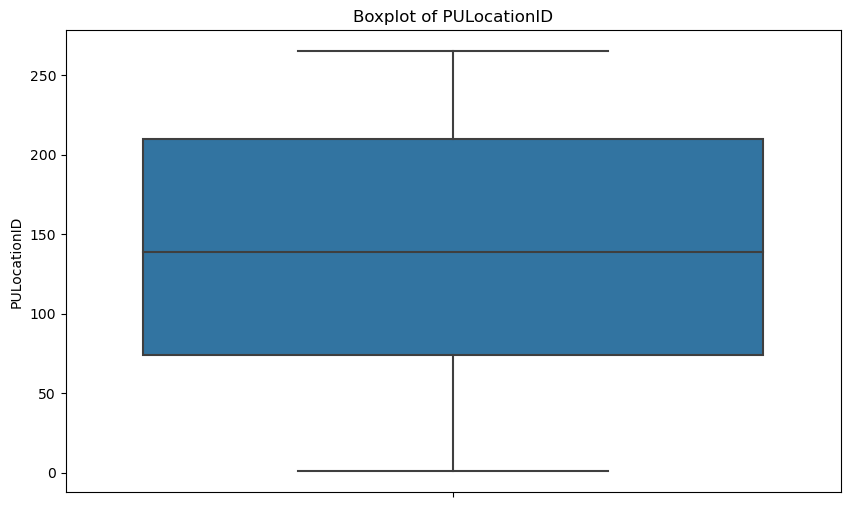

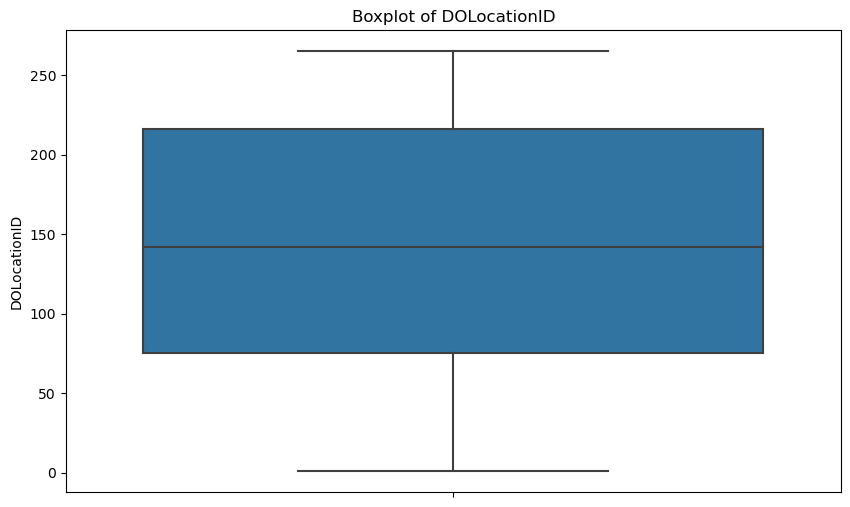

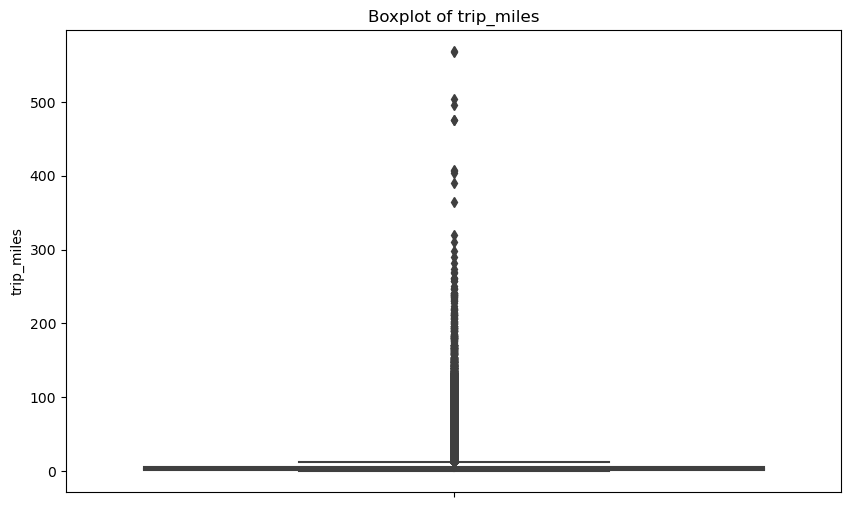

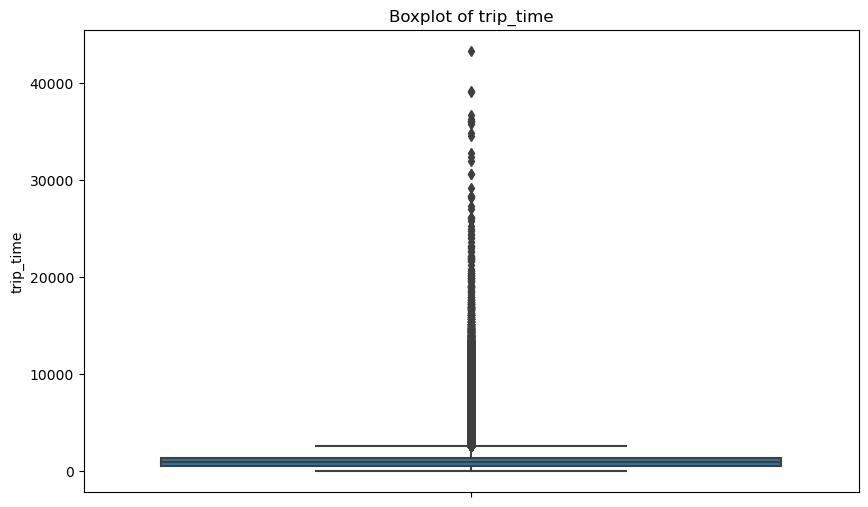

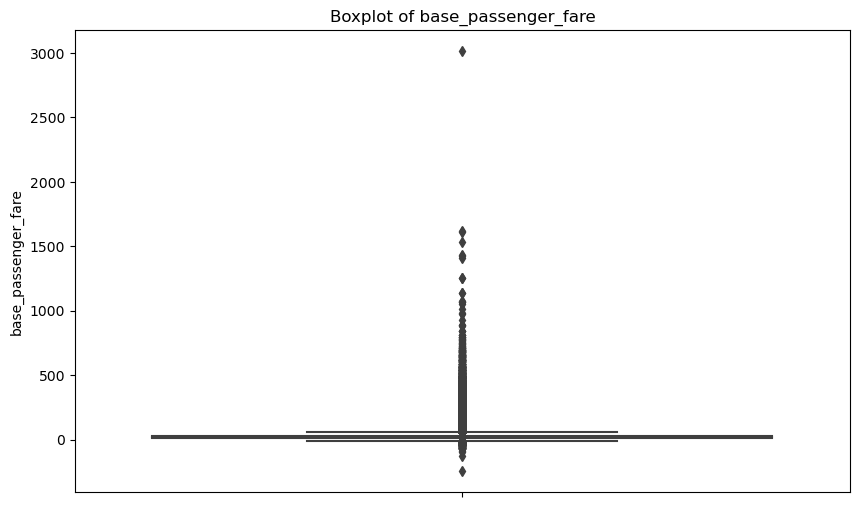

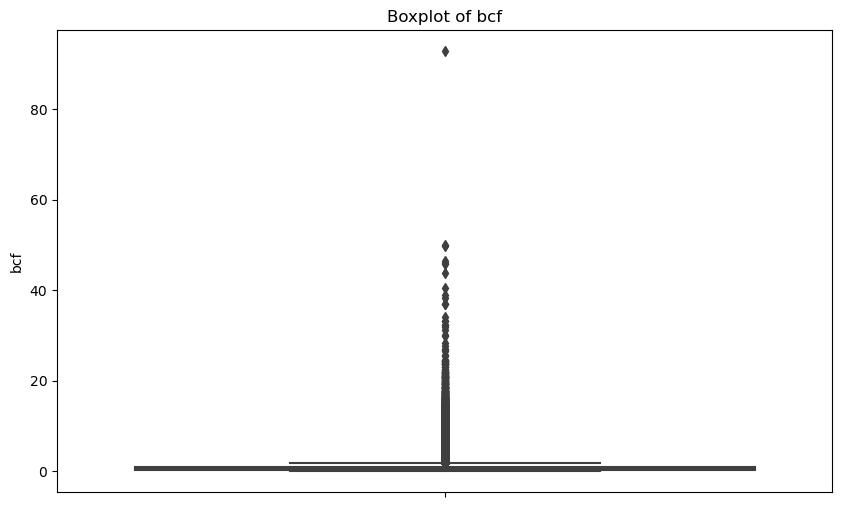

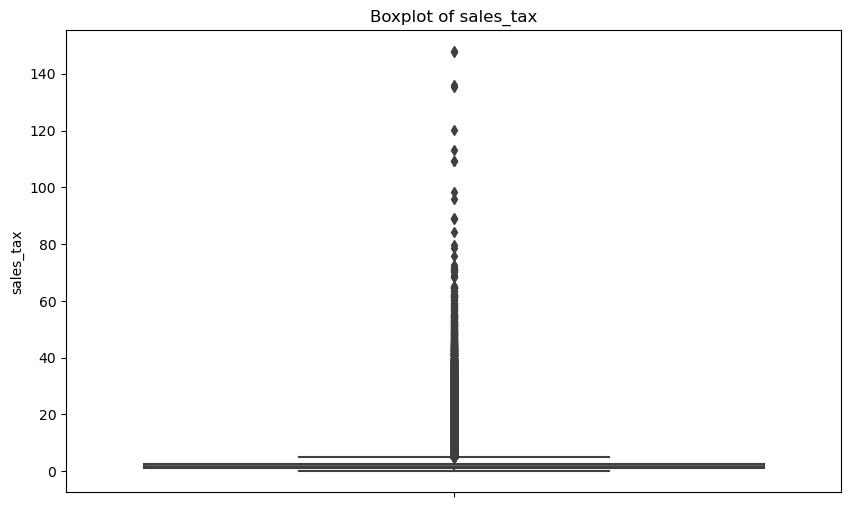

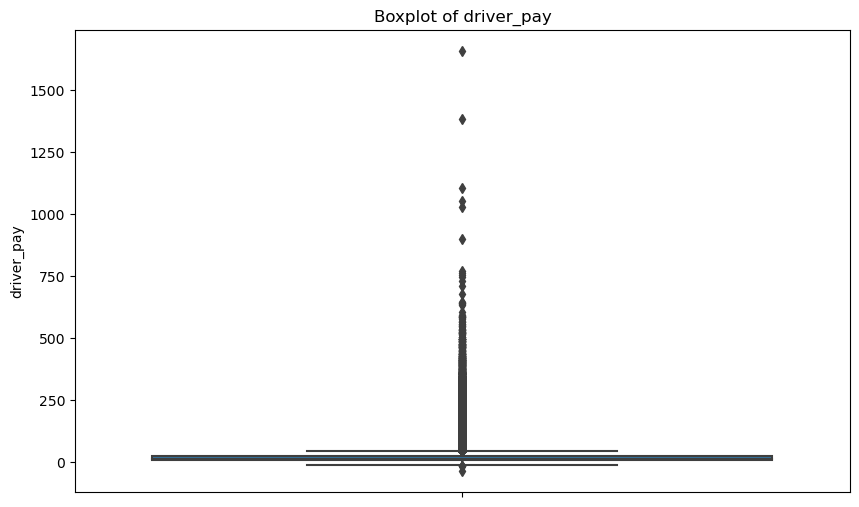

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in your dataset
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

# Plot each column in a separate figure for better visibility
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set a large size for each individual box plot
    sns.boxplot(y=jul_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 32, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


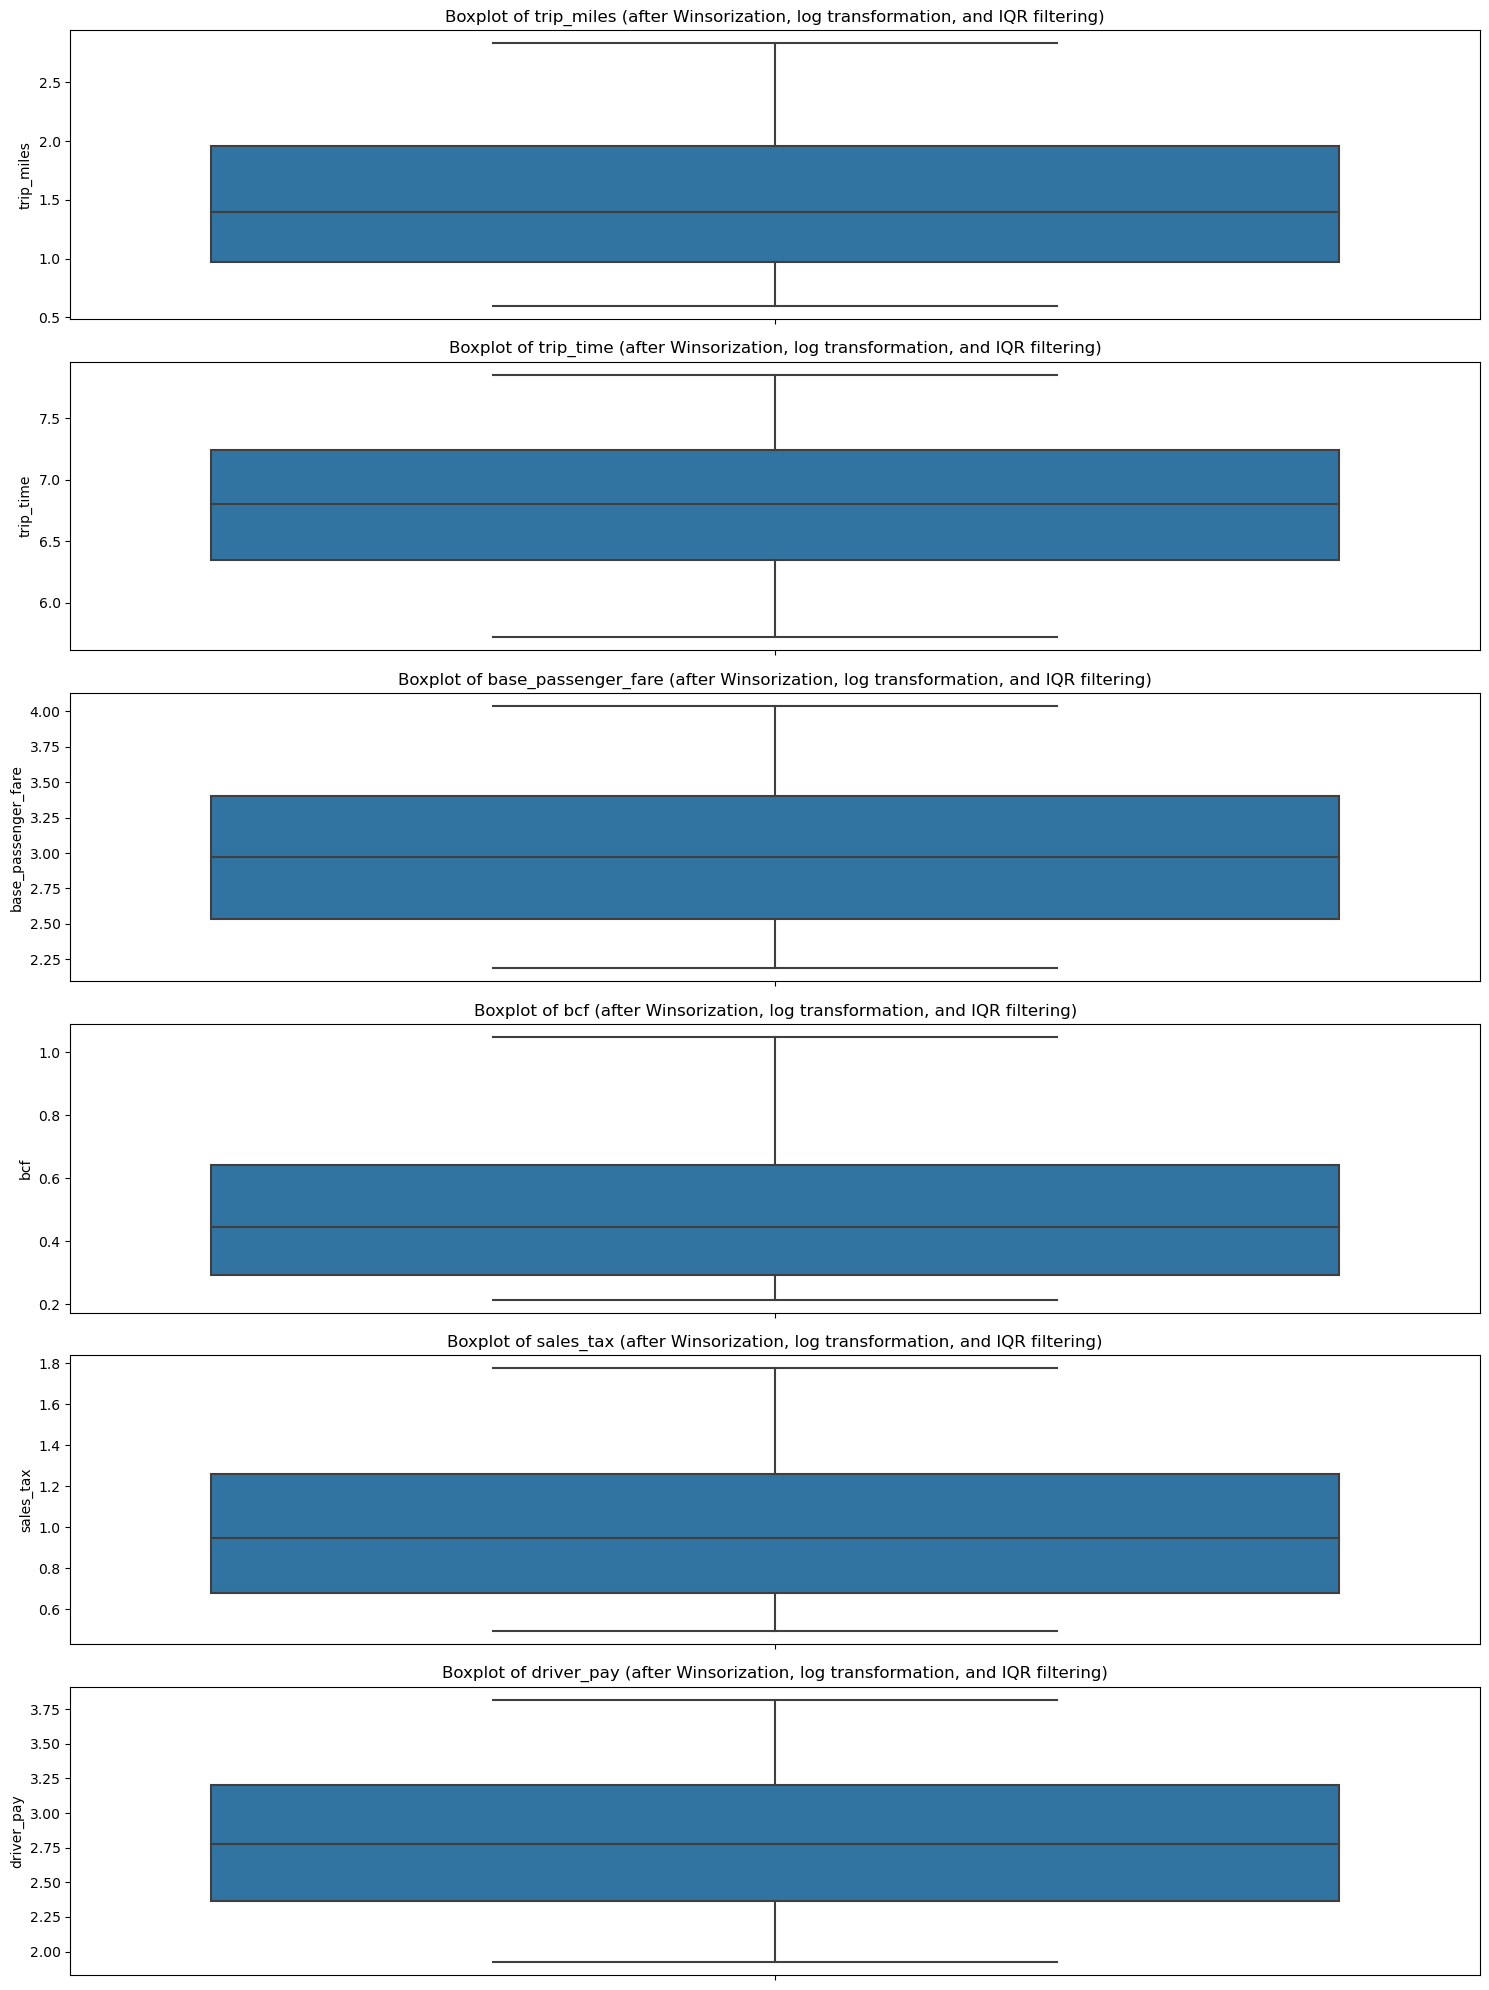

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to process
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']

# Step 1: Apply Winsorization to cap extreme values at 5th and 95th percentiles
# Using a transformed copy to avoid overwriting the original data
jul_new = jul_filtered.copy()
for column in columns_to_process:
    jul_new[column] = winsorize(jul_new[column], limits=[0.05, 0.05])  # Cap at 5th and 95th percentiles

# Step 2: Apply log transformation to compress the range and reduce skewness
for column in columns_to_process:
    jul_new[column] = np.log1p(jul_new[column])  # log1p(x) handles zero values

# Step 3: Remove outliers using the IQR method after log transformation
for column in columns_to_process:
    Q1 = jul_new[column].quantile(0.25)
    Q3 = jul_new[column].quantile(0.75)
    IQR = Q3 - Q1
    jul_new = jul_new[(jul_new[column] >= (Q1 - 1.5 * IQR)) & (jul_new[column] <= (Q3 + 1.5 * IQR))]

# Step 4: Plot boxplots for each column after Winsorization, log transformation, and IQR filtering
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=jul_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

In [28]:
# Define the emission factor (e.g., 404 grams of CO₂ per mile for a typical gasoline vehicle)
emission_factor = 404  # grams of CO₂ per mile

# Create 'estimated_emissions' column
jul_new['estimated_emissions'] = jul_new['trip_miles'] * emission_factor

# Define a threshold for categorizing emissions as "High" or "Low"
emission_threshold = 3000  # grams of CO₂

# Create 'emission_levels' column based on the threshold
jul_new['emission_levels'] = jul_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(jul_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 33, Finished, Available, Finished)

   trip_miles  estimated_emissions  emission_levels
0    0.828552           334.734934                0
1    0.871293           352.002520                0
2    1.360977           549.834527                0
3    1.808289           730.548664                0
4    1.553925           627.785782                0


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 34, Finished, Available, Finished)

/tmp/ipykernel_22305/2580548634.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = jul_new.corr()


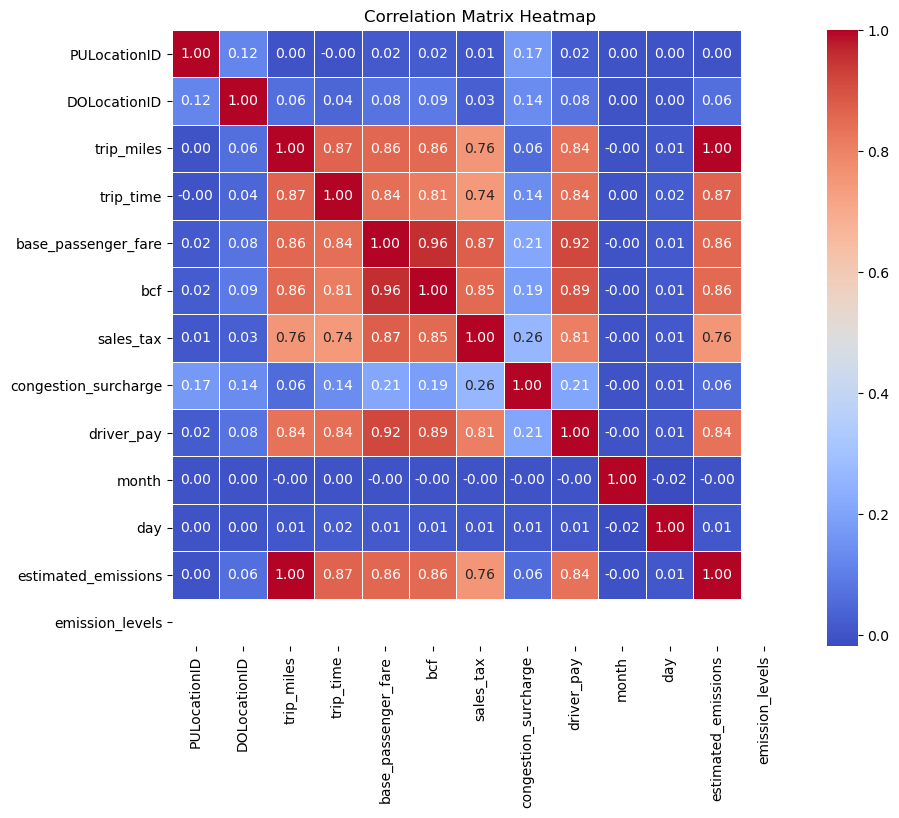

In [29]:


import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = jul_new.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [30]:

jul_new.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 35, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10704358 entries, 0 to 15027173
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             float64
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
 18  estimated_emissions   float64
 19  emission_levels       int64  
dtypes: float64(8), int64(5), object(7)
memory usage: 1.7+ GB


In [31]:
jul_new['dispatching_base_num'].head()
base_counts = jul_new['dispatching_base_num'].value_counts()
print(base_counts)
top_10_bases = jul_new['dispatching_base_num'].value_counts().head(10).index
jul_new = jul_new[jul_new['dispatching_base_num'].isin(top_10_bases)]
jul_new.shape
jul_new.head()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 36, Finished, Available, Finished)

B02764    1375055
B02872    1138785
B02875     971118
B02765     698469
B02869     538148
B02866     481722
B02887     401580
B02682     390468
B02871     366149
B02864     357096
B02878     346474
B02884     317189
B02617     315852
B02883     309996
B02882     293755
B02876     275203
B02835     258175
B02879     253713
B02877     249030
B02888     236502
B02867     230476
B02889     187408
B02836     173787
B02880     158410
B02395     122556
B02870     120533
B02865     101454
B02512      35255
Name: dispatching_base_num, dtype: int64


dispatching_base_num originating_base_num request_datetime  \
0               B02875               B02875         00:04:14   
1               B02875               B02875         00:18:00   
4               B02764               B02764         00:11:13   
5               B02764               B02764         00:34:18   
6               B02875               B02875         00:01:56   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:09:24        00:10:28         00:17:53            82   
1          00:29:04        00:30:11         00:36:37            82   
4          00:14:34        00:14:45         00:31:36           188   
5          00:37:34        00:38:07         00:59:06            39   
6          00:05:24        00:07:24         00:11:32            85   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           157    0.828552   6.100319             2.187174  0.215111   
1            95    0.871293   5.958425             2.187174  0.215111   
4            39    1.553925   6.919684             2.981633  0.444686   
5           133    1.763017   7.138867             3.149740  0.512824   
6            85    0.741937   5.723585             2.198335  0.215111   

   sales_tax  congestion_surcharge  driver_pay        date  month  day  \
0   0.530628                   0.0    2.100469  07-01-2021      7    1   
1   0.530628                   0.0    2.099244  07-01-2021      7    1   
4   0.978326                   0.0    2.708717  07-01-2021      7    1   
5   1.091923                   0.0    2.906901  07-01-2021      7    1   
6   0.536493                   0.0    2.028148  07-01-2021      7    1   

   estimated_emissions  emission_levels  
0           334.734934                0  
1           352.002520                0  
4           627.785782                0  
5           712.258868                0  
6           299.742687                0

In [32]:
# Save jul_new to a new DataFrame called jul_df
jul_df = jul_new.copy()

# Display the shape and first few rows of jul_df to verify
print("Shape of jul_df:", jul_df.shape)
print(jul_df.head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 37, Finished, Available, Finished)

Shape of jul_df: (6718590, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B02875               B02875         00:04:14   
1               B02875               B02875         00:18:00   
4               B02764               B02764         00:11:13   
5               B02764               B02764         00:34:18   
6               B02875               B02875         00:01:56   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:09:24        00:10:28         00:17:53            82   
1          00:29:04        00:30:11         00:36:37            82   
4          00:14:34        00:14:45         00:31:36           188   
5          00:37:34        00:38:07         00:59:06            39   
6          00:05:24        00:07:24         00:11:32            85   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           157    0.828552   6.100319             2.187174  0.215111   
1            95  

In [33]:
jul_df.to_parquet("Users/akumar63/jul2021_df.parquet", engine='pyarrow')

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 161, 38, Finished, Available, Finished)

--- End of 2021-07-hvFHV.ipynb ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 6, Finished, Available, Finished)

In [2]:
aug = pd.read_parquet("Users/akumar63/2021 data/fhvhv_tripdata_2021-08.parquet")
print(aug.head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 7, Finished, Available, Finished)

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B02884               B02884   
1            HV0003               B02884               B02884   
2            HV0003               B02764               B02764   
3            HV0003               B02764               B02764   
4            HV0003               B02875               B02875   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-08-01 00:16:22 2021-08-01 00:25:19 2021-08-01 00:26:41   
1 2021-08-01 00:45:32 2021-08-01 00:53:47 2021-08-01 00:54:24   
2 2021-08-01 00:12:00 2021-08-01 00:12:42 2021-08-01 00:14:35   
3 2021-08-01 00:22:04 2021-08-01 00:33:30 2021-08-01 00:33:33   
4 2021-07-31 23:51:54 2021-07-31 23:59:45 2021-08-01 00:01:58   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-08-01 00:48:17            76           197        6.51  ...       3.14   
1 2021-08-01 01:12:02           102             7       

In [3]:
aug.shape

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 8, Finished, Available, Finished)

(14499696, 24)

In [4]:
# Check for null values in the data
null_counts = aug.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 9, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4298397
request_datetime              0
on_scene_datetime       4297569
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64


In [5]:
unique_license_nums = aug['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 10, Finished, Available, Finished)

Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005' 'HV0004']


In [6]:
hv0004_count = aug[aug['hvfhs_license_num'] == 'HV0004'].shape[0]
print("Number of entries with 'HV0004' in 'hvfhs_license_num':", hv0004_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 11, Finished, Available, Finished)

Number of entries with 'HV0004' in 'hvfhs_license_num': 93709


In [7]:
hv0003_count = aug[aug['hvfhs_license_num'] == 'HV0003'].shape[0]
print("Number of entries with 'HV0003' in 'hvfhs_license_num':", hv0003_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 12, Finished, Available, Finished)

Number of entries with 'HV0003' in 'hvfhs_license_num': 10196747


In [8]:
hv0005_count = aug[aug['hvfhs_license_num'] == 'HV0005'].shape[0]
print("Number of entries with 'HV0005' in 'hvfhs_license_num':", hv0005_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 13, Finished, Available, Finished)

Number of entries with 'HV0005' in 'hvfhs_license_num': 4209240


In [9]:
aug_filtered = aug[~aug['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 14, Finished, Available, Finished)

In [10]:
aug_filtered = aug_filtered.drop(columns=['airport_fee'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 15, Finished, Available, Finished)

In [11]:
null_counts = aug_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 16, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num         0
dispatching_base_num      0
originating_base_num    828
request_datetime          0
on_scene_datetime         0
pickup_datetime           0
dropoff_datetime          0
PULocationID              0
DOLocationID              0
trip_miles                0
trip_time                 0
base_passenger_fare       0
tolls                     0
bcf                       0
sales_tax                 0
congestion_surcharge      0
tips                      0
driver_pay                0
shared_request_flag       0
shared_match_flag         0
access_a_ride_flag        0
wav_request_flag          0
wav_match_flag            0
dtype: int64


In [12]:

aug_filtered.shape
aug_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 17, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10196747 entries, 0 to 14499695
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  tips                  float64       
 17  driver_pay            float64       
 18  shared_request_flag   object        
 19

In [13]:
aug_filtered = aug_filtered.drop(columns=['hvfhs_license_num'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 18, Finished, Available, Finished)

In [14]:
aug_filtered['date'] = aug_filtered['request_datetime'].dt.date
aug_filtered['date'].tail(15)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 19, Finished, Available, Finished)

14499681    2021-08-31
14499682    2021-08-31
14499683    2021-08-31
14499684    2021-08-31
14499685    2021-08-31
14499686    2021-08-31
14499687    2021-08-31
14499688    2021-08-31
14499689    2021-08-31
14499690    2021-08-31
14499691    2021-08-31
14499692    2021-08-31
14499693    2021-08-31
14499694    2021-08-31
14499695    2021-08-31
Name: date, dtype: object

In [15]:
import pandas as pd

# Step 1: Extract the date part from 'request_datetime' in mm-dd-yyyy format
aug_filtered['date'] = pd.to_datetime(aug_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Step 2: Remove the date part from the original datetime columns, leaving only the time
aug_filtered['request_datetime'] = pd.to_datetime(aug_filtered['request_datetime']).dt.time
aug_filtered['on_scene_datetime'] = pd.to_datetime(aug_filtered['on_scene_datetime']).dt.time
aug_filtered['pickup_datetime'] = pd.to_datetime(aug_filtered['pickup_datetime']).dt.time
aug_filtered['dropoff_datetime'] = pd.to_datetime(aug_filtered['dropoff_datetime']).dt.time

# Step 3: Extract month and day from the 'date' column
aug_filtered['month'] = pd.to_datetime(aug_filtered['date']).dt.month
aug_filtered['day'] = pd.to_datetime(aug_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(aug_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(aug_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 20, Finished, Available, Finished)

Current format of 'date' column:
0    08-01-2021
1    08-01-2021
2    08-01-2021
3    08-01-2021
4    07-31-2021
Name: date, dtype: object

Updated DataFrame:
         date  month  day request_datetime on_scene_datetime pickup_datetime  \
0  08-01-2021      8    1         00:16:22          00:25:19        00:26:41   
1  08-01-2021      8    1         00:45:32          00:53:47        00:54:24   
2  08-01-2021      8    1         00:12:00          00:12:42        00:14:35   
3  08-01-2021      8    1         00:22:04          00:33:30        00:33:33   
4  07-31-2021      7   31         23:51:54          23:59:45        00:01:58   

  dropoff_datetime  
0         00:48:17  
1         01:12:02  
2         00:21:19  
3         00:47:33  
4         00:15:22  


In [16]:

# Get unique values in the 'month' column and count them
unique_months = aug_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", aug_filtered['month'].unique())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 21, Finished, Available, Finished)


Number of unique months: 3
Unique month values: [8 7 9]


In [17]:
# Filter rows where the month is either 12 or 2
months_12_2 = aug_filtered[aug_filtered['month'].isin([12, 2])]

# Display the rows where the month is 12 or 2
print("Rows where the month is either December (12) or February (2):")
print(months_12_2)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 22, Finished, Available, Finished)

Rows where the month is either December (12) or February (2):
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, tolls, bcf, sales_tax, congestion_surcharge, tips, driver_pay, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag, date, month, day]
Index: []

[0 rows x 25 columns]


In [18]:
# Drop multiple columns
aug_filtered = aug_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips','tolls'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 23, Finished, Available, Finished)

In [19]:

aug_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 24, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10196747 entries, 0 to 14499695
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             int64  
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
dtypes: float64(6), int64(5), object(7)
memory usage: 1.4+ GB


In [20]:
duplicate_count = aug_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
aug_filtered = aug_filtered.drop_duplicates()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 25, Finished, Available, Finished)

Number of duplicate rows: 0


In [21]:

aug_filtered['dispatching_base_num'].nunique()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 26, Finished, Available, Finished)

28

In [22]:
# Define the columns to check for duplicates
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = aug_filtered[aug_filtered.duplicated(subset=duplicate_columns, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 27, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 0
Duplicate rows based on specified columns:
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, bcf, sales_tax, congestion_surcharge, driver_pay, date, month, day]
Index: []


In [23]:
aug_filtered = aug_filtered.drop_duplicates(subset=duplicate_columns)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(aug_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 28, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10196747, 18)


In [24]:
# Define the columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = aug_filtered[aug_filtered.duplicated(subset=duplicate_column, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 29, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 6
Duplicate rows based on specified columns:
         dispatching_base_num originating_base_num request_datetime  \
5114185                B02882               B02882         00:25:49   
5881362                B02765               B02765         15:56:25   
8121905                B02875               B02875         09:17:35   
8579315                B02872               B02872         09:16:43   
9979801                B02617               B02617         00:16:54   
10950964               B02872               B02872         15:55:28   

         on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
5114185           00:29:08        00:29:46         00:36:37            71   
5881362           16:00:00        16:00:07         16:10:31           129   
8121905           09:22:45        09:22:56         09:27:21            42   
8579315           09:22:51        09:22:56         09:27:21            42   
9979801           0

In [25]:
aug_filtered = aug_filtered.drop_duplicates(subset=duplicate_column)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(aug_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 30, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10196744, 18)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 31, Finished, Available, Finished)

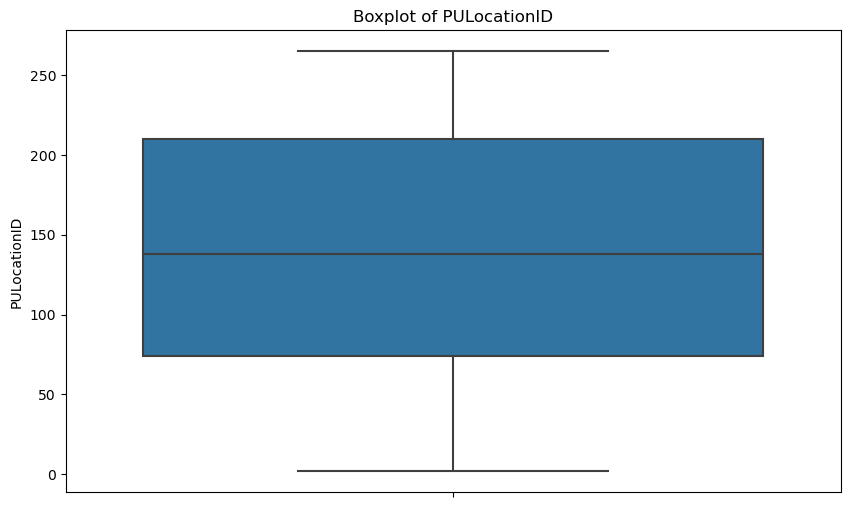

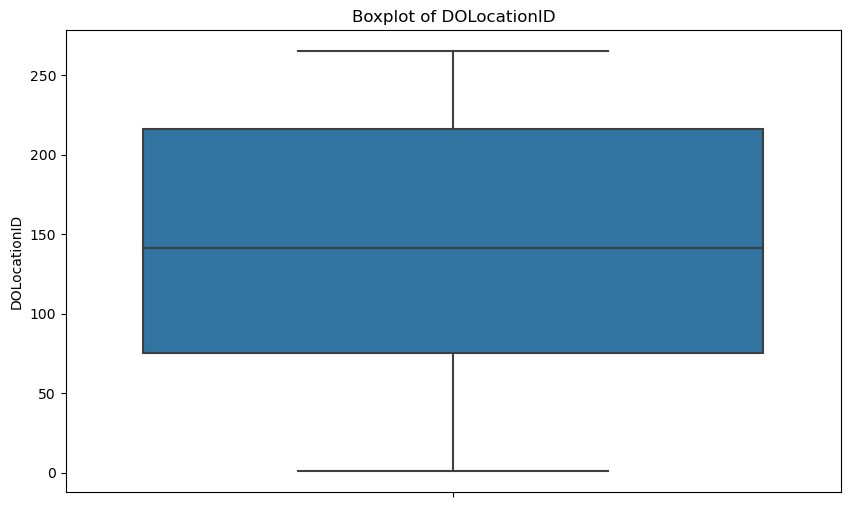

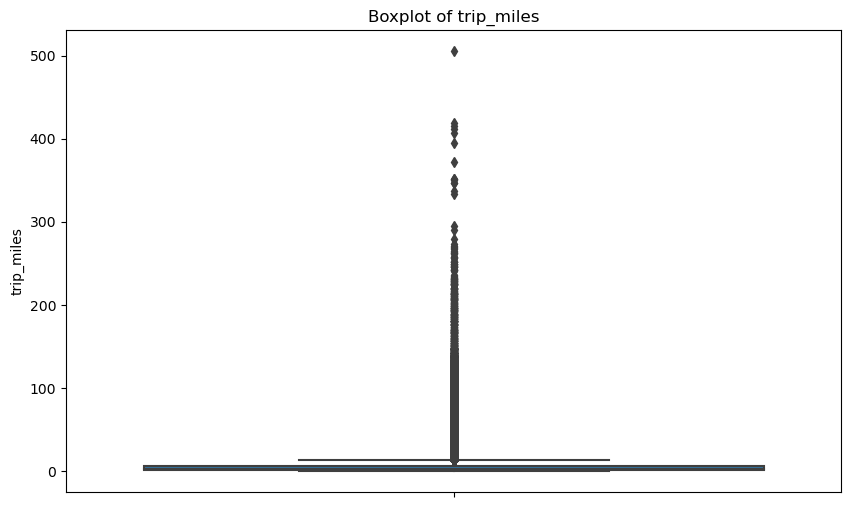

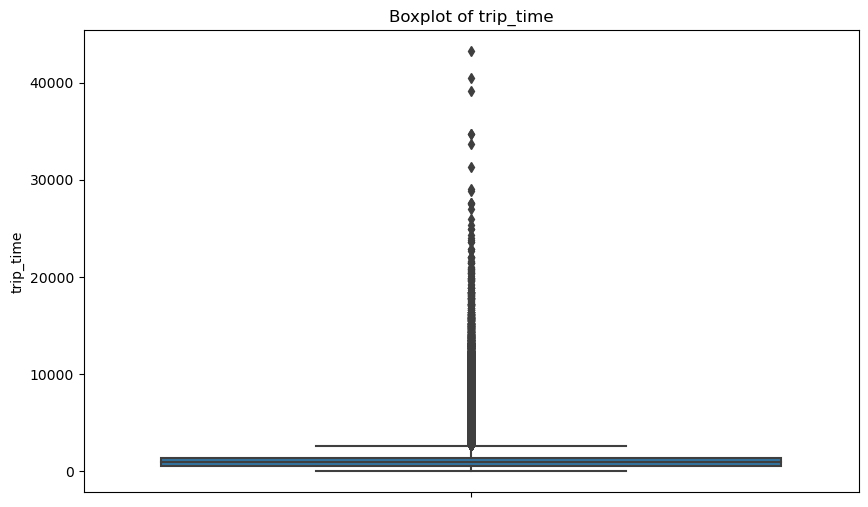

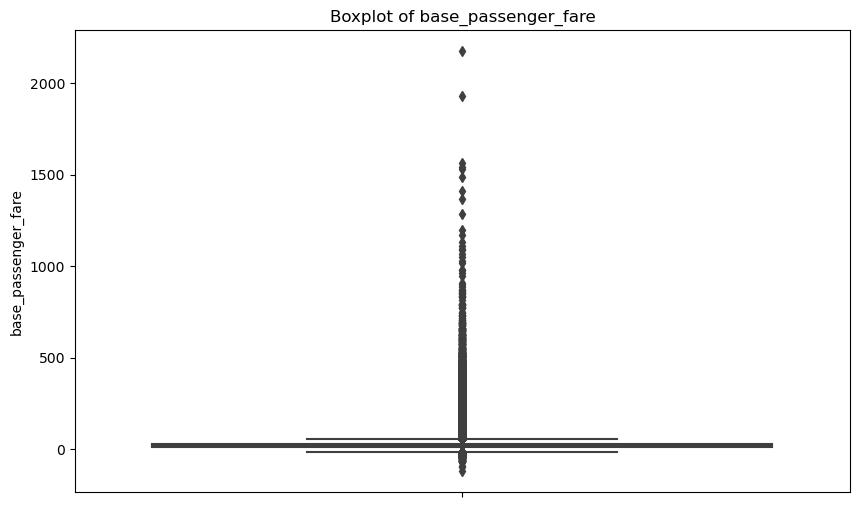

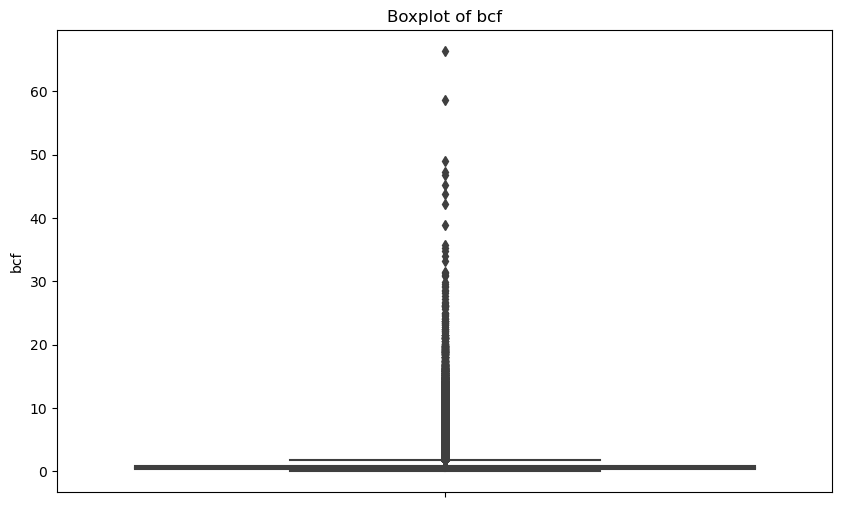

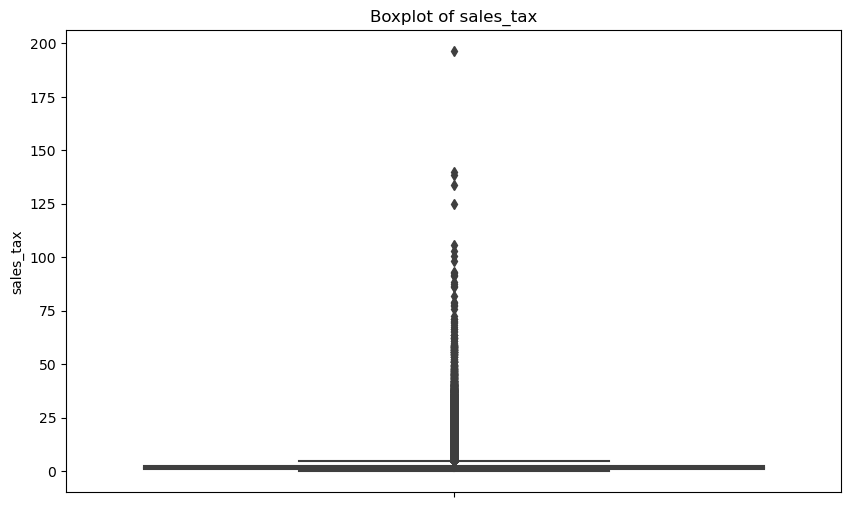

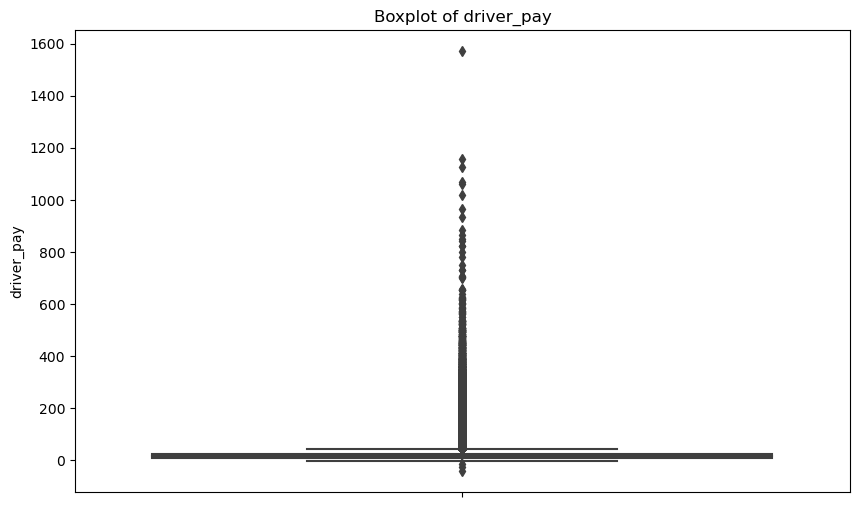

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in your dataset
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

# Plot each column in a separate figure for better visibility
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set a large size for each individual box plot
    sns.boxplot(y=aug_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 32, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


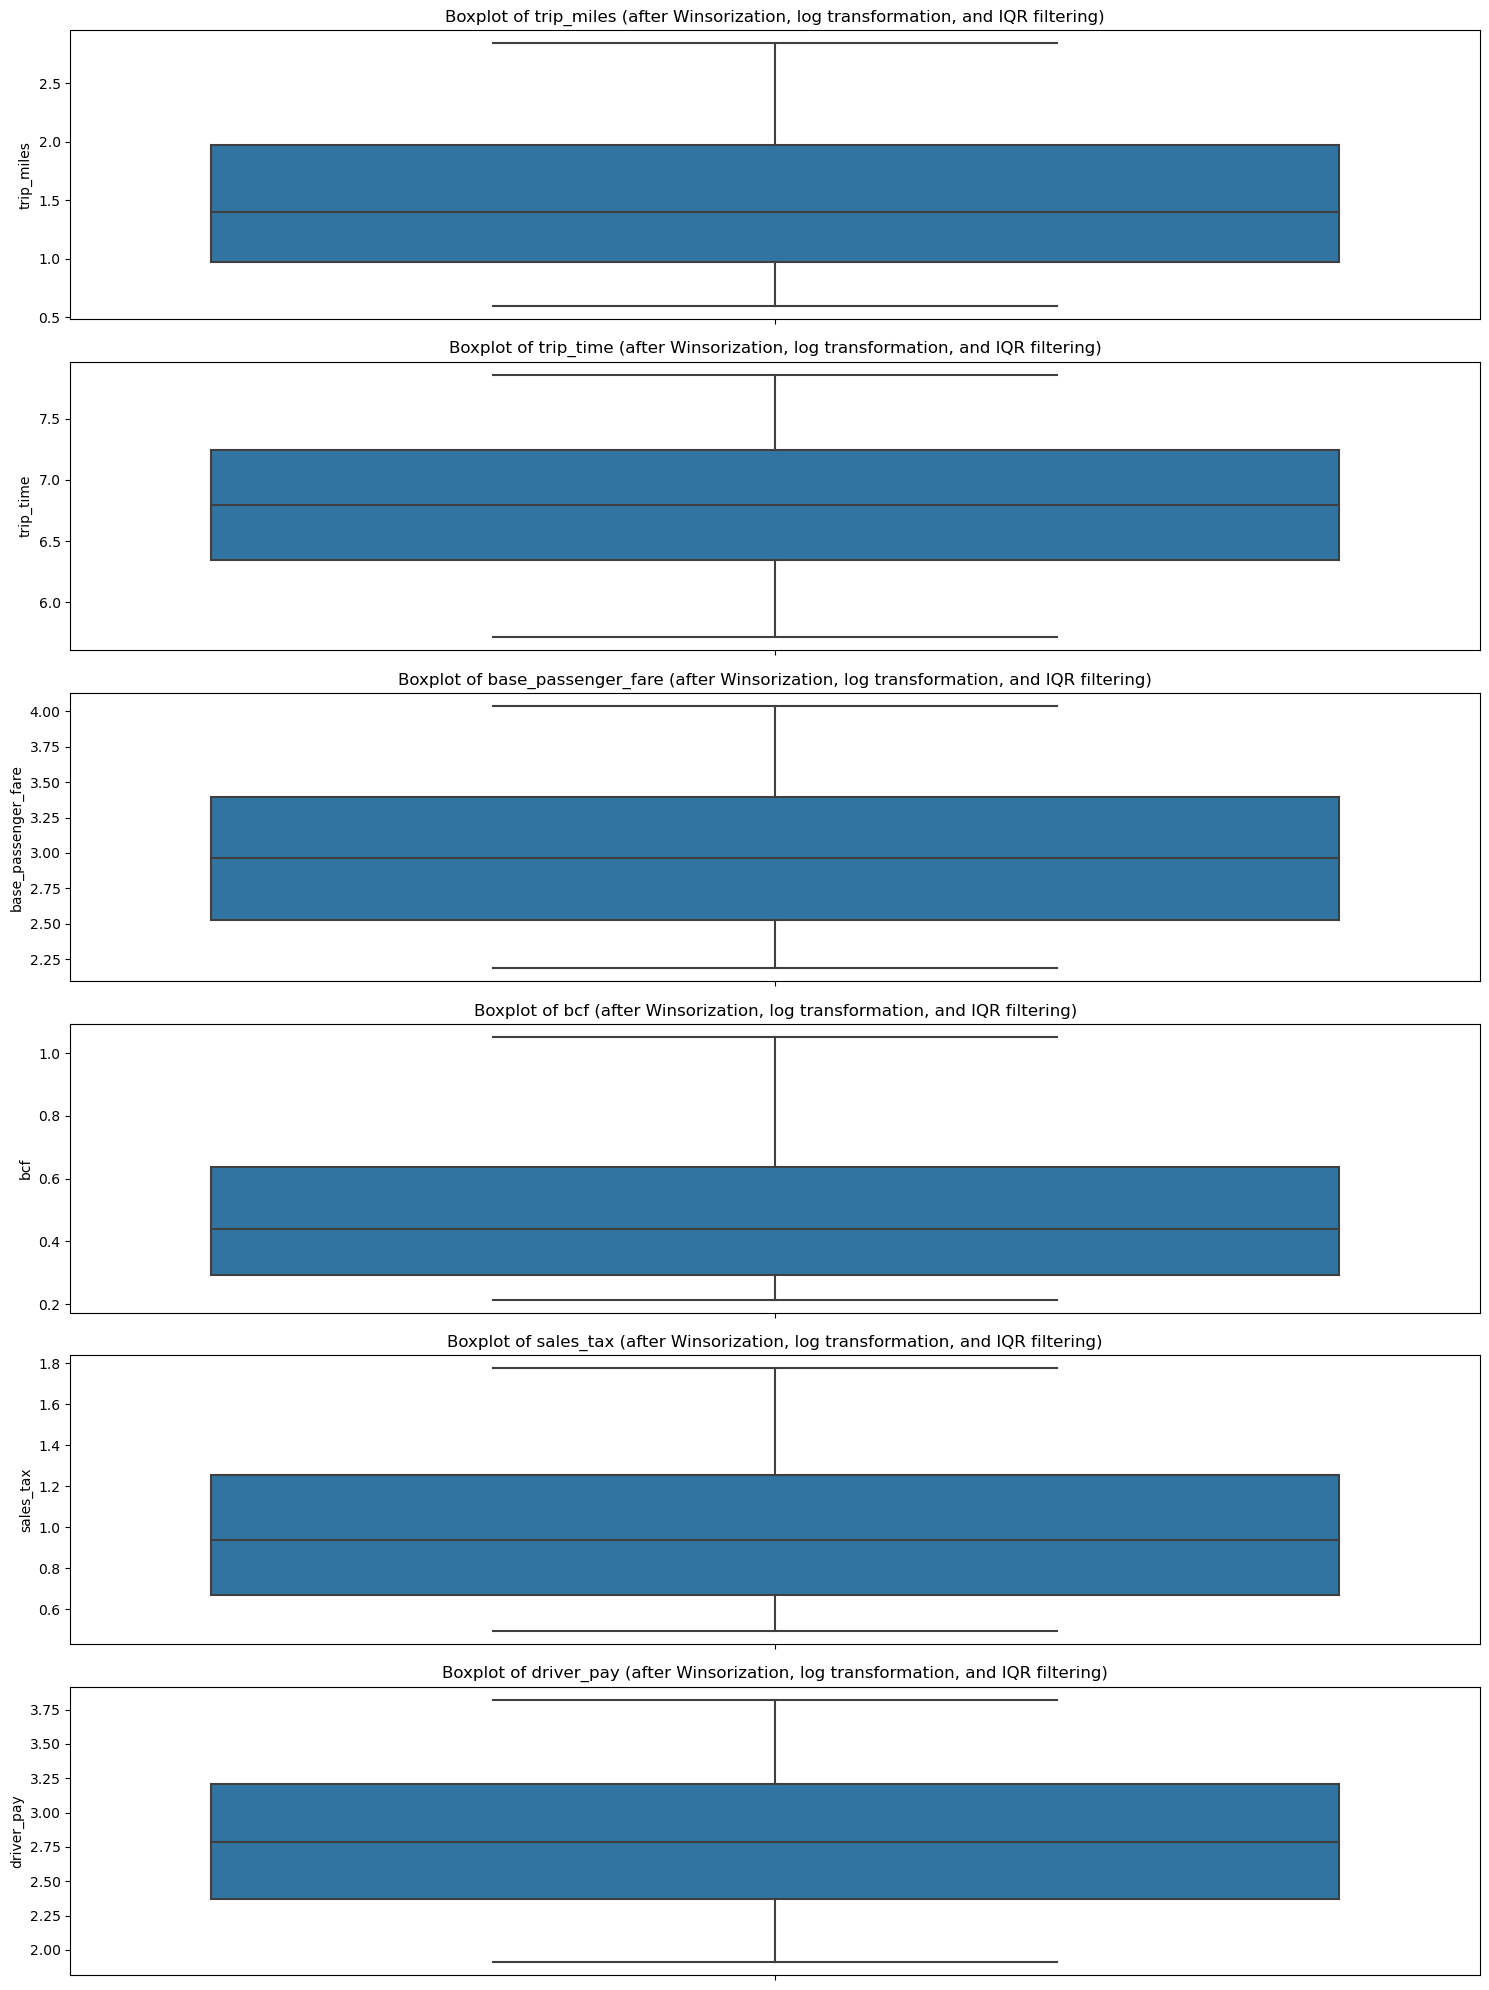

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to process
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']

# Step 1: Apply Winsorization to cap extreme values at 5th and 95th percentiles
# Using a transformed copy to avoid overwriting the original data
aug_new = aug_filtered.copy()
for column in columns_to_process:
    aug_new[column] = winsorize(aug_new[column], limits=[0.05, 0.05])  # Cap at 5th and 95th percentiles

# Step 2: Apply log transformation to compress the range and reduce skewness
for column in columns_to_process:
    aug_new[column] = np.log1p(aug_new[column])  # log1p(x) handles zero values

# Step 3: Remove outliers using the IQR method after log transformation
for column in columns_to_process:
    Q1 = aug_new[column].quantile(0.25)
    Q3 = aug_new[column].quantile(0.75)
    IQR = Q3 - Q1
    aug_new = aug_new[(aug_new[column] >= (Q1 - 1.5 * IQR)) & (aug_new[column] <= (Q3 + 1.5 * IQR))]

# Step 4: Plot boxplots for each column after Winsorization, log transformation, and IQR filtering
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=aug_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

In [28]:
# Define the emission factor (e.g., 404 grams of CO₂ per mile for a typical gasoline vehicle)
emission_factor = 404  # grams of CO₂ per mile

# Create 'estimated_emissions' column
aug_new['estimated_emissions'] = aug_new['trip_miles'] * emission_factor

# Define a threshold for categorizing emissions as "High" or "Low"
emission_threshold = 3000  # grams of CO₂

# Create 'emission_levels' column based on the threshold
aug_new['emission_levels'] = aug_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(aug_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 163, 33, Submitted, Running, Running)

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = aug_new.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


StatementMeta(, , , Waiting, , Waiting)

In [ ]:
aug_new.info()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
aug_new['dispatching_base_num'].head()
base_counts = aug_new['dispatching_base_num'].value_counts()
print(base_counts)
top_10_bases = aug_new['dispatching_base_num'].value_counts().head(10).index
aug_new = aug_new[aug_new['dispatching_base_num'].isin(top_10_bases)]
aug_new.shape
aug_new.head()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
# Save aug_new to a new DataFrame called aug_df
aug_df = aug_new.copy()

# Display the shape and first few rows of aug_df to verify
print("Shape of aug_df:", aug_df.shape)
print(aug_df.head())

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
aug_df.to_parquet("Users/akumar63/aug2021_df.parquet", engine='pyarrow')


StatementMeta(, , , Waiting, , Waiting)

--- End of 2021-08-hvFHV.ipynb ---

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 8, Finished, Available, Finished)

In [4]:

sep = pd.read_parquet("Users/akumar63/2021 data/fhvhv_tripdata_2021-09.parquet")
print(sep.head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 9, Finished, Available, Finished)

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B02764               B02764   
1            HV0003               B02875               B02875   
2            HV0003               B02875               B02875   
3            HV0003               B02764               B02764   
4            HV0003               B02764               B02764   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-09-01 00:21:12 2021-09-01 00:29:52 2021-09-01 00:31:14   
1 2021-09-01 00:00:50 2021-09-01 00:05:45 2021-09-01 00:07:45   
2 2021-09-01 00:23:53 2021-09-01 00:28:01 2021-09-01 00:28:25   
3 2021-09-01 00:14:31 2021-09-01 00:18:20 2021-09-01 00:22:52   
4 2021-09-01 00:28:39 2021-09-01 00:33:27 2021-09-01 00:34:54   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-09-01 01:08:25           211           108       14.93  ...       7.98   
1 2021-09-01 00:13:47           157           198       

In [5]:
sep.shape

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 10, Finished, Available, Finished)

(14886055, 24)

In [6]:
# Check for null values in the data
null_counts = sep.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 11, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4324360
request_datetime              0
on_scene_datetime       4323265
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64


In [7]:
unique_license_nums = sep['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 12, Finished, Available, Finished)

Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005' 'HV0004']


In [8]:

hv0004_count = sep[sep['hvfhs_license_num'] == 'HV0004'].shape[0]
print("Number of entries with 'HV0004' in 'hvfhs_license_num':", hv0004_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 13, Finished, Available, Finished)

Number of entries with 'HV0004' in 'hvfhs_license_num': 88132


In [9]:

hv0003_count = sep[sep['hvfhs_license_num'] == 'HV0003'].shape[0]
print("Number of entries with 'HV0003' in 'hvfhs_license_num':", hv0003_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 14, Finished, Available, Finished)

Number of entries with 'HV0003' in 'hvfhs_license_num': 10557442


In [10]:
hv0005_count = sep[sep['hvfhs_license_num'] == 'HV0005'].shape[0]
print("Number of entries with 'HV0005' in 'hvfhs_license_num':", hv0005_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 15, Finished, Available, Finished)

Number of entries with 'HV0005' in 'hvfhs_license_num': 4240481


In [11]:
sep_filtered = sep[~sep['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 16, Finished, Available, Finished)

In [12]:
sep_filtered = sep_filtered.drop(columns=['airport_fee'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 17, Finished, Available, Finished)

In [13]:
null_counts = sep_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 18, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num          0
dispatching_base_num       0
originating_base_num    1095
request_datetime           0
on_scene_datetime          0
pickup_datetime            0
dropoff_datetime           0
PULocationID               0
DOLocationID               0
trip_miles                 0
trip_time                  0
base_passenger_fare        0
tolls                      0
bcf                        0
sales_tax                  0
congestion_surcharge       0
tips                       0
driver_pay                 0
shared_request_flag        0
shared_match_flag          0
access_a_ride_flag         0
wav_request_flag           0
wav_match_flag             0
dtype: int64


In [14]:

sep_filtered.shape
sep_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 19, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10557442 entries, 0 to 14886054
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  tips                  float64       
 17  driver_pay            float64       
 18  shared_request_flag   object        
 19

In [15]:
sep_filtered = sep_filtered.drop(columns=['hvfhs_license_num'])


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 20, Finished, Available, Finished)

In [16]:
sep_filtered['date'] = sep_filtered['request_datetime'].dt.date
sep_filtered['date'].tail(15)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 21, Finished, Available, Finished)

14886038    2021-09-30
14886039    2021-09-30
14886041    2021-09-30
14886043    2021-09-30
14886044    2021-09-30
14886045    2021-09-30
14886046    2021-09-30
14886047    2021-09-30
14886048    2021-09-30
14886049    2021-09-30
14886050    2021-09-30
14886051    2021-09-30
14886052    2021-09-30
14886053    2021-09-30
14886054    2021-09-30
Name: date, dtype: object

In [17]:
import pandas as pd

# Step 1: Extract the date part from 'request_datetime' in mm-dd-yyyy format
sep_filtered['date'] = pd.to_datetime(sep_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Step 2: Remove the date part from the original datetime columns, leaving only the time
sep_filtered['request_datetime'] = pd.to_datetime(sep_filtered['request_datetime']).dt.time
sep_filtered['on_scene_datetime'] = pd.to_datetime(sep_filtered['on_scene_datetime']).dt.time
sep_filtered['pickup_datetime'] = pd.to_datetime(sep_filtered['pickup_datetime']).dt.time
sep_filtered['dropoff_datetime'] = pd.to_datetime(sep_filtered['dropoff_datetime']).dt.time

# Step 3: Extract month and day from the 'date' column
sep_filtered['month'] = pd.to_datetime(sep_filtered['date']).dt.month
sep_filtered['day'] = pd.to_datetime(sep_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(sep_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(sep_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 22, Finished, Available, Finished)

Current format of 'date' column:
0    09-01-2021
1    09-01-2021
2    09-01-2021
3    09-01-2021
4    09-01-2021
Name: date, dtype: object

Updated DataFrame:
         date  month  day request_datetime on_scene_datetime pickup_datetime  \
0  09-01-2021      9    1         00:21:12          00:29:52        00:31:14   
1  09-01-2021      9    1         00:00:50          00:05:45        00:07:45   
2  09-01-2021      9    1         00:23:53          00:28:01        00:28:25   
3  09-01-2021      9    1         00:14:31          00:18:20        00:22:52   
4  09-01-2021      9    1         00:28:39          00:33:27        00:34:54   

  dropoff_datetime  
0         01:08:25  
1         00:13:47  
2         00:49:38  
3         00:29:57  
4         00:37:08  


In [18]:
# Get unique values in the 'month' column and count them
unique_months = sep_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", sep_filtered['month'].unique())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 23, Finished, Available, Finished)


Number of unique months: 3
Unique month values: [ 9  8 10]


In [19]:
# Filter rows where the month is either 12 or 2
months_12_2 = sep_filtered[sep_filtered['month'].isin([12, 2])]

# Display the rows where the month is 12 or 2
print("Rows where the month is either December (12) or February (2):")
print(months_12_2)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 24, Finished, Available, Finished)

Rows where the month is either December (12) or February (2):
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, tolls, bcf, sales_tax, congestion_surcharge, tips, driver_pay, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag, date, month, day]
Index: []

[0 rows x 25 columns]


In [20]:
# Drop multiple columns
sep_filtered = sep_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips','tolls'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 25, Finished, Available, Finished)

In [21]:
sep_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 26, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10557442 entries, 0 to 14886054
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             int64  
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
dtypes: float64(6), int64(5), object(7)
memory usage: 1.5+ GB


In [22]:
duplicate_count = sep_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
sep_filtered = sep_filtered.drop_duplicates()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 27, Finished, Available, Finished)

Number of duplicate rows: 0


In [23]:
sep_filtered['dispatching_base_num'].nunique()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 28, Finished, Available, Finished)

28

In [24]:
# Define the columns to check for duplicates
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = sep_filtered[sep_filtered.duplicated(subset=duplicate_columns, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 29, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 0
Duplicate rows based on specified columns:
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, bcf, sales_tax, congestion_surcharge, driver_pay, date, month, day]
Index: []


In [25]:
sep_filtered = sep_filtered.drop_duplicates(subset=duplicate_columns)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(sep_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 30, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10557442, 18)


In [26]:
# Define the columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = sep_filtered[sep_filtered.duplicated(subset=duplicate_column, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 31, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 10
Duplicate rows based on specified columns:
         dispatching_base_num originating_base_num request_datetime  \
57934                  B02888               B02888         06:00:48   
540149                 B02765               B02765         06:00:56   
2328422                B02875               B02875         14:58:37   
2735581                B02765               B02765         14:04:03   
3580582                B02764               B02764         15:01:09   
3864577                B02867               B02867         07:14:27   
7456078                B02395               B02395         07:14:35   
9761259                B02764               B02764         14:06:13   
11435603               B02875               B02875         04:38:53   
13534620               B02765               B02765         04:37:27   

         on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
57934             06:05:31        06:05:50

In [27]:
sep_filtered = sep_filtered.drop_duplicates(subset=duplicate_column)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(sep_filtered.shape)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 32, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(10557437, 18)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 33, Finished, Available, Finished)

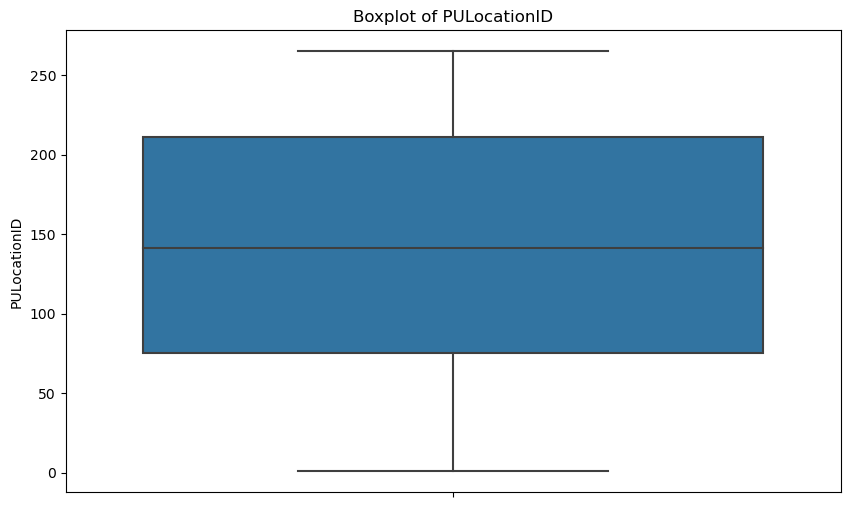

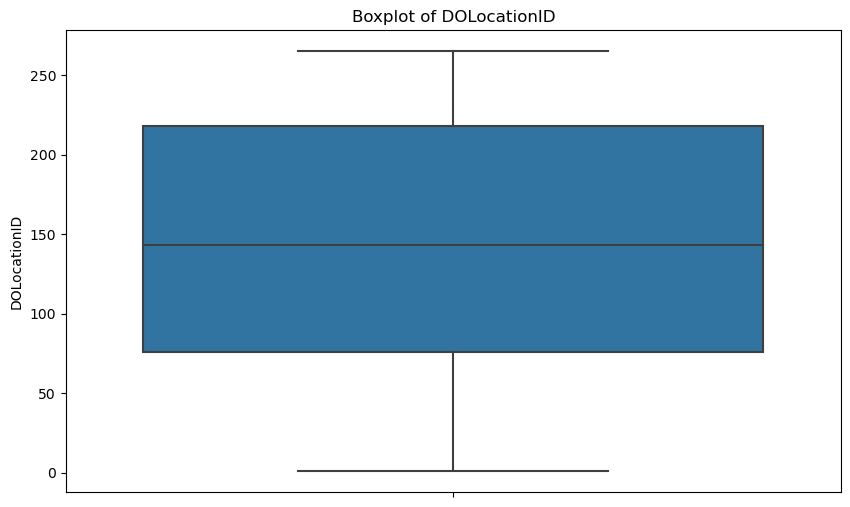

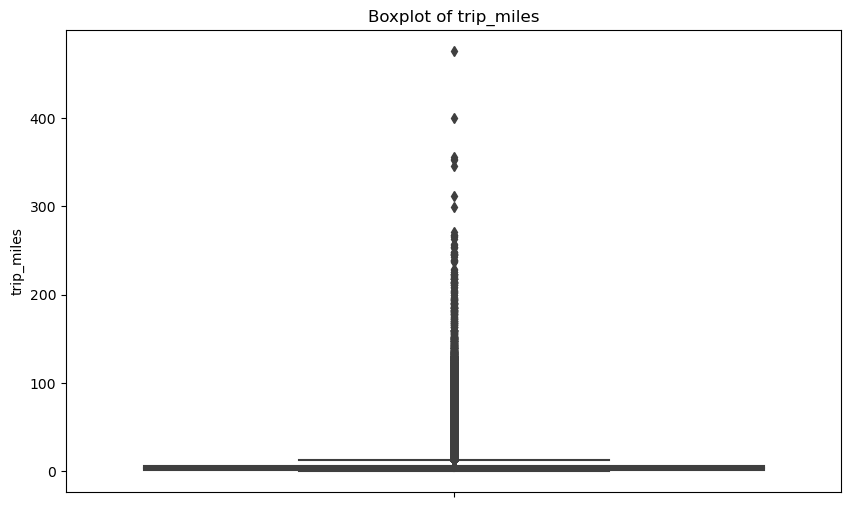

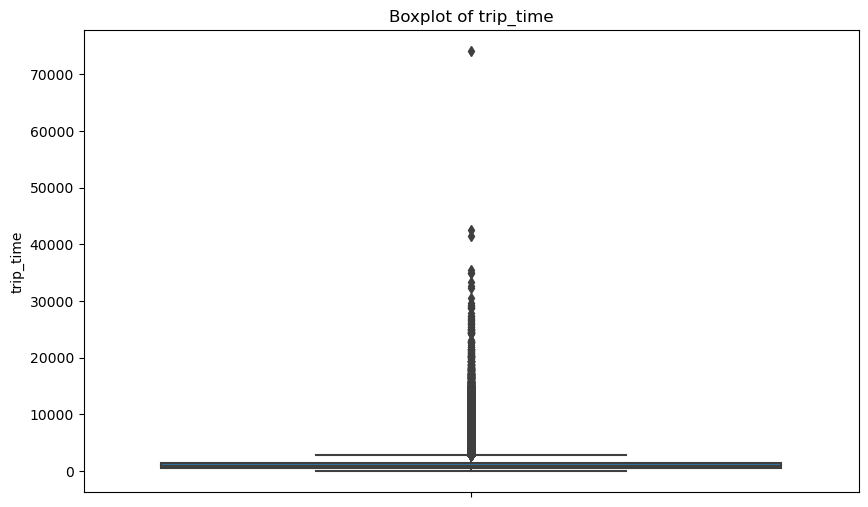

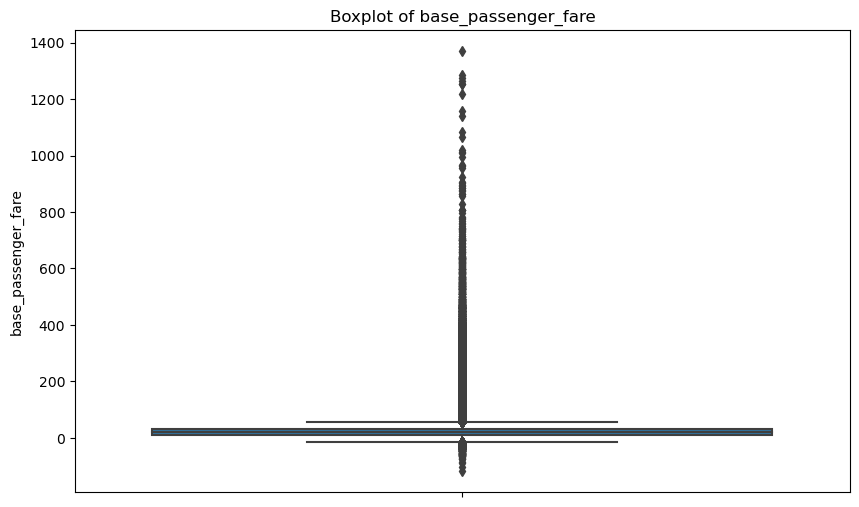

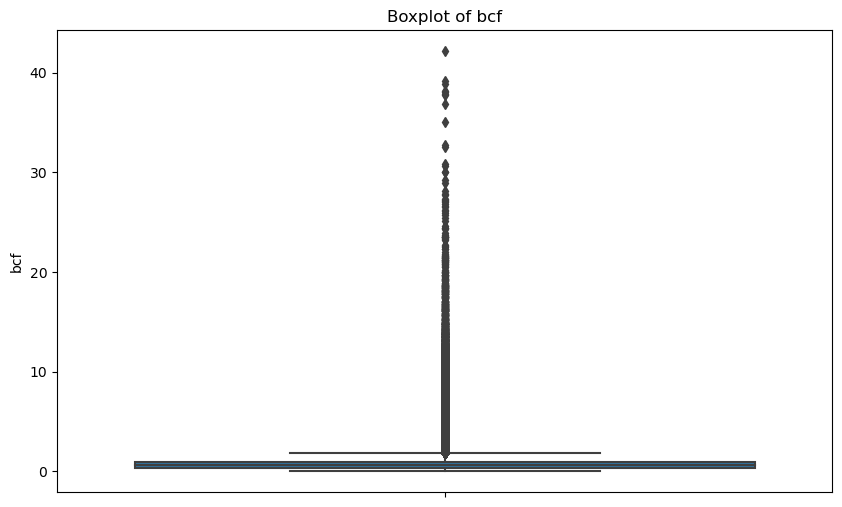

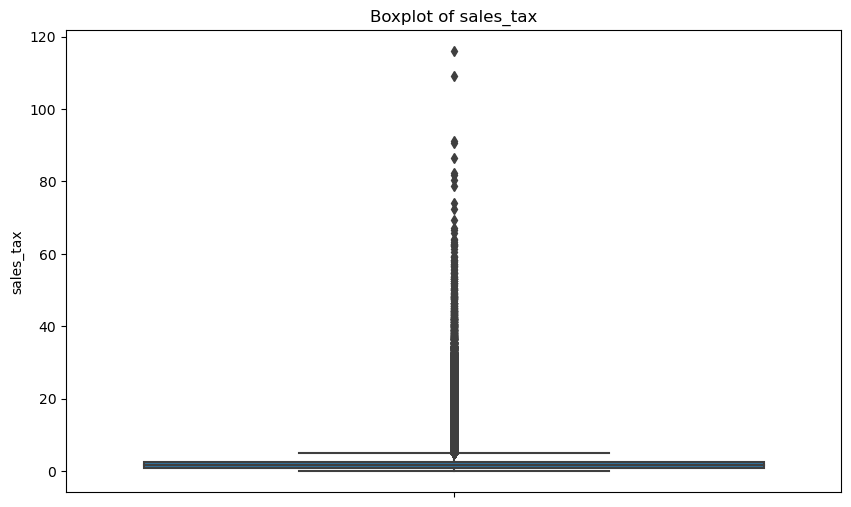

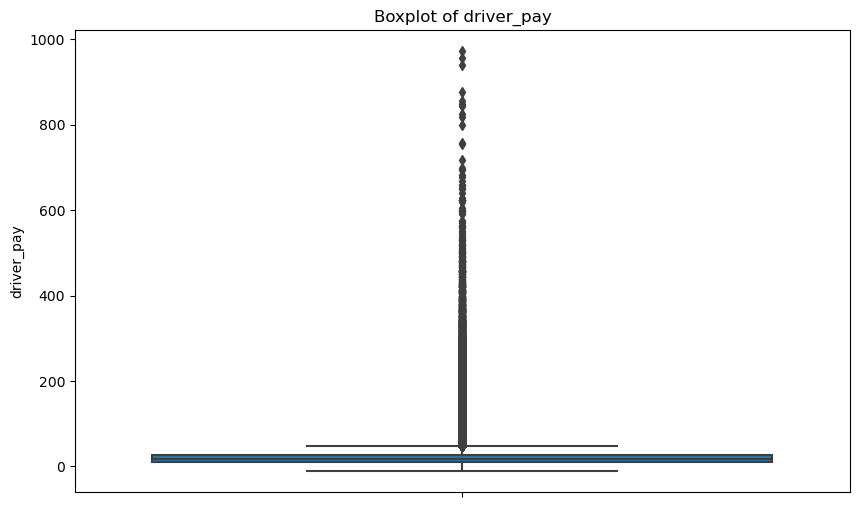

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in your dataset
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

# Plot each column in a separate figure for better visibility
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set a large size for each individual box plot
    sns.boxplot(y=sep_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 34, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


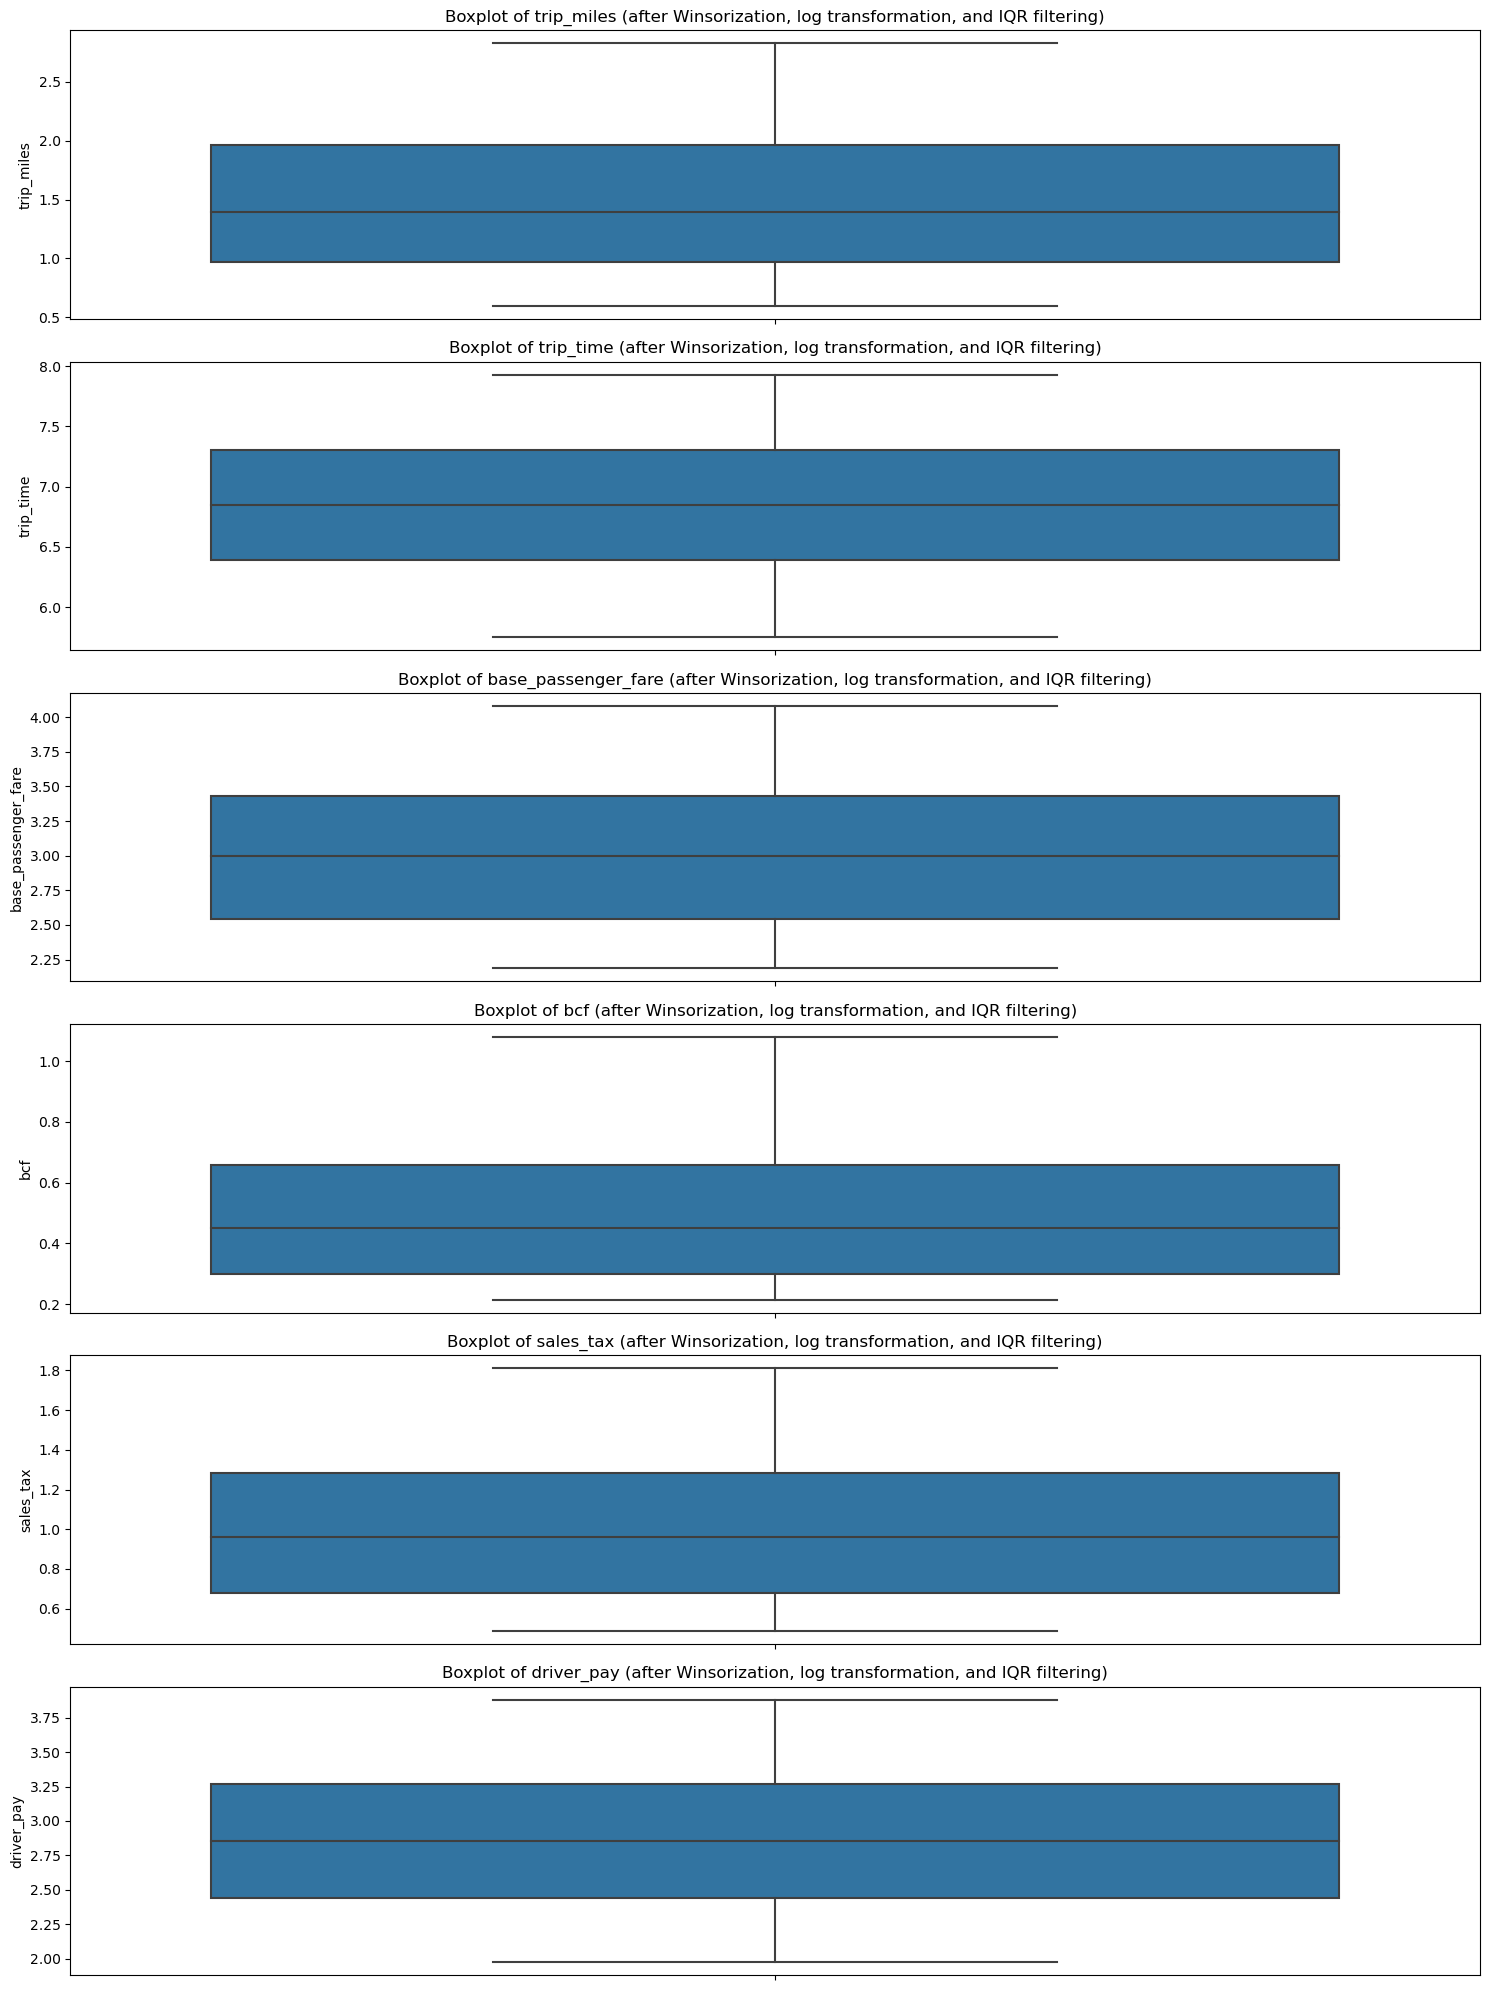

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to process
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']

# Step 1: Apply Winsorization to cap extreme values at 5th and 95th percentiles
# Using a transformed copy to avoid overwriting the original data
sep_new = sep_filtered.copy()
for column in columns_to_process:
    sep_new[column] = winsorize(sep_new[column], limits=[0.05, 0.05])  # Cap at 5th and 95th percentiles

# Step 2: Apply log transformation to compress the range and reduce skewness
for column in columns_to_process:
    sep_new[column] = np.log1p(sep_new[column])  # log1p(x) handles zero values

# Step 3: Remove outliers using the IQR method after log transformation
for column in columns_to_process:
    Q1 = sep_new[column].quantile(0.25)
    Q3 = sep_new[column].quantile(0.75)
    IQR = Q3 - Q1
    sep_new = sep_new[(sep_new[column] >= (Q1 - 1.5 * IQR)) & (sep_new[column] <= (Q3 + 1.5 * IQR))]

# Step 4: Plot boxplots for each column after Winsorization, log transformation, and IQR filtering
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=sep_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

In [30]:

# Define the emission factor (e.g., 404 grams of CO₂ per mile for a typical gasoline vehicle)
emission_factor = 404  # grams of CO₂ per mile

# Create 'estimated_emissions' column
sep_new['estimated_emissions'] = sep_new['trip_miles'] * emission_factor

# Define a threshold for categorizing emissions as "High" or "Low"
emission_threshold = 3000  # grams of CO₂

# Create 'emission_levels' column based on the threshold
sep_new['emission_levels'] = sep_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(sep_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 35, Finished, Available, Finished)

   trip_miles  estimated_emissions  emission_levels
0    2.768204          1118.354466                0
1    0.783902           316.696224                0
2    2.644755          1068.481162                0
3    0.912283           368.562215                0
4    0.598837           241.929946                0


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 36, Finished, Available, Finished)

/tmp/ipykernel_7409/2764286804.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sep_new.corr()


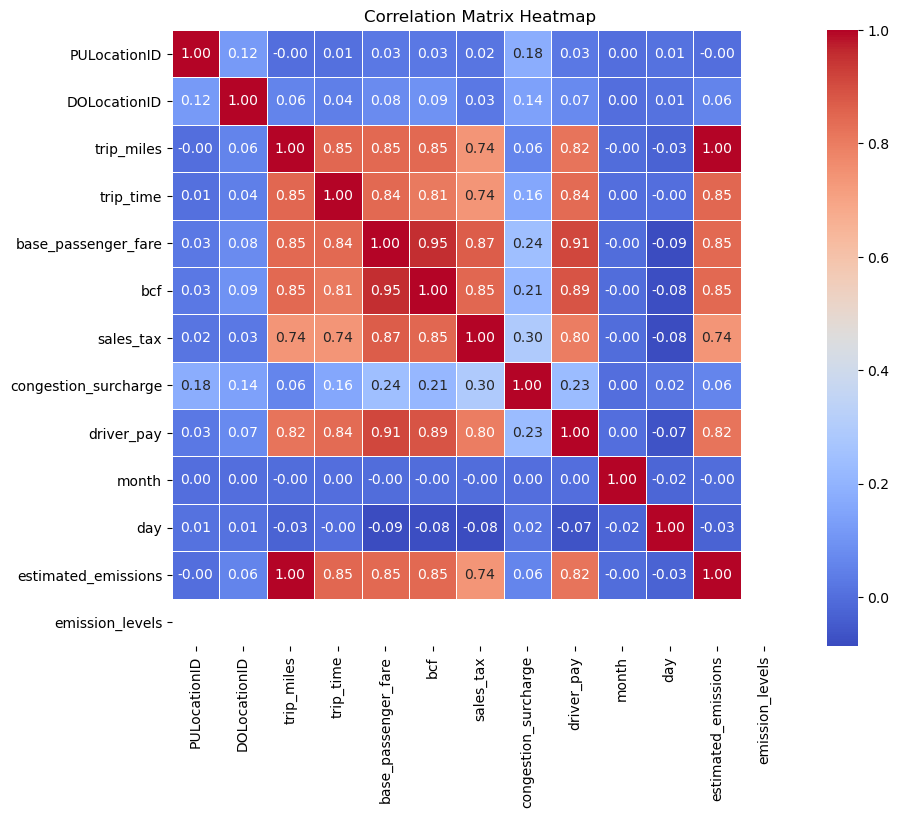

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = sep_new.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [32]:

sep_new.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 37, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10557437 entries, 0 to 14886054
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             float64
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
 18  estimated_emissions   float64
 19  emission_levels       int64  
dtypes: float64(8), int64(5), object(7)
memory usage: 1.7+ GB


In [33]:
sep_new['dispatching_base_num'].head()
base_counts = sep_new['dispatching_base_num'].value_counts()
print(base_counts)
top_10_bases = sep_new['dispatching_base_num'].value_counts().head(10).index
sep_new = sep_new[sep_new['dispatching_base_num'].isin(top_10_bases)]
sep_new.shape
sep_new.head()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 38, Finished, Available, Finished)

B02764    1456800
B02872    1107678
B02875     932699
B02765     660815
B02866     527630
B02869     509649
B02682     396889
B02887     377401
B02871     360074
B02878     349249
B02864     345195
B02617     316888
B02884     308256
B02883     292174
B02882     282080
B02876     266926
B02879     245531
B02877     244102
B02835     242975
B02888     234618
B02867     227657
B02889     177231
B02836     155918
B02880     154681
B02395     140447
B02870     118130
B02865      91960
B02512      33784
Name: dispatching_base_num, dtype: int64


dispatching_base_num originating_base_num request_datetime  \
0               B02764               B02764         00:21:12   
1               B02875               B02875         00:00:50   
2               B02875               B02875         00:23:53   
3               B02764               B02764         00:14:31   
4               B02764               B02764         00:28:39   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:29:52        00:31:14         01:08:25           211   
1          00:05:45        00:07:45         00:13:47           157   
2          00:28:01        00:28:25         00:49:38            80   
3          00:18:20        00:22:52         00:29:57           161   
4          00:33:27        00:34:54         00:37:08           236   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           108    2.768204   7.710653             4.080922  1.078410   
1           198    0.783902   5.894403             2.274186  0.231112   
2           191    2.644755   7.149917             3.905804  0.900161   
3           141    0.912283   6.054439             2.987700  0.451076   
4           141    0.598837   5.752573             2.534490  0.300105   

   sales_tax  congestion_surcharge  driver_pay        date  month  day  \
0   1.809927                  2.75    3.879706  09-01-2021      9    1   
1   0.570980                  0.00    1.976855  09-01-2021      9    1   
2   1.671473                  0.00    3.395515  09-01-2021      9    1   
3   0.982078                  2.75    2.806386  09-01-2021      9    1   
4   0.708036                  2.75    2.457021  09-01-2021      9    1   

   estimated_emissions  emission_levels  
0          1118.354466                0  
1           316.696224                0  
2          1068.481162                0  
3           368.562215                0  
4           241.929946                0

In [34]:

sep_df = sep_new.copy()


print("Shape of sep_df:", sep_df.shape)
print(sep_df.head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 39, Finished, Available, Finished)

Shape of sep_df: (6678884, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B02764               B02764         00:21:12   
1               B02875               B02875         00:00:50   
2               B02875               B02875         00:23:53   
3               B02764               B02764         00:14:31   
4               B02764               B02764         00:28:39   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:29:52        00:31:14         01:08:25           211   
1          00:05:45        00:07:45         00:13:47           157   
2          00:28:01        00:28:25         00:49:38            80   
3          00:18:20        00:22:52         00:29:57           161   
4          00:33:27        00:34:54         00:37:08           236   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0           108    2.768204   7.710653             4.080922  1.078410   
1           198  

In [35]:
sep_df.to_parquet("Users/akumar63/sep2021_df.parquet", engine='pyarrow')


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 164, 40, Finished, Available, Finished)

--- End of 2021-09-hvFHV.ipynb ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 6, Finished, Available, Finished)

In [2]:
oct = pd.read_parquet("Users/akumar63/2021 data/fhvhv_tripdata_2021-10.parquet")
print(oct.head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 7, Finished, Available, Finished)

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B02764               B02764   
1            HV0005               B03406                 None   
2            HV0003               B02864               B02864   
3            HV0003               B02835               B02835   
4            HV0003               B02835               B02835   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-10-01 00:28:52 2021-10-01 00:32:58 2021-10-01 00:33:31   
1 2021-10-01 00:55:47                 NaT 2021-10-01 00:59:17   
2 2021-10-01 00:28:02 2021-10-01 00:30:36 2021-10-01 00:38:49   
3 2021-10-01 00:15:17 2021-10-01 00:22:13 2021-10-01 00:23:25   
4 2021-10-01 00:30:53 2021-10-01 00:36:25 2021-10-01 00:38:26   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-10-01 01:07:51            68            85      12.790  ...       3.15   
1 2021-10-01 01:22:14            48           265       

In [3]:

oct.shape

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 8, Finished, Available, Finished)

(16545356, 24)

In [4]:
# Check for null values in the data
null_counts = oct.isnull().sum()
print("Null values in each column:")
print(null_counts)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 9, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4454316
request_datetime              0
on_scene_datetime       4453702
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64


In [5]:
unique_license_nums = oct['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 10, Finished, Available, Finished)

Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005' 'HV0004']


In [6]:

hv0004_count = oct[oct['hvfhs_license_num'] == 'HV0004'].shape[0]
print("Number of entries with 'HV0004' in 'hvfhs_license_num':", hv0004_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 11, Finished, Available, Finished)

Number of entries with 'HV0004' in 'hvfhs_license_num': 29401


In [7]:
hv0003_count = oct[oct['hvfhs_license_num'] == 'HV0003'].shape[0]
print("Number of entries with 'HV0003' in 'hvfhs_license_num':", hv0003_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 12, Finished, Available, Finished)

Number of entries with 'HV0003' in 'hvfhs_license_num': 12086389


In [8]:

hv0005_count = oct[oct['hvfhs_license_num'] == 'HV0005'].shape[0]
print("Number of entries with 'HV0005' in 'hvfhs_license_num':", hv0005_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 13, Finished, Available, Finished)

Number of entries with 'HV0005' in 'hvfhs_license_num': 4429566


In [9]:
oct_filtered = oct[~oct['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 14, Finished, Available, Finished)

In [10]:
oct_filtered = oct_filtered.drop(columns=['airport_fee'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 15, Finished, Available, Finished)

In [11]:
null_counts = oct_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 16, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num         0
dispatching_base_num      0
originating_base_num    614
request_datetime          0
on_scene_datetime         0
pickup_datetime           0
dropoff_datetime          0
PULocationID              0
DOLocationID              0
trip_miles                0
trip_time                 0
base_passenger_fare       0
tolls                     0
bcf                       0
sales_tax                 0
congestion_surcharge      0
tips                      0
driver_pay                0
shared_request_flag       0
shared_match_flag         0
access_a_ride_flag        0
wav_request_flag          0
wav_match_flag            0
dtype: int64


In [12]:
oct_filtered.shape
oct_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 17, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12086389 entries, 0 to 16545355
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  tips                  float64       
 17  driver_pay            float64       
 18  shared_request_flag   object        
 19

In [13]:
oct_filtered = oct_filtered.drop(columns=['hvfhs_license_num'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 18, Finished, Available, Finished)

In [14]:

oct_filtered['date'] = oct_filtered['request_datetime'].dt.date
oct_filtered['date'].tail(15)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 19, Finished, Available, Finished)

16545340    2021-10-31
16545341    2021-10-31
16545342    2021-10-31
16545343    2021-10-31
16545344    2021-10-31
16545345    2021-10-31
16545346    2021-10-31
16545347    2021-10-31
16545348    2021-10-31
16545349    2021-10-31
16545350    2021-10-31
16545351    2021-10-31
16545352    2021-10-31
16545353    2021-10-31
16545355    2021-10-31
Name: date, dtype: object

In [15]:
import pandas as pd

# Step 1: Extract the date part from 'request_datetime' in mm-dd-yyyy format
oct_filtered['date'] = pd.to_datetime(oct_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Step 2: Remove the date part from the original datetime columns, leaving only the time
oct_filtered['request_datetime'] = pd.to_datetime(oct_filtered['request_datetime']).dt.time
oct_filtered['on_scene_datetime'] = pd.to_datetime(oct_filtered['on_scene_datetime']).dt.time
oct_filtered['pickup_datetime'] = pd.to_datetime(oct_filtered['pickup_datetime']).dt.time
oct_filtered['dropoff_datetime'] = pd.to_datetime(oct_filtered['dropoff_datetime']).dt.time

# Step 3: Extract month and day from the 'date' column
oct_filtered['month'] = pd.to_datetime(oct_filtered['date']).dt.month
oct_filtered['day'] = pd.to_datetime(oct_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(oct_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(oct_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 20, Finished, Available, Finished)

Current format of 'date' column:
0    10-01-2021
2    10-01-2021
3    10-01-2021
4    10-01-2021
5    10-01-2021
Name: date, dtype: object

Updated DataFrame:
         date  month  day request_datetime on_scene_datetime pickup_datetime  \
0  10-01-2021     10    1         00:28:52          00:32:58        00:33:31   
2  10-01-2021     10    1         00:28:02          00:30:36        00:38:49   
3  10-01-2021     10    1         00:15:17          00:22:13        00:23:25   
4  10-01-2021     10    1         00:30:53          00:36:25        00:38:26   
5  10-01-2021     10    1         00:01:25          00:06:18        00:07:27   

  dropoff_datetime  
0         01:07:51  
2         00:49:23  
3         00:32:29  
4         01:18:00  
5         00:18:23  


In [16]:
# Get unique values in the 'month' column and count them
unique_months = oct_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", oct_filtered['month'].unique())



# Filter rows where the month is either 12 or 2
months_12_2 = oct_filtered[oct_filtered['month'].isin([12, 2])]

# Display the rows where the month is 12 or 2
print("Rows where the month is either December (12) or February (2):")
print(months_12_2)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 21, Finished, Available, Finished)


Number of unique months: 3
Unique month values: [10  9 11]
Rows where the month is either December (12) or February (2):
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, tolls, bcf, sales_tax, congestion_surcharge, tips, driver_pay, shared_request_flag, shared_match_flag, access_a_ride_flag, wav_request_flag, wav_match_flag, date, month, day]
Index: []

[0 rows x 25 columns]


In [17]:
# Drop multiple columns
oct_filtered = oct_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips','tolls'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 22, Finished, Available, Finished)

In [18]:

oct_filtered.info()


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 23, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12086389 entries, 0 to 16545355
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             int64  
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
dtypes: float64(6), int64(5), object(7)
memory usage: 1.7+ GB


In [19]:

duplicate_count = oct_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
oct_filtered = oct_filtered.drop_duplicates()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 24, Finished, Available, Finished)

Number of duplicate rows: 0


In [20]:

oct_filtered['dispatching_base_num'].nunique()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 25, Finished, Available, Finished)

29

In [21]:
# Define the columns to check for duplicates
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = oct_filtered[oct_filtered.duplicated(subset=duplicate_columns, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 26, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 4
Duplicate rows based on specified columns:
         dispatching_base_num originating_base_num request_datetime  \
8666521                B03404               B03404         13:56:20   
8894347                B03404               B03404         23:19:00   
10277519               B03404               B03404         23:19:00   
12797835               B03404               B03404         13:58:56   

         on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
8666521           14:00:32        14:01:12         14:09:49            48   
8894347           23:06:44        23:11:00         23:22:54            42   
10277519          23:05:36        23:11:00         23:22:54            42   
12797835          14:00:19        14:01:12         14:09:49            48   

          DOLocationID  trip_miles  trip_time  base_passenger_fare   bcf  \
8666521            164        1.24        517                19.42  0.58   
8894347 

In [22]:
oct_filtered = oct_filtered.drop_duplicates(subset=duplicate_columns)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(oct_filtered.shape)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 27, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(12086387, 18)


In [23]:

# Define the columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = oct_filtered[oct_filtered.duplicated(subset=duplicate_column, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 28, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 12
Duplicate rows based on specified columns:
         dispatching_base_num originating_base_num request_datetime  \
226194                 B02865               B02865         13:39:11   
1127359                B02872               B02872         22:38:49   
2847994                B02887               B02887         16:12:05   
4065043                B02875               B02875         22:18:25   
4998604                B02875               B02875         13:44:35   
5308190                B02617               B02617         03:59:11   
6024417                B02887               B02887         19:05:57   
6977097                B02872               B02872         19:05:42   
7428509                B02764               B02764         16:11:59   
9770656                B03404               B03404         22:39:03   
12604376               B03404               B03404         03:56:47   
16501584               B03404               B0340

In [24]:

oct_filtered = oct_filtered.drop_duplicates(subset=duplicate_column)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(oct_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 29, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(12086381, 18)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 30, Finished, Available, Finished)

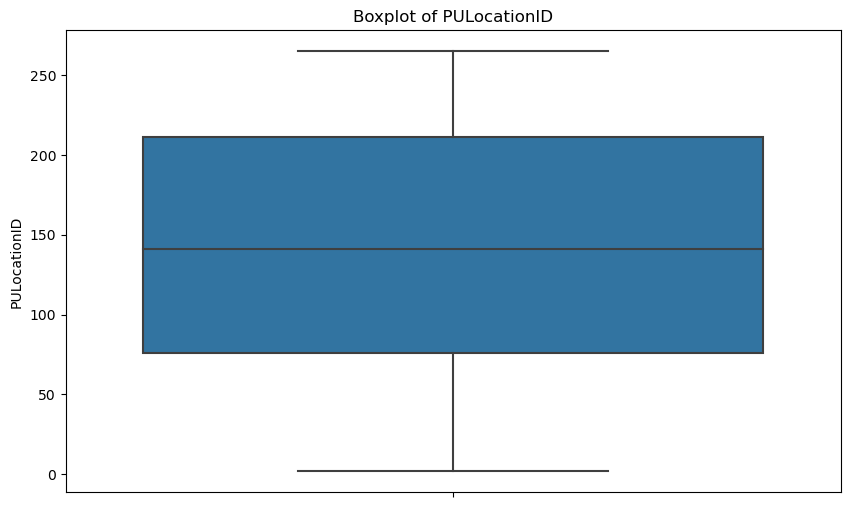

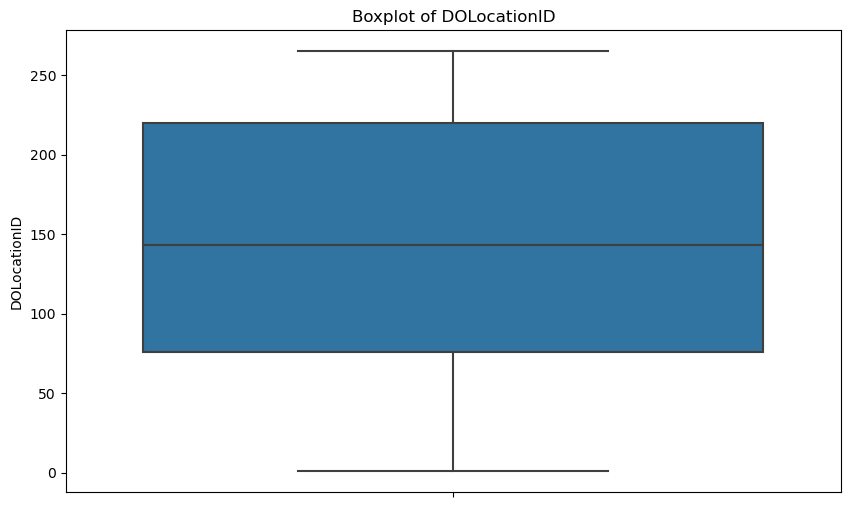

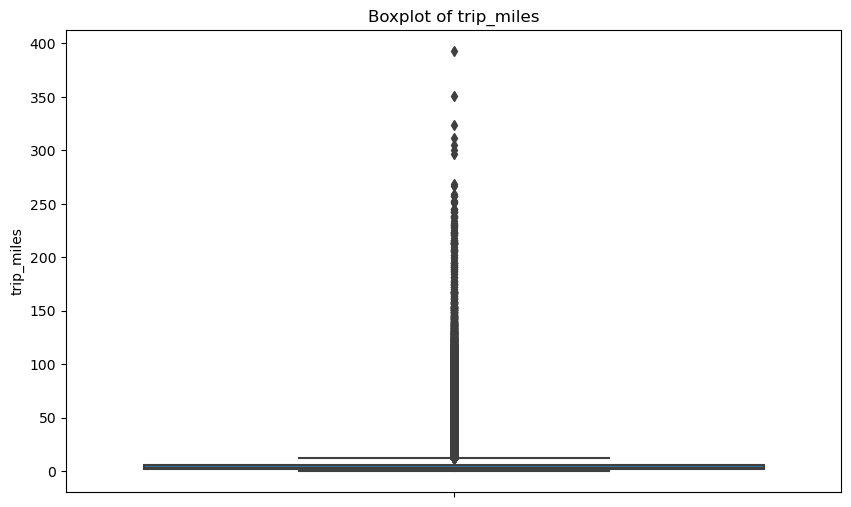

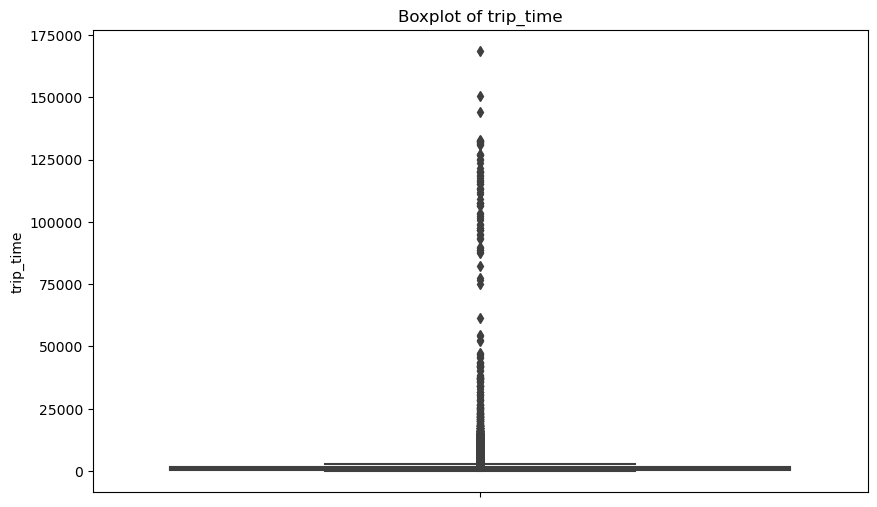

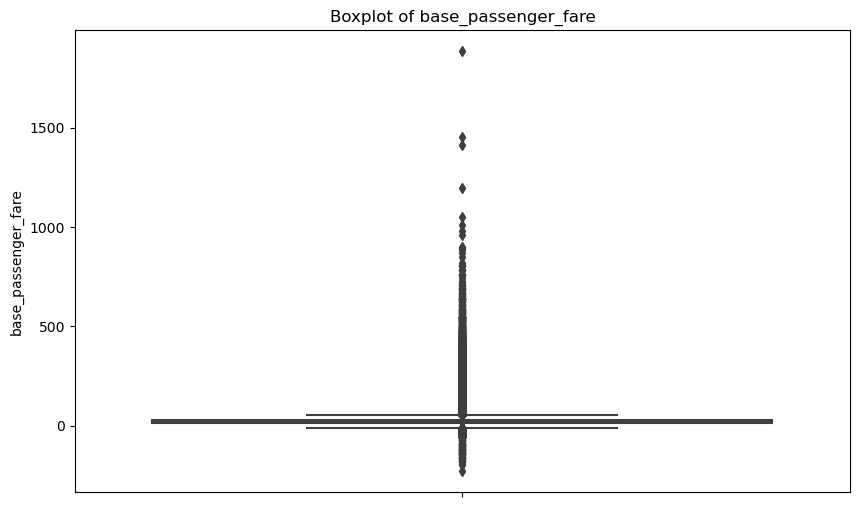

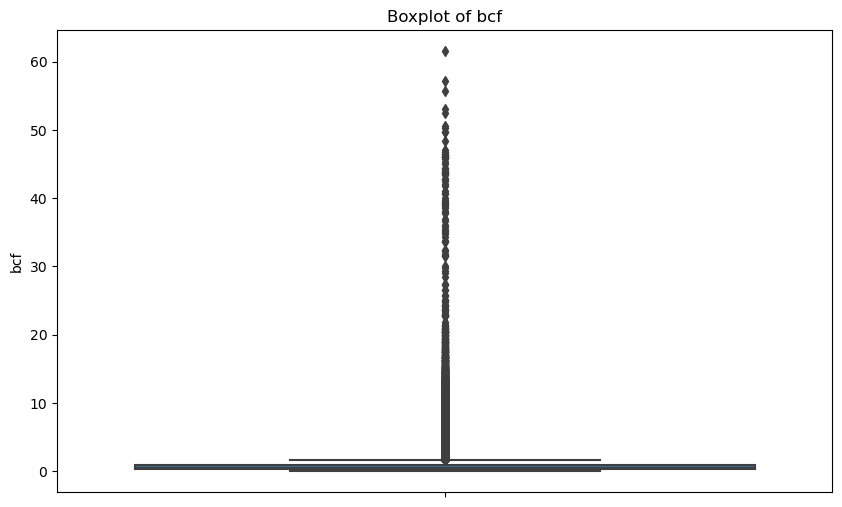

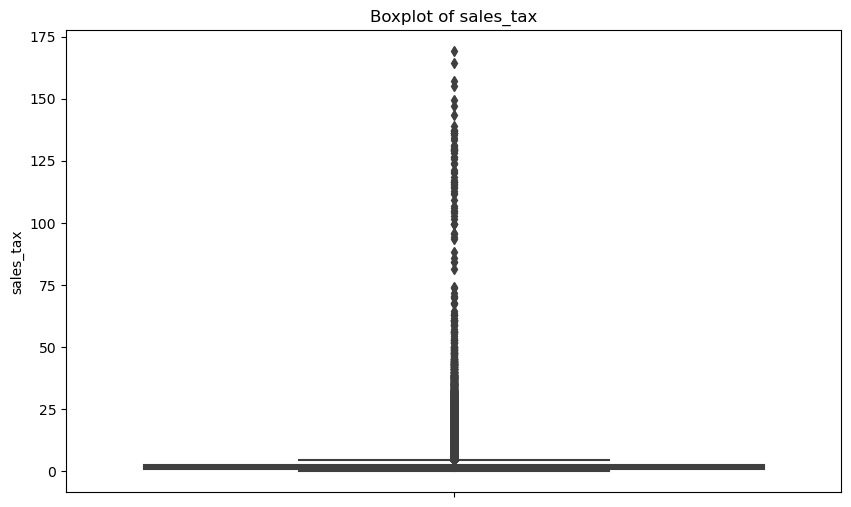

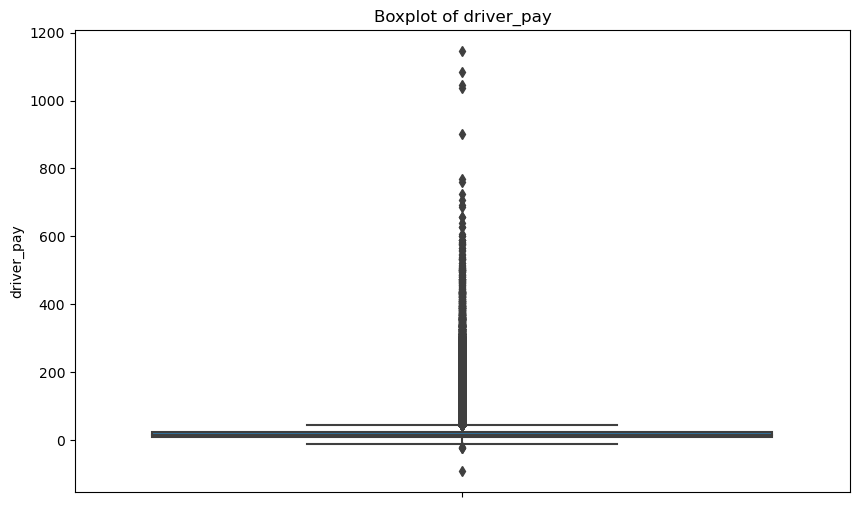

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in your dataset
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

# Plot each column in a octarate figure for better visibility
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set a large size for each individual box plot
    sns.boxplot(y=oct_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 31, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


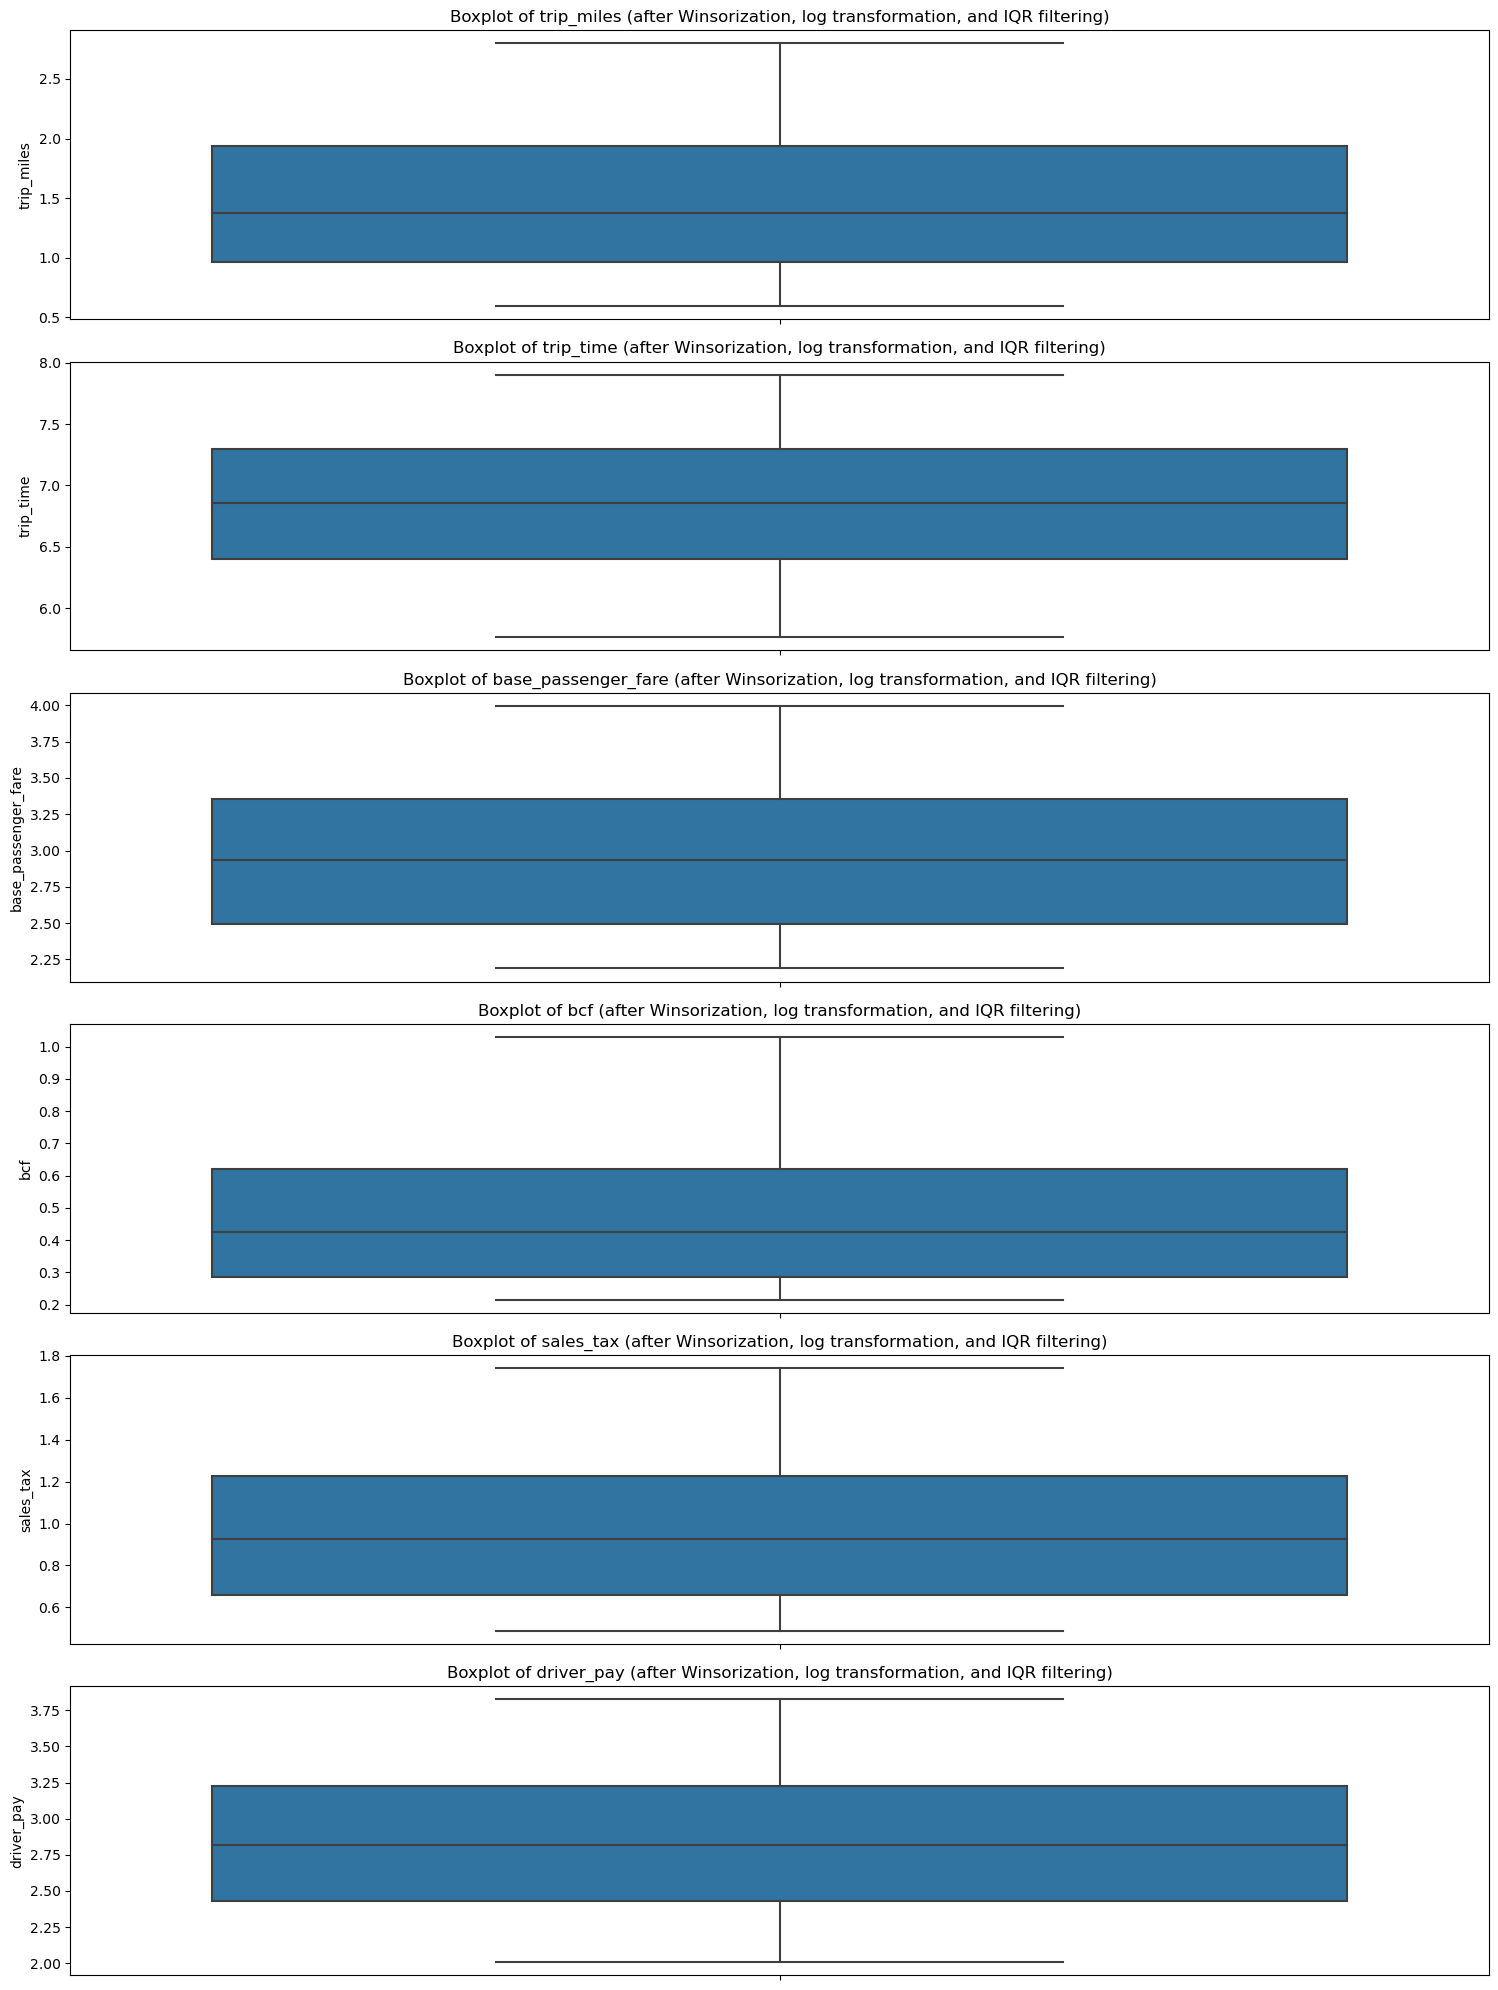

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to process
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']

# Step 1: Apply Winsorization to cap extreme values at 5th and 95th percentiles
# Using a transformed copy to avoid overwriting the original data
oct_new = oct_filtered.copy()
for column in columns_to_process:
    oct_new[column] = winsorize(oct_new[column], limits=[0.05, 0.05])  # Cap at 5th and 95th percentiles

# Step 2: Apply log transformation to compress the range and reduce skewness
for column in columns_to_process:
    oct_new[column] = np.log1p(oct_new[column])  # log1p(x) handles zero values

# Step 3: Remove outliers using the IQR method after log transformation
for column in columns_to_process:
    Q1 = oct_new[column].quantile(0.25)
    Q3 = oct_new[column].quantile(0.75)
    IQR = Q3 - Q1
    oct_new = oct_new[(oct_new[column] >= (Q1 - 1.5 * IQR)) & (oct_new[column] <= (Q3 + 1.5 * IQR))]

# Step 4: Plot boxplots for each column after Winsorization, log transformation, and IQR filtering
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=oct_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

In [27]:
# Define the emission factor (e.g., 404 grams of CO₂ per mile for a typical gasoline vehicle)
emission_factor = 404  # grams of CO₂ per mile

# Create 'estimated_emissions' column
oct_new['estimated_emissions'] = oct_new['trip_miles'] * emission_factor

# Define a threshold for categorizing emissions as "High" or "Low"
emission_threshold = 3000  # grams of CO₂

# Create 'emission_levels' column based on the threshold
oct_new['emission_levels'] = oct_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(oct_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 32, Finished, Available, Finished)

   trip_miles  estimated_emissions  emission_levels
0    2.623944          1060.073251                0
2    0.693147           280.031461                0
3    1.078410           435.677471                0
4    2.523326          1019.423607                0
5    1.289233           520.849990                0


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 33, Finished, Available, Finished)

/tmp/ipykernel_7689/1176853497.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = oct_new.corr()


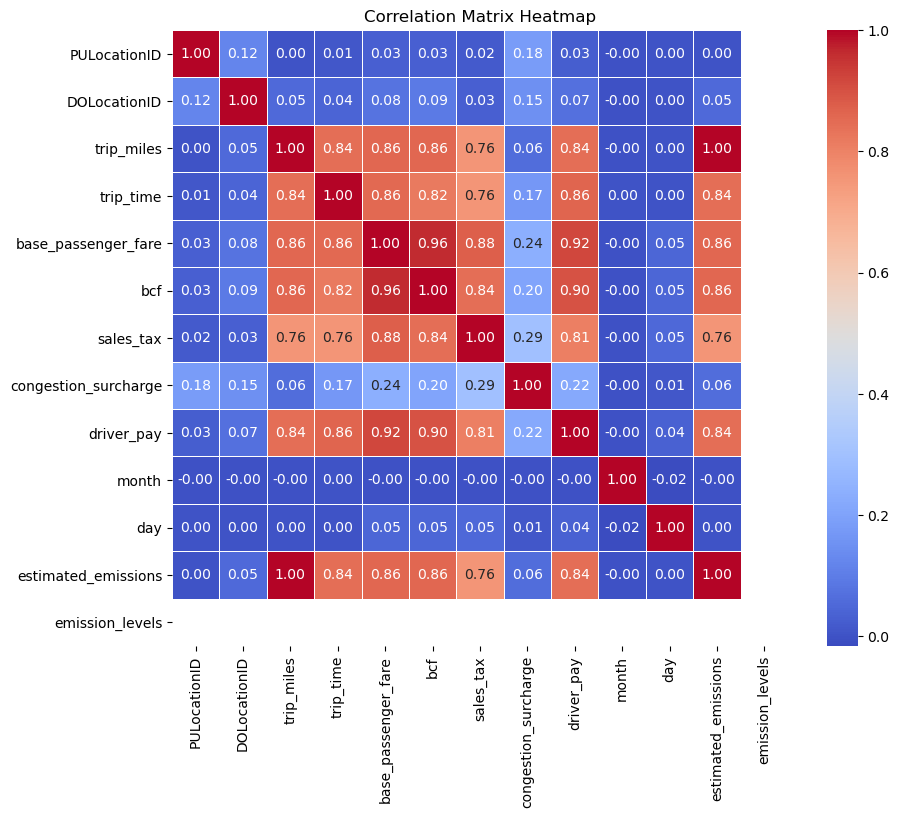

In [28]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = oct_new.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [29]:

oct_new.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 34, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12086381 entries, 0 to 16545355
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             float64
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
 18  estimated_emissions   float64
 19  emission_levels       int64  
dtypes: float64(8), int64(5), object(7)
memory usage: 1.9+ GB


In [30]:
oct_new['dispatching_base_num'].head()
base_counts = oct_new['dispatching_base_num'].value_counts()
print(base_counts)
top_10_bases = oct_new['dispatching_base_num'].value_counts().head(10).index
oct_new = oct_new[oct_new['dispatching_base_num'].isin(top_10_bases)]
oct_new.shape
oct_new.head()


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 35, Finished, Available, Finished)

B03404    6479697
B02764     796550
B02872     584546
B02875     494859
B02765     344944
B02866     285710
B02869     260534
B02682     214457
B02887     190382
B02871     190272
B02864     188068
B02878     185919
B02617     164269
B02884     157301
B02883     156035
B02882     148852
B02876     146738
B02879     131364
B02877     130412
B02835     128924
B02867     124679
B02888     120719
B02889      94150
B02836      81881
B02880      79286
B02395      78417
B02870      61329
B02865      49962
B02512      16125
Name: dispatching_base_num, dtype: int64


dispatching_base_num originating_base_num request_datetime  \
0                B02764               B02764         00:28:52   
5                B02875               B02875         00:01:25   
6                B02875               B02875         00:15:01   
7                B02875               B02875         00:42:43   
10               B02869               B02869         23:57:03   

   on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0           00:32:58        00:33:31         01:07:51            68   
5           00:06:18        00:07:27         00:18:23           249   
6           00:19:58        00:22:00         00:31:35           230   
7           00:44:59        00:44:59         00:58:47           163   
10          00:05:01        00:06:05         00:18:11           161   

    DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0             85    2.623944   7.630947             3.597038  0.722706   
5            230    1.289233   6.487684             3.313095  0.582216   
6             50    0.792993   6.356108             2.473171  0.285179   
7            244    2.128232   6.720220             3.214868  0.542324   
10           238    1.470176   6.588926             2.788093  0.378436   

    sales_tax  congestion_surcharge  driver_pay        date  month  day  \
0    1.423108                  2.75    3.533102  10-01-2021     10    1   
5    1.208960                  2.75    2.008214  10-01-2021     10    1   
6    0.672944                  2.75    2.008214  10-01-2021     10    1   
7    1.137833                  2.75    2.008214  10-01-2021     10    1   
10   0.854415                  2.75    2.862772  09-30-2021      9   30   

    estimated_emissions  emission_levels  
0           1060.073251                0  
5            520.849990                0  
6            320.368976                0  
7            859.805609                0  
10           593.951041                0

In [31]:
# Save oct_new to a new DataFrame called oct_df
oct_df = oct_new.copy()

# Display the shape and first few rows of oct_df to verify
print("Shape of oct_df:", oct_df.shape)
print(oct_df.head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 36, Finished, Available, Finished)

Shape of oct_df: (9841951, 20)
   dispatching_base_num originating_base_num request_datetime  \
0                B02764               B02764         00:28:52   
5                B02875               B02875         00:01:25   
6                B02875               B02875         00:15:01   
7                B02875               B02875         00:42:43   
10               B02869               B02869         23:57:03   

   on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0           00:32:58        00:33:31         01:07:51            68   
5           00:06:18        00:07:27         00:18:23           249   
6           00:19:58        00:22:00         00:31:35           230   
7           00:44:59        00:44:59         00:58:47           163   
10          00:05:01        00:06:05         00:18:11           161   

    DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0             85    2.623944   7.630947             3.597038  0.722706   
5  

In [32]:
oct_df.to_parquet("Users/akumar63/oct2021_df.parquet", engine='pyarrow')


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 165, 37, Finished, Available, Finished)

--- End of 2021-10-hvFHV.ipynb ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 6, Finished, Available, Finished)

In [2]:
nov = pd.read_parquet("Users/akumar63/2021 data/fhvhv_tripdata_2021-11.parquet")
print(nov.head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 7, Finished, Available, Finished)

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B03404               B03404   
1            HV0003               B03404               B03404   
2            HV0003               B03404               B03404   
3            HV0003               B03404               B03404   
4            HV0003               B03404               B03404   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-10-31 23:56:02 2021-11-01 00:00:52 2021-11-01 00:00:52   
1 2021-11-01 00:11:03 2021-11-01 00:11:24 2021-11-01 00:12:43   
2 2021-11-01 00:37:54 2021-11-01 00:40:56 2021-11-01 00:41:42   
3 2021-11-01 00:52:52 2021-11-01 00:55:00 2021-11-01 00:55:56   
4 2021-11-01 00:06:26 2021-11-01 00:13:05 2021-11-01 00:15:05   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-11-01 00:07:05           225            37        1.11  ...       0.70   
1 2021-11-01 00:33:16            36           124       

In [3]:
nov.shape

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 8, Finished, Available, Finished)

(16041639, 24)

In [4]:
# Check for null values in the data
null_counts = nov.isnull().sum()
print("Null values in each column:")
print(null_counts)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 9, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4218972
request_datetime              0
on_scene_datetime       4217704
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64


In [5]:

unique_license_nums = nov['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 10, Finished, Available, Finished)

Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']


In [6]:

hv0004_count = nov[nov['hvfhs_license_num'] == 'HV0004'].shape[0]
print("Number of entries with 'HV0004' in 'hvfhs_license_num':", hv0004_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 11, Finished, Available, Finished)

Number of entries with 'HV0004' in 'hvfhs_license_num': 0


In [7]:



hv0003_count = nov[nov['hvfhs_license_num'] == 'HV0003'].shape[0]
print("Number of entries with 'HV0003' in 'hvfhs_license_num':", hv0003_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 12, Finished, Available, Finished)

Number of entries with 'HV0003' in 'hvfhs_license_num': 11819597


In [8]:

hv0005_count = nov[nov['hvfhs_license_num'] == 'HV0005'].shape[0]
print("Number of entries with 'HV0005' in 'hvfhs_license_num':", hv0005_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 13, Finished, Available, Finished)

Number of entries with 'HV0005' in 'hvfhs_license_num': 4222042


In [9]:
nov_filtered = nov[~nov['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 14, Finished, Available, Finished)

In [10]:
nov_filtered = nov_filtered.drop(columns=['airport_fee'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 15, Finished, Available, Finished)

In [11]:
null_counts = nov_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 16, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num          0
dispatching_base_num       0
originating_base_num    1268
request_datetime           0
on_scene_datetime          0
pickup_datetime            0
dropoff_datetime           0
PULocationID               0
DOLocationID               0
trip_miles                 0
trip_time                  0
base_passenger_fare        0
tolls                      0
bcf                        0
sales_tax                  0
congestion_surcharge       0
tips                       0
driver_pay                 0
shared_request_flag        0
shared_match_flag          0
access_a_ride_flag         0
wav_request_flag           0
wav_match_flag             0
dtype: int64


In [12]:

nov_filtered.shape
nov_filtered.info()


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 17, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11819597 entries, 0 to 16041636
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  tips                  float64       
 17  driver_pay            float64       
 18  shared_request_flag   object        
 19

In [13]:
nov_filtered = nov_filtered.drop(columns=['hvfhs_license_num'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 18, Finished, Available, Finished)

In [14]:


nov_filtered['date'] = nov_filtered['request_datetime'].dt.date
nov_filtered['date'].tail(15)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 19, Finished, Available, Finished)

16041619    2021-11-30
16041620    2021-11-30
16041623    2021-11-30
16041624    2021-11-30
16041625    2021-11-30
16041626    2021-11-30
16041627    2021-11-30
16041628    2021-11-30
16041629    2021-11-30
16041630    2021-11-30
16041631    2021-11-30
16041632    2021-11-30
16041633    2021-11-30
16041635    2021-11-30
16041636    2021-11-30
Name: date, dtype: object

In [15]:
import pandas as pd

# Step 1: Extract the date part from 'request_datetime' in mm-dd-yyyy format
nov_filtered['date'] = pd.to_datetime(nov_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Step 2: Remove the date part from the original datetime columns, leaving only the time
nov_filtered['request_datetime'] = pd.to_datetime(nov_filtered['request_datetime']).dt.time
nov_filtered['on_scene_datetime'] = pd.to_datetime(nov_filtered['on_scene_datetime']).dt.time
nov_filtered['pickup_datetime'] = pd.to_datetime(nov_filtered['pickup_datetime']).dt.time
nov_filtered['dropoff_datetime'] = pd.to_datetime(nov_filtered['dropoff_datetime']).dt.time

# Step 3: Extract month and day from the 'date' column
nov_filtered['month'] = pd.to_datetime(nov_filtered['date']).dt.month
nov_filtered['day'] = pd.to_datetime(nov_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(nov_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(nov_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 20, Finished, Available, Finished)

Current format of 'date' column:
0    10-31-2021
1    11-01-2021
2    11-01-2021
3    11-01-2021
4    11-01-2021
Name: date, dtype: object

Updated DataFrame:
         date  month  day request_datetime on_scene_datetime pickup_datetime  \
0  10-31-2021     10   31         23:56:02          00:00:52        00:00:52   
1  11-01-2021     11    1         00:11:03          00:11:24        00:12:43   
2  11-01-2021     11    1         00:37:54          00:40:56        00:41:42   
3  11-01-2021     11    1         00:52:52          00:55:00        00:55:56   
4  11-01-2021     11    1         00:06:26          00:13:05        00:15:05   

  dropoff_datetime  
0         00:07:05  
1         00:33:16  
2         00:48:36  
3         01:04:54  
4         00:19:32  


In [16]:

# Get unique values in the 'month' column and count them
unique_months = nov_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", nov_filtered['month'].unique())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 21, Finished, Available, Finished)


Number of unique months: 3
Unique month values: [10 11 12]


In [17]:
# Filter rows where the month is either 12 or 2
months_12_2 = nov_filtered[nov_filtered['month'].isin([12, 2])]

# Display the rows where the month is 12 or 2
print("Rows where the month is either December (12) or February (2):")
print(months_12_2)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 22, Finished, Available, Finished)

Rows where the month is either December (12) or February (2):
         dispatching_base_num originating_base_num request_datetime  \
16022753               B03404               B03404         00:00:00   
16024954               B03404               B03404         00:05:50   
16026219               B03404               B03404         00:10:00   
16026692               B03404               B03404         00:05:00   
16027124               B03404               B03404         00:00:00   
16027616               B03404               B03404         00:10:00   
16027785               B03404               B03404         00:05:10   
16028763               B03404               B03404         00:05:00   
16031774               B03404               B03404         00:00:00   
16032067               B03404               B03404         00:05:00   
16033378               B03404               B03404         00:05:00   
16033493               B03404               B03404         00:10:37   
16035981       

In [18]:

# Drop multiple columns
nov_filtered = nov_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips','tolls'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 23, Finished, Available, Finished)

In [19]:

nov_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 24, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11819597 entries, 0 to 16041636
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             int64  
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
dtypes: float64(6), int64(5), object(7)
memory usage: 1.7+ GB


In [20]:

duplicate_count = nov_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
nov_filtered = nov_filtered.drop_duplicates()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 25, Finished, Available, Finished)

Number of duplicate rows: 0


In [21]:

nov_filtered['dispatching_base_num'].nunique()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 26, Finished, Available, Finished)

28

In [22]:
# Define the columns to check for duplicates
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = nov_filtered[nov_filtered.duplicated(subset=duplicate_columns, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 27, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 45
Duplicate rows based on specified columns:
         dispatching_base_num originating_base_num request_datetime  \
502178                 B03404               B03404         05:25:00   
1330379                B03404               B03404         20:08:57   
3413708                B03404               B03404         12:05:33   
3413709                B03404               B03404         12:08:25   
3413710                B03404               B03404         12:11:49   
3413712                B03404               B03404         12:19:17   
3413715                B03404               B03404         12:33:41   
3413716                B03404               B03404         12:38:05   
3413718                B03404               B03404         12:45:27   
3414002                B03404               B03404         12:05:32   
3414003                B03404               B03404         12:08:28   
3414004                B03404               B0340

In [23]:
nov_filtered = nov_filtered.drop_duplicates(subset=duplicate_columns)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(nov_filtered.shape)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 28, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(11819568, 18)


In [24]:


# Define the columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = nov_filtered[nov_filtered.duplicated(subset=duplicate_column, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 29, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 0
Duplicate rows based on specified columns:
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, bcf, sales_tax, congestion_surcharge, driver_pay, date, month, day]
Index: []


In [25]:

nov_filtered = nov_filtered.drop_duplicates(subset=duplicate_column)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(nov_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 30, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(11819568, 18)


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 31, Finished, Available, Finished)

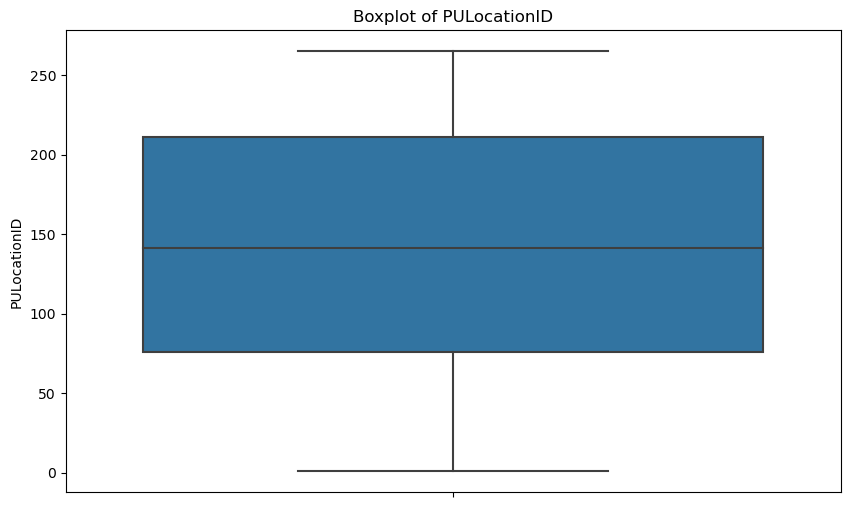

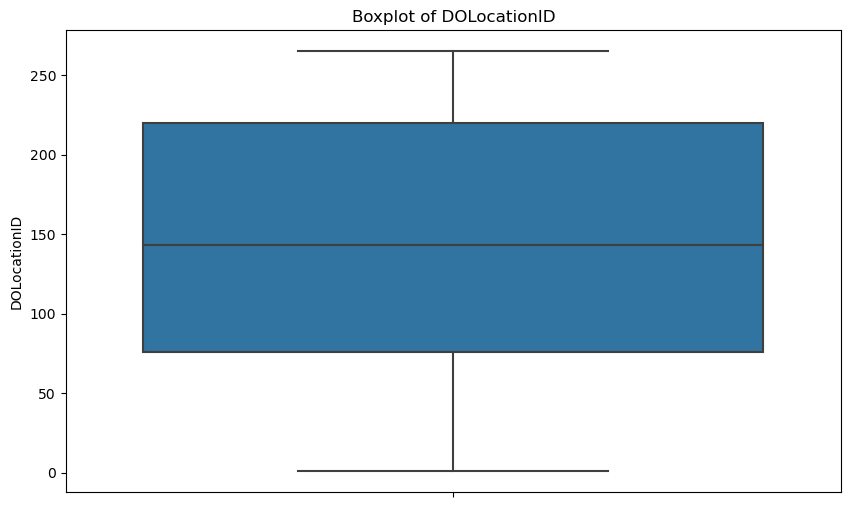

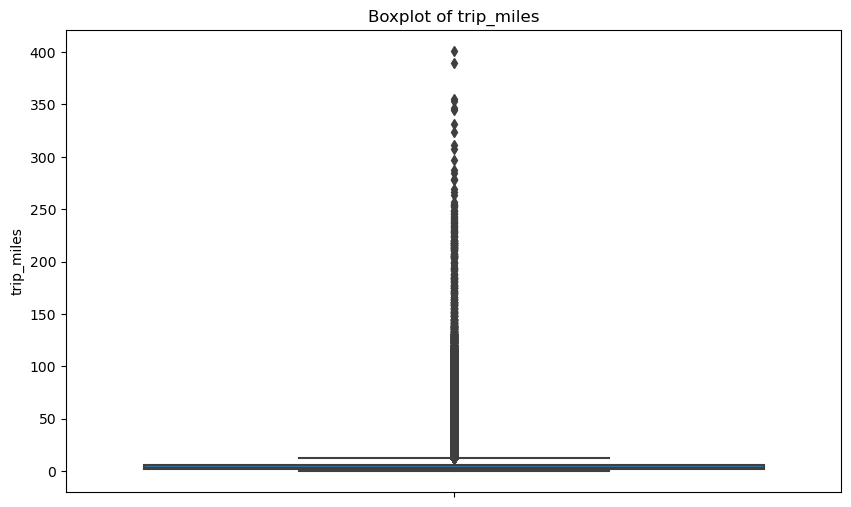

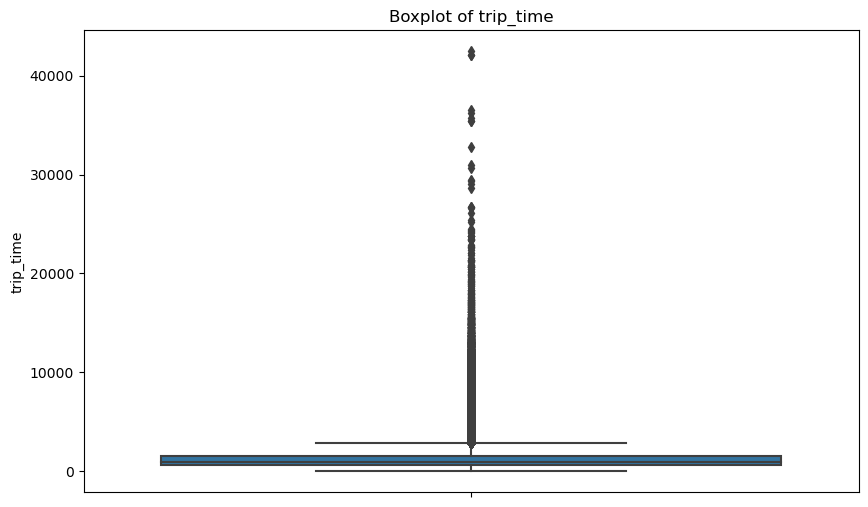

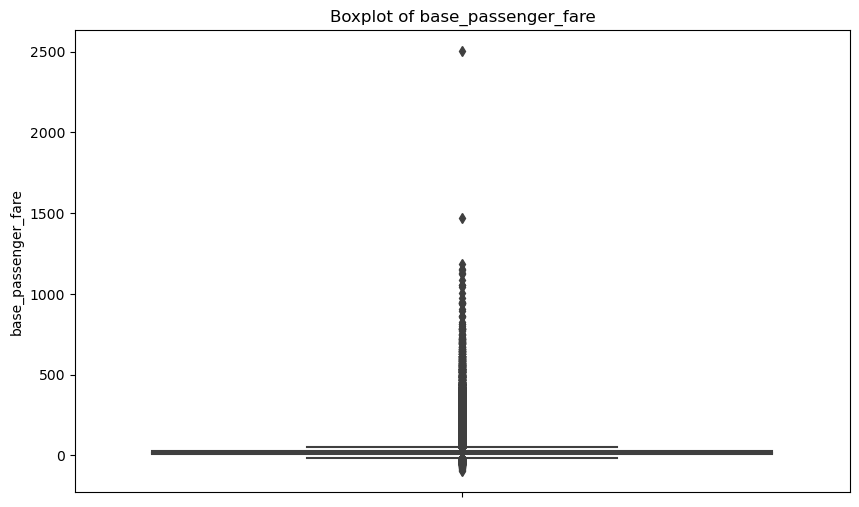

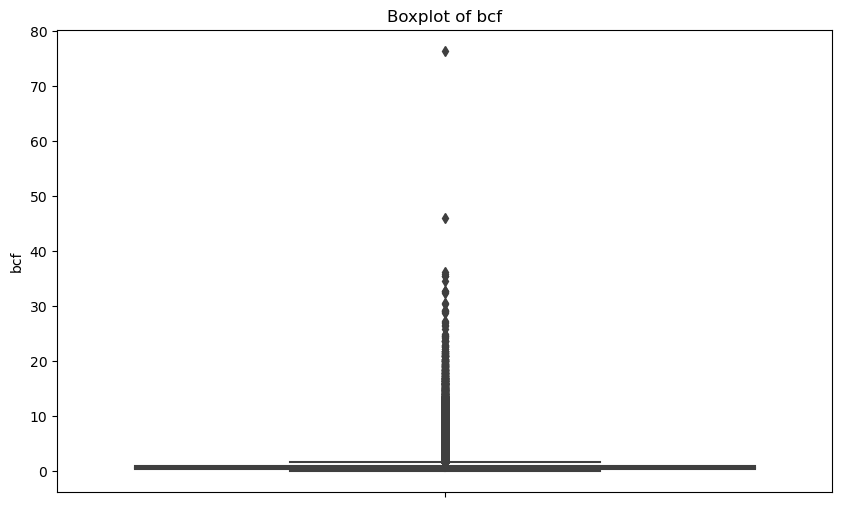

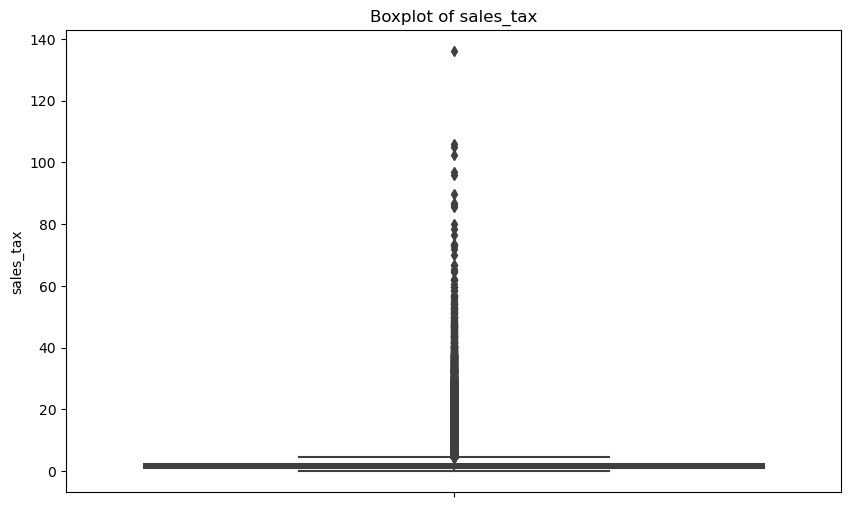

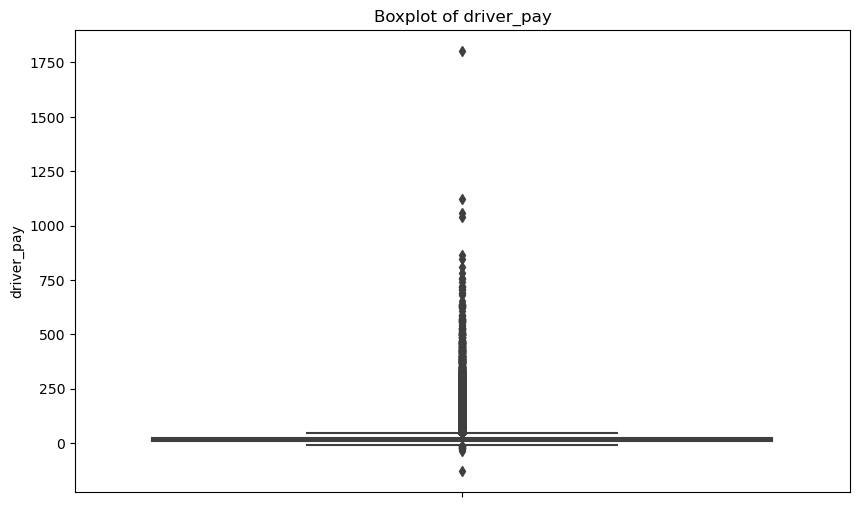

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in your dataset
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

# Plot each column in a novarate figure for better visibility
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set a large size for each individual box plot
    sns.boxplot(y=nov_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 32, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/env/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


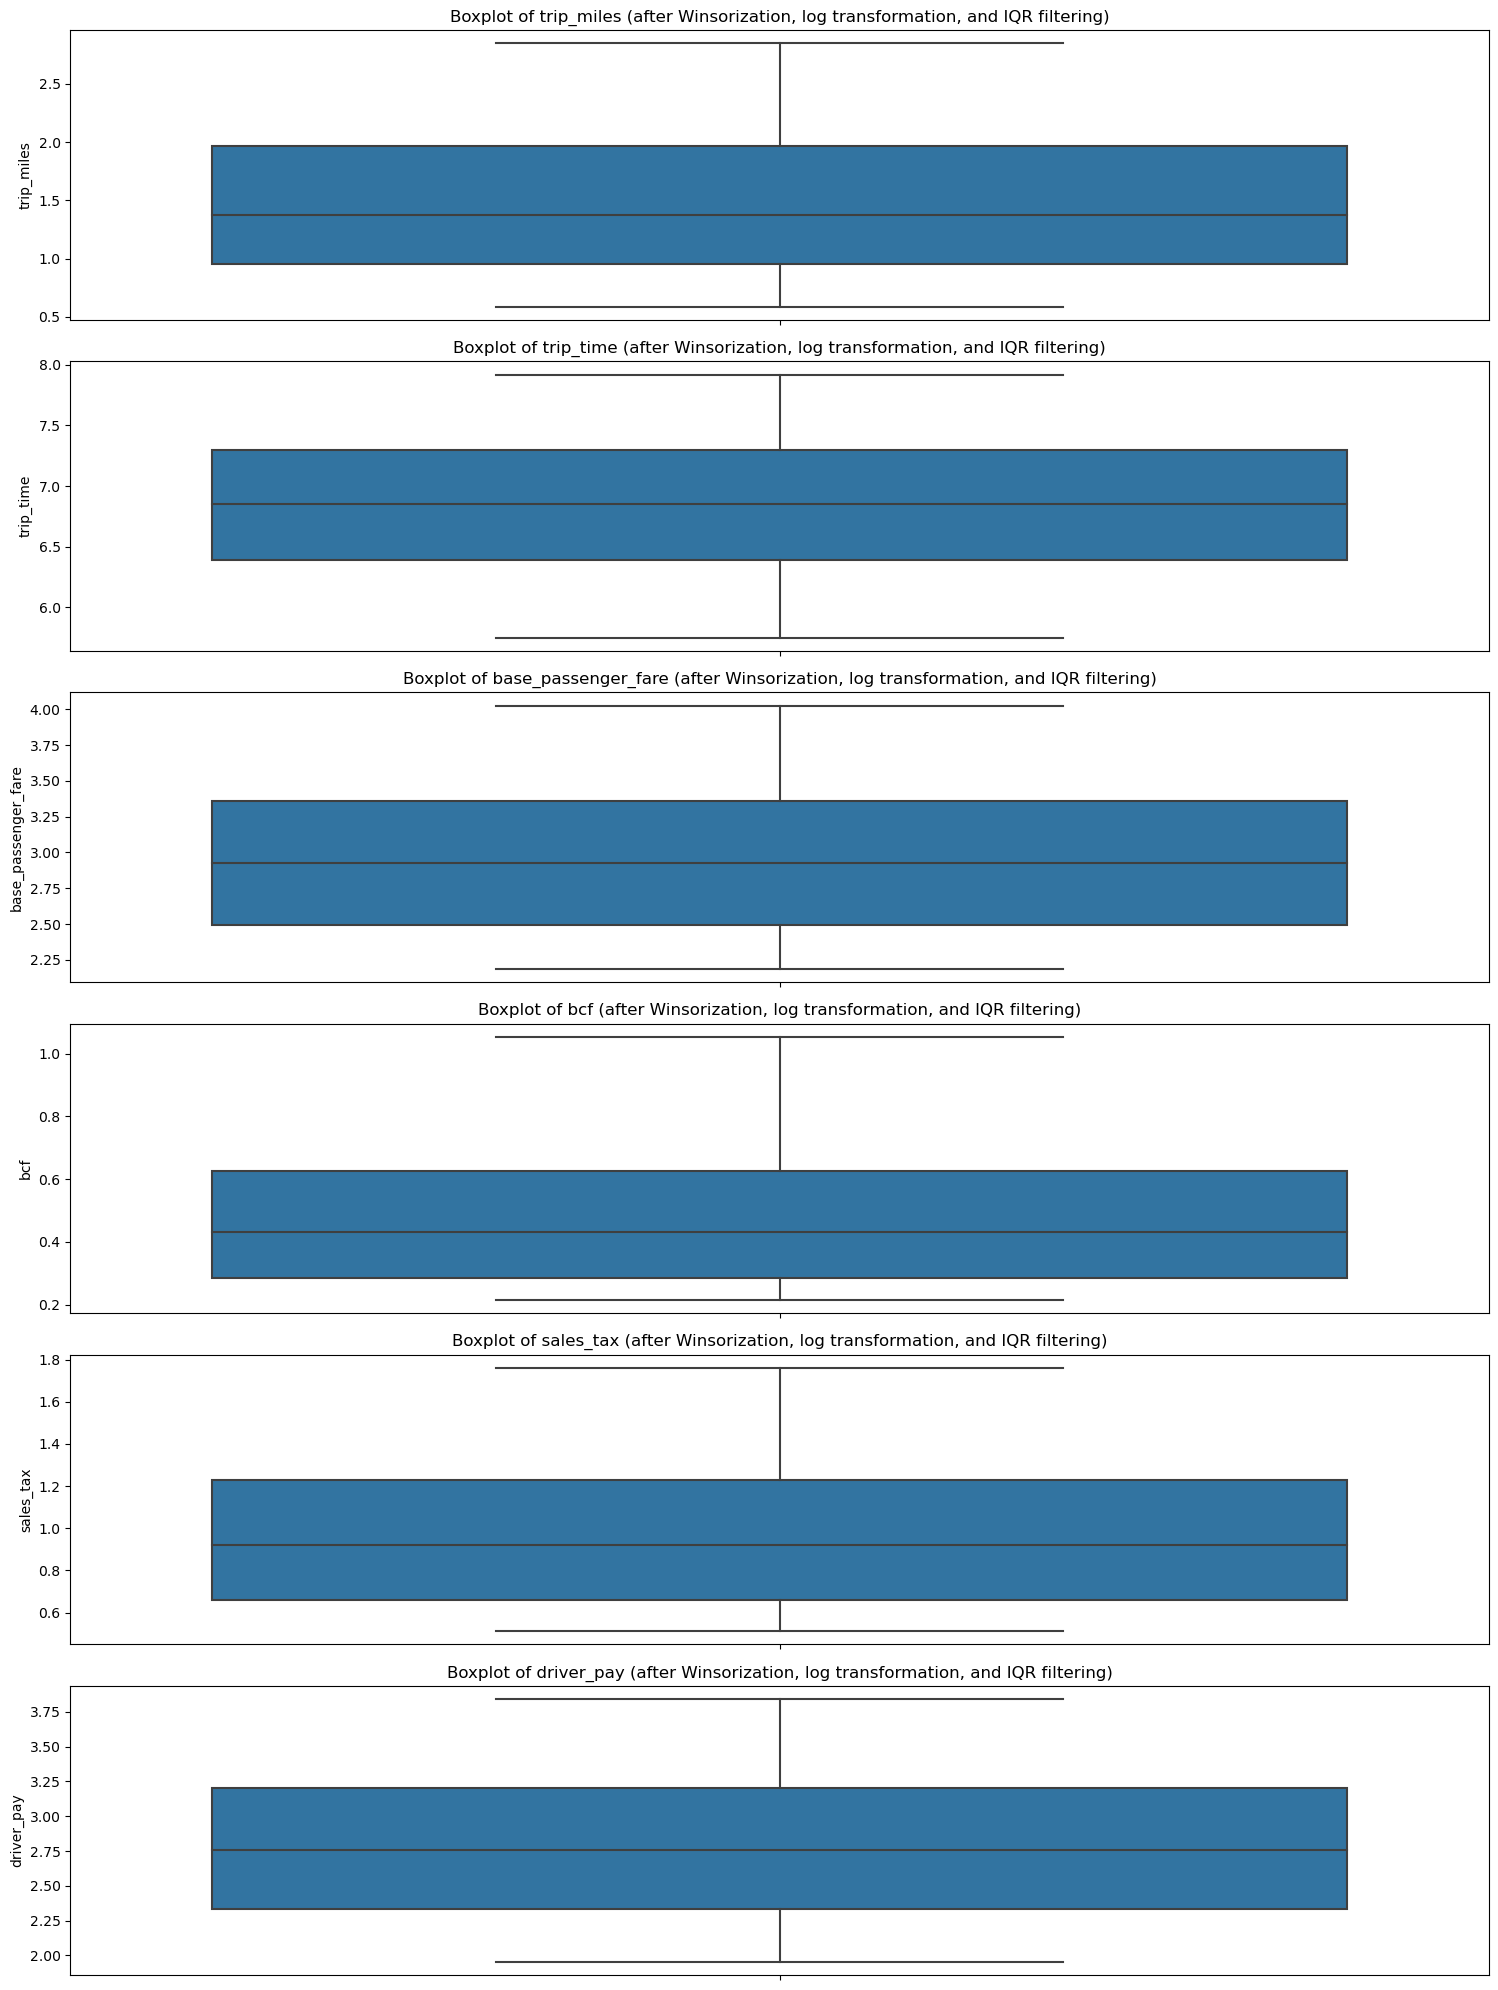

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to process
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']

# Step 1: Apply Winsorization to cap extreme values at 5th and 95th percentiles
# Using a transformed copy to avoid overwriting the original data
nov_new = nov_filtered.copy()
for column in columns_to_process:
    nov_new[column] = winsorize(nov_new[column], limits=[0.05, 0.05])  # Cap at 5th and 95th percentiles

# Step 2: Apply log transformation to compress the range and reduce skewness
for column in columns_to_process:
    nov_new[column] = np.log1p(nov_new[column])  # log1p(x) handles zero values

# Step 3: Remove outliers using the IQR method after log transformation
for column in columns_to_process:
    Q1 = nov_new[column].quantile(0.25)
    Q3 = nov_new[column].quantile(0.75)
    IQR = Q3 - Q1
    nov_new = nov_new[(nov_new[column] >= (Q1 - 1.5 * IQR)) & (nov_new[column] <= (Q3 + 1.5 * IQR))]

# Step 4: Plot boxplots for each column after Winsorization, log transformation, and IQR filtering
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=nov_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()


In [28]:
# Define the emission factor (e.g., 404 grams of CO₂ per mile for a typical gasoline vehicle)
emission_factor = 404  # grams of CO₂ per mile

# Create 'estimated_emissions' column
nov_new['estimated_emissions'] = nov_new['trip_miles'] * emission_factor

# Define a threshold for categorizing emissions as "High" or "Low"
emission_threshold = 3000  # grams of CO₂

# Create 'emission_levels' column based on the threshold
nov_new['emission_levels'] = nov_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(nov_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 33, Finished, Available, Finished)

   trip_miles  estimated_emissions  emission_levels
0    0.746688           301.661931                0
1    1.874874           757.449248                0
2    0.963174           389.122424                0
3    1.264127           510.707198                0
4    0.770108           311.123722                0


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 34, Finished, Available, Finished)

/tmp/ipykernel_9649/1766247233.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = nov_new.corr()


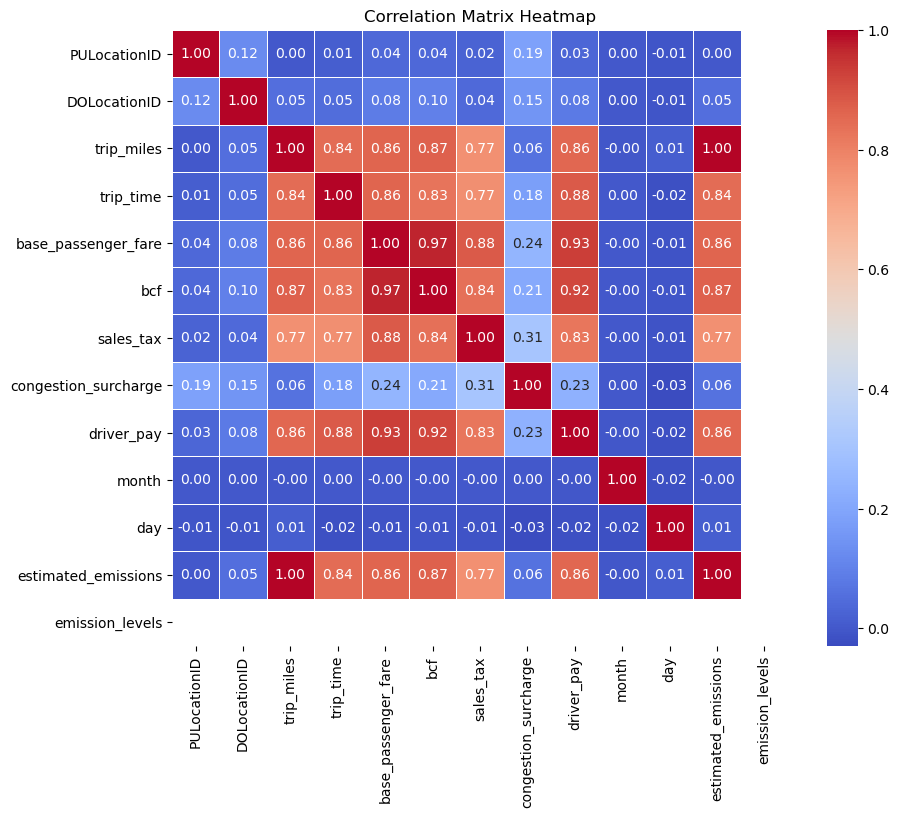

In [29]:




import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = nov_new.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [30]:
nov_new.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 35, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11819568 entries, 0 to 16041636
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             float64
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
 18  estimated_emissions   float64
 19  emission_levels       int64  
dtypes: float64(8), int64(5), object(7)
memory usage: 1.8+ GB


In [31]:

nov_new['dispatching_base_num'].head()
base_counts = nov_new['dispatching_base_num'].value_counts()
print(base_counts)
top_10_bases = nov_new['dispatching_base_num'].value_counts().head(10).index
nov_new = nov_new[nov_new['dispatching_base_num'].isin(top_10_bases)]
nov_new.shape
nov_new.head()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 36, Finished, Available, Finished)

B03404    11800452
B02764        7542
B02872        1527
B02878        1028
B02682         734
B02879         690
B02880         687
B02876         633
B02867         568
B02395         491
B02882         468
B02884         466
B02835         435
B02864         425
B02887         387
B02617         385
B02765         363
B02889         336
B02877         316
B02888         313
B02866         264
B02870         250
B02871         232
B02512         231
B02869         168
B02883         138
B02875          32
B02836           7
Name: dispatching_base_num, dtype: int64


dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         23:56:02   
1               B03404               B03404         00:11:03   
2               B03404               B03404         00:37:54   
3               B03404               B03404         00:52:52   
4               B03404               B03404         00:06:26   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:00:52        00:00:52         00:07:05           225   
1          00:11:24        00:12:43         00:33:16            36   
2          00:40:56        00:41:42         00:48:36           132   
3          00:55:00        00:55:56         01:04:54           216   
4          00:13:05        00:15:05         00:19:32           211   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0            37    0.746688   5.924256             2.187174  0.215111   
1           124    1.874874   7.118016             3.285787  0.570980   
2           216    0.963174   6.028279             2.187174  0.215111   
3           258    1.264127   6.289716             2.498974  0.292670   
4            87    0.770108   5.749393             3.208421  0.536493   

   sales_tax  congestion_surcharge  driver_pay        date  month  day  \
0   0.530628                  0.00    2.241773  10-31-2021     10   31   
1   1.187843                  0.00    3.017004  11-01-2021     11    1   
2   0.530628                  0.00    2.242835  11-01-2021     11    1   
3   0.688135                  0.00    2.427454  11-01-2021     11    1   
4   1.134623                  2.75    3.058707  11-01-2021     11    1   

   estimated_emissions  emission_levels  
0           301.661931                0  
1           757.449248                0  
2           389.122424                0  
3           510.707198                0  
4           311.123722                0

In [32]:

# Save nov_new to a new DataFrame called nov_df
nov_df = nov_new.copy()

# Display the shape and first few rows of nov_df to verify
print("Shape of nov_df:", nov_df.shape)
print(nov_df.head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 37, Finished, Available, Finished)

Shape of nov_df: (11814352, 20)
  dispatching_base_num originating_base_num request_datetime  \
0               B03404               B03404         23:56:02   
1               B03404               B03404         00:11:03   
2               B03404               B03404         00:37:54   
3               B03404               B03404         00:52:52   
4               B03404               B03404         00:06:26   

  on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0          00:00:52        00:00:52         00:07:05           225   
1          00:11:24        00:12:43         00:33:16            36   
2          00:40:56        00:41:42         00:48:36           132   
3          00:55:00        00:55:56         01:04:54           216   
4          00:13:05        00:15:05         00:19:32           211   

   DOLocationID  trip_miles  trip_time  base_passenger_fare       bcf  \
0            37    0.746688   5.924256             2.187174  0.215111   
1           124 

In [33]:
nov_df.to_parquet("Users/akumar63/nov2021_df.parquet", engine='pyarrow')


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 167, 38, Finished, Available, Finished)

--- End of 2021-11-hvFHV.ipynb ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 6, Finished, Available, Finished)

In [2]:
dec = pd.read_parquet("Users/akumar63/2021 data/fhvhv_tripdata_2021-12.parquet")
print(dec.head())


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 7, Finished, Available, Finished)

  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B03404               B03404   
1            HV0003               B03404               B03404   
2            HV0003               B03404               B03404   
3            HV0003               B03404               B03404   
4            HV0003               B03404               B03404   

     request_datetime   on_scene_datetime     pickup_datetime  \
0 2021-12-01 00:03:20 2021-12-01 00:07:14 2021-12-01 00:09:16   
1 2021-12-01 00:02:58 2021-12-01 00:05:38 2021-12-01 00:06:05   
2 2021-12-01 00:20:22 2021-12-01 00:21:26 2021-12-01 00:22:45   
3 2021-12-01 00:47:40 2021-12-01 00:48:50 2021-12-01 00:50:51   
4 2021-12-01 00:25:31 2021-12-01 00:29:07 2021-12-01 00:29:12   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  ...  sales_tax  \
0 2021-12-01 00:58:03           164           265       17.54  ...       6.42   
1 2021-12-01 00:19:05            80           112       

In [3]:

dec.shape

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 8, Finished, Available, Finished)

(16054495, 24)

In [4]:
# Check for null values in the data
null_counts = dec.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 9, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    4248980
request_datetime              0
on_scene_datetime       4248138
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64


In [5]:

unique_license_nums = dec['hvfhs_license_num'].unique()
print("Unique values in 'hvfhs_license_num':")
print(unique_license_nums)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 10, Finished, Available, Finished)

Unique values in 'hvfhs_license_num':
['HV0003' 'HV0005']


In [6]:
hv0004_count = dec[dec['hvfhs_license_num'] == 'HV0004'].shape[0]
print("Number of entries with 'HV0004' in 'hvfhs_license_num':", hv0004_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 11, Finished, Available, Finished)

Number of entries with 'HV0004' in 'hvfhs_license_num': 0


In [7]:
hv0003_count = dec[dec['hvfhs_license_num'] == 'HV0003'].shape[0]
print("Number of entries with 'HV0003' in 'hvfhs_license_num':", hv0003_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 12, Finished, Available, Finished)

Number of entries with 'HV0003' in 'hvfhs_license_num': 11802074


In [8]:


hv0005_count = dec[dec['hvfhs_license_num'] == 'HV0005'].shape[0]
print("Number of entries with 'HV0005' in 'hvfhs_license_num':", hv0005_count)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 13, Finished, Available, Finished)

Number of entries with 'HV0005' in 'hvfhs_license_num': 4252421


In [9]:

dec_filtered = dec[~dec['hvfhs_license_num'].isin(['HV0004', 'HV0005'])]

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 14, Finished, Available, Finished)

In [10]:
dec_filtered = dec_filtered.drop(columns=['airport_fee'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 15, Finished, Available, Finished)

In [11]:
null_counts = dec_filtered.isnull().sum()
print("Null values in each column:")
print(null_counts)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 16, Finished, Available, Finished)

Null values in each column:
hvfhs_license_num         0
dispatching_base_num      0
originating_base_num    842
request_datetime          0
on_scene_datetime         0
pickup_datetime           0
dropoff_datetime          0
PULocationID              0
DOLocationID              0
trip_miles                0
trip_time                 0
base_passenger_fare       0
tolls                     0
bcf                       0
sales_tax                 0
congestion_surcharge      0
tips                      0
driver_pay                0
shared_request_flag       0
shared_match_flag         0
access_a_ride_flag        0
wav_request_flag          0
wav_match_flag            0
dtype: int64


In [12]:
dec_filtered.shape
dec_filtered.info()


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 17, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11802074 entries, 0 to 16054493
Data columns (total 23 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  tips                  float64       
 17  driver_pay            float64       
 18  shared_request_flag   object        
 19

In [13]:

dec_filtered = dec_filtered.drop(columns=['hvfhs_license_num'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 18, Finished, Available, Finished)

In [14]:
dec_filtered['date'] = dec_filtered['request_datetime'].dt.date
dec_filtered['date'].tail(15)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 19, Finished, Available, Finished)

16054474    2021-12-31
16054475    2021-12-31
16054476    2021-12-31
16054477    2021-12-31
16054478    2021-12-31
16054479    2021-12-31
16054480    2021-12-31
16054481    2021-12-31
16054482    2021-12-31
16054484    2021-12-31
16054485    2021-12-31
16054486    2021-12-31
16054487    2021-12-31
16054488    2021-12-31
16054493    2021-12-31
Name: date, dtype: object

In [15]:

import pandas as pd

# Step 1: Extract the date part from 'request_datetime' in mm-dd-yyyy format
dec_filtered['date'] = pd.to_datetime(dec_filtered['request_datetime']).dt.strftime('%m-%d-%Y')

# Step 2: Remove the date part from the original datetime columns, leaving only the time
dec_filtered['request_datetime'] = pd.to_datetime(dec_filtered['request_datetime']).dt.time
dec_filtered['on_scene_datetime'] = pd.to_datetime(dec_filtered['on_scene_datetime']).dt.time
dec_filtered['pickup_datetime'] = pd.to_datetime(dec_filtered['pickup_datetime']).dt.time
dec_filtered['dropoff_datetime'] = pd.to_datetime(dec_filtered['dropoff_datetime']).dt.time

# Step 3: Extract month and day from the 'date' column
dec_filtered['month'] = pd.to_datetime(dec_filtered['date']).dt.month
dec_filtered['day'] = pd.to_datetime(dec_filtered['date']).dt.day

# Check current format of the 'date' column
print("Current format of 'date' column:")
print(dec_filtered['date'].head())

# Display the updated DataFrame to verify changes
print("\nUpdated DataFrame:")
print(dec_filtered[['date', 'month', 'day', 'request_datetime', 'on_scene_datetime', 'pickup_datetime', 'dropoff_datetime']].head())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 20, Finished, Available, Finished)

Current format of 'date' column:
0    12-01-2021
1    12-01-2021
2    12-01-2021
3    12-01-2021
4    12-01-2021
Name: date, dtype: object

Updated DataFrame:
         date  month  day request_datetime on_scene_datetime pickup_datetime  \
0  12-01-2021     12    1         00:03:20          00:07:14        00:09:16   
1  12-01-2021     12    1         00:02:58          00:05:38        00:06:05   
2  12-01-2021     12    1         00:20:22          00:21:26        00:22:45   
3  12-01-2021     12    1         00:47:40          00:48:50        00:50:51   
4  12-01-2021     12    1         00:25:31          00:29:07        00:29:12   

  dropoff_datetime  
0         00:58:03  
1         00:19:05  
2         00:43:47  
3         00:59:20  
4         00:37:22  


In [16]:
# Get unique values in the 'month' column and count them
unique_months = dec_filtered['month'].nunique()
print("\nNumber of unique months:", unique_months)
print("Unique month values:", dec_filtered['month'].unique())

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 21, Finished, Available, Finished)


Number of unique months: 2
Unique month values: [12 11]


In [17]:
# Filter rows where the month is either 12 or 2
months_12_2 = dec_filtered[dec_filtered['month'].isin([12, 2])]

# Display the rows where the month is 12 or 2
print("Rows where the month is either December (12) or February (2):")
print(months_12_2)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 22, Finished, Available, Finished)

Rows where the month is either December (12) or February (2):
         dispatching_base_num originating_base_num request_datetime  \
0                      B03404               B03404         00:03:20   
1                      B03404               B03404         00:02:58   
2                      B03404               B03404         00:20:22   
3                      B03404               B03404         00:47:40   
4                      B03404               B03404         00:25:31   
...                       ...                  ...              ...   
16054485               B03404               B03404         23:35:41   
16054486               B03404               B03404         22:59:35   
16054487               B03404               B03404         23:39:38   
16054488               B03404               B03404         23:21:52   
16054493               B03404               B03404         23:23:32   

         on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
0       

In [18]:



# Drop multiple columns
dec_filtered = dec_filtered.drop(columns=['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 'wav_match_flag', 'wav_request_flag','tips','tolls'])

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 23, Finished, Available, Finished)

In [19]:

dec_filtered.info()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 24, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11802074 entries, 0 to 16054493
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   dispatching_base_num  object 
 1   originating_base_num  object 
 2   request_datetime      object 
 3   on_scene_datetime     object 
 4   pickup_datetime       object 
 5   dropoff_datetime      object 
 6   PULocationID          int64  
 7   DOLocationID          int64  
 8   trip_miles            float64
 9   trip_time             int64  
 10  base_passenger_fare   float64
 11  bcf                   float64
 12  sales_tax             float64
 13  congestion_surcharge  float64
 14  driver_pay            float64
 15  date                  object 
 16  month                 int64  
 17  day                   int64  
dtypes: float64(6), int64(5), object(7)
memory usage: 1.7+ GB


In [20]:

duplicate_count = dec_filtered.duplicated(keep=False).sum()
print("Number of duplicate rows:", duplicate_count)
dec_filtered = dec_filtered.drop_duplicates()

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 25, Finished, Available, Finished)

Number of duplicate rows: 0


In [21]:

dec_filtered['dispatching_base_num'].nunique()


StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 26, Finished, Available, Finished)

26

In [22]:
# Define the columns to check for duplicates
duplicate_columns = ['dispatching_base_num', 'PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = dec_filtered[dec_filtered.duplicated(subset=duplicate_columns, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 27, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 8
Duplicate rows based on specified columns:
         dispatching_base_num originating_base_num request_datetime  \
4586735                B03404               B03404         06:40:00   
7147733                B03404               B03404         05:53:24   
7156208                B03404               B03404         06:40:00   
9275301                B03404               B03404         07:25:25   
13341277               B03404               B03404         07:51:32   
14042106               B03404               B03404         07:52:09   
14776612               B03404               B03404         05:57:14   
15191257               B03404               B03404         07:26:17   

         on_scene_datetime pickup_datetime dropoff_datetime  PULocationID  \
4586735           06:29:53        06:30:39         06:37:54           177   
7147733           05:59:23        06:01:01         06:03:14            76   
7156208           06:30:14     

In [23]:
dec_filtered = dec_filtered.drop_duplicates(subset=duplicate_columns)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(dec_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 28, Finished, Available, Finished)

Data after dropping duplicates based on specified columns:
(11802070, 18)


In [24]:
# Define the columns to check for duplicates
duplicate_column = ['PULocationID', 'DOLocationID', 'pickup_datetime', 'dropoff_datetime', 'trip_miles']

# Find duplicate rows based on these columns
duplicate_rows = dec_filtered[dec_filtered.duplicated(subset=duplicate_column, keep=False)]

# Count the number of duplicate rows based on these columns
duplicate_count = duplicate_rows.shape[0]

# Display the count and the duplicate rows
print("Number of duplicate rows based on specified columns:", duplicate_count)
print("Duplicate rows based on specified columns:")
print(duplicate_rows)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 29, Finished, Available, Finished)

Number of duplicate rows based on specified columns: 0
Duplicate rows based on specified columns:
Empty DataFrame
Columns: [dispatching_base_num, originating_base_num, request_datetime, on_scene_datetime, pickup_datetime, dropoff_datetime, PULocationID, DOLocationID, trip_miles, trip_time, base_passenger_fare, bcf, sales_tax, congestion_surcharge, driver_pay, date, month, day]
Index: []


In [25]:
dec_filtered = dec_filtered.drop_duplicates(subset=duplicate_column)

# Verify duplicates have been removed
print("Data after dropping duplicates based on specified columns:")
print(dec_filtered.shape)

StatementMeta(0122cccc-2398-400e-bc07-c7329148d432, 168, 30, Submitted, Running, Running)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns in your dataset
numeric_columns = [
    'PULocationID', 'DOLocationID', 'trip_miles', 'trip_time', 
    'base_passenger_fare','bcf', 'sales_tax', 
    'driver_pay'
]

# Plot each column in a decarate figure for better visibility
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set a large size for each individual box plot
    sns.boxplot(y=dec_filtered[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:




import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

# List of columns to process
columns_to_process = ['trip_miles', 'trip_time', 'base_passenger_fare', 'bcf', 'sales_tax', 'driver_pay']

# Step 1: Apply Winsorization to cap extreme values at 5th and 95th percentiles
# Using a transformed copy to avoid overwriting the original data
dec_new = dec_filtered.copy()
for column in columns_to_process:
    dec_new[column] = winsorize(dec_new[column], limits=[0.05, 0.05])  # Cap at 5th and 95th percentiles

# Step 2: Apply log transformation to compress the range and reduce skewness
for column in columns_to_process:
    dec_new[column] = np.log1p(dec_new[column])  # log1p(x) handles zero values

# Step 3: Remove outliers using the IQR method after log transformation
for column in columns_to_process:
    Q1 = dec_new[column].quantile(0.25)
    Q3 = dec_new[column].quantile(0.75)
    IQR = Q3 - Q1
    dec_new = dec_new[(dec_new[column] >= (Q1 - 1.5 * IQR)) & (dec_new[column] <= (Q3 + 1.5 * IQR))]

# Step 4: Plot boxplots for each column after Winsorization, log transformation, and IQR filtering
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_process, 1):
    plt.subplot(len(columns_to_process), 1, i)
    sns.boxplot(y=dec_new[column])
    plt.title(f'Boxplot of {column} (after Winsorization, log transformation, and IQR filtering)')

plt.tight_layout()
plt.show()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
# Define the emission factor (e.g., 404 grams of CO₂ per mile for a typical gasoline vehicle)
emission_factor = 404  # grams of CO₂ per mile

# Create 'estimated_emissions' column
dec_new['estimated_emissions'] = dec_new['trip_miles'] * emission_factor

# Define a threshold for categorizing emissions as "High" or "Low"
emission_threshold = 3000  # grams of CO₂

# Create 'emission_levels' column based on the threshold
dec_new['emission_levels'] = dec_new['estimated_emissions'].apply(lambda x: 1 if x > emission_threshold else 0)

# Display the first few rows to verify
print(dec_new[['trip_miles', 'estimated_emissions', 'emission_levels']].head())

StatementMeta(, , , Waiting, , Waiting)

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the numeric columns
correlation_matrix = dec_new.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:

dec_new.info()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
dec_new['dispatching_base_num'].head()
base_counts = dec_new['dispatching_base_num'].value_counts()
print(base_counts)
top_10_bases = dec_new['dispatching_base_num'].value_counts().head(10).index
dec_new = dec_new[dec_new['dispatching_base_num'].isin(top_10_bases)]
dec_new.shape
dec_new.head()

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
# Save dec_new to a new DataFrame called dec_df
dec_df = dec_new.copy()

# Display the shape and first few rows of dec_df to verify
print("Shape of dec_df:", dec_df.shape)
print(dec_df.head())

StatementMeta(, , , Waiting, , Waiting)

In [ ]:
dec_df.to_parquet("Users/akumar63/dec2021_df.parquet", engine='pyarrow')


StatementMeta(, , , Waiting, , Waiting)

--- End of 2021-12-hvFHV.ipynb ---